# **Exploratory Data Analysis**

In [2]:
#Import the libraries used

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#### **Model Parameters**

In [4]:
ref_date = pd.to_datetime('2017-12-01')

## **Section 1: Initial Data Analysis**

### **1.1 Download Data**

Lending Club is a peer-to-peer Lending company based in the US. They match people looking to invest money with people looking to borrow money. When investors invest their money through Lending Club, this money is passed onto borrowers, and when borrowers pay their loans back, the capital plus the interest passes on back to the investors. It is a win for everybody as they can get typically lower loan rates and higher investor returns.

The Lending Club dataset contains complete loan data for all loans issued through the **2007-2015**, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Features (aka variables) include credit scores, number of finance inquiries, address including zip codes and state, and collections among others. Collections indicates whether the customer has missed one or more payments and the team is trying to recover their money.

Source: https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv


In [8]:
# orig_loan_data_1 = pd.read_csv('/content/drive/My Drive/Credit_Risk_Data/3.1 loan_data_2007_2014.csv',
#                                index_col=[0])
orig_loan_data_1 = pd.read_csv('3.1 loan_data_2007_2014.csv', index_col=[0])

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1910624234.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  orig_loan_data_1 = pd.read_csv('3.1 loan_data_2007_2014.csv', index_col=[0])


### **1.2 Initial Data Exploration**

In [10]:
print(orig_loan_data_1.shape)

(466285, 74)


In [11]:
loan_data = orig_loan_data_1.copy()
#pd.options.display.max_columns = None
loan_data.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   
3         NaN          NaN        NaN      NaN              NaN    NaN   
4         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 74 columns]

In [12]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [13]:
loan_data.describe()

id     member_id      loan_amnt    funded_amnt  \
count  4.662850e+05  4.662850e+05  466285.000000  466285.000000   
mean   1.307973e+07  1.459766e+07   14317.277577   14291.801044   
std    1.089371e+07  1.168237e+07    8286.509164    8274.371300   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    3.639987e+06  4.379705e+06    8000.000000    8000.000000   
50%    1.010790e+07  1.194108e+07   12000.000000   12000.000000   
75%    2.073121e+07  2.300154e+07   20000.000000   20000.000000   
max    3.809811e+07  4.086083e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    466285.000000  466285.000000  466285.000000  4.662810e+05   
mean      14222.329888      13.829236     432.061201  7.327738e+04   
std        8297.637788       4.357587     243.485550  5.496357e+04   
min           0.000000       5.420000      15.670000  1.896000e+03   
25%        8000.000000      10.990000     256.690000  4.500000e+04   
50%       12000.000000      13.660000     379.890000  6.300000e+04   
75%       19950.000000      16.490000     566.580000  8.896000e+04   
max       35000.000000      26.060000    1409.990000  7.500000e+06   

                 dti    delinq_2yrs  ...  total_bal_il  il_util  open_rv_12m  \
count  466285.000000  466256.000000  ...           0.0      0.0          0.0   
mean       17.218758       0.284678  ...           NaN      NaN          NaN   
std         7.851121       0.797365  ...           NaN      NaN          NaN   
min         0.000000       0.000000  ...           NaN      NaN          NaN   
25%        11.360000       0.000000  ...           NaN      NaN          NaN   
50%        16.870000       0.000000  ...           NaN      NaN          NaN   
75%        22.780000       0.000000  ...           NaN      NaN          NaN   
max        39.990000      29.000000  ...           NaN      NaN          NaN   

       open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
count          0.0         0.0       0.0      3.960090e+05     0.0   
mean           NaN         NaN       NaN      3.037909e+04     NaN   
std            NaN         NaN       NaN      3.724713e+04     NaN   
min            NaN         NaN       NaN      0.000000e+00     NaN   
25%            NaN         NaN       NaN      1.350000e+04     NaN   
50%            NaN         NaN       NaN      2.280000e+04     NaN   
75%            NaN         NaN       NaN      3.790000e+04     NaN   
max            NaN         NaN       NaN      9.999999e+06     NaN   

       total_cu_tl  inq_last_12m  
count          0.0           0.0  
mean           NaN           NaN  
std            NaN           NaN  
min            NaN           NaN  
25%            NaN           NaN  
50%            NaN           NaN  
75%            NaN           NaN  
max            NaN           NaN  

[8 rows x 52 columns]

In [14]:
#pd.options.display.max_rows = None
pd.set_option('display.max_rows', None)
num_missing_values = loan_data.isnull().sum()
loan_data_analysis = pd.DataFrame(num_missing_values, columns=['num_missing_values'])
loan_data_analysis['non_missing_values'] = loan_data.shape[0] - loan_data_analysis['num_missing_values']
loan_data_analysis['per_missing_values'] = round(loan_data_analysis['num_missing_values']/ loan_data.shape[0] * 100, 3)
loan_data_analysis['field_type'] = loan_data.dtypes.tolist()
loan_data_analysis['unique_values'] = loan_data.nunique()
#loan_data_analysis[loan_data_analysis['num_missing_values'] != 0]
display(loan_data_analysis)

pd.reset_option("display.max_rows")

num_missing_values  non_missing_values  \
id                                            0              466285   
member_id                                     0              466285   
loan_amnt                                     0              466285   
funded_amnt                                   0              466285   
funded_amnt_inv                               0              466285   
term                                          0              466285   
int_rate                                      0              466285   
installment                                   0              466285   
grade                                         0              466285   
sub_grade                                     0              466285   
emp_title                                 27588              438697   
emp_length                                21008              445277   
home_ownership                                0              466285   
annual_inc                                    4              466281   
verification_status                           0              466285   
issue_d                                       0              466285   
loan_status                                   0              466285   
pymnt_plan                                    0              466285   
url                                           0              466285   
desc                                     340304              125981   
purpose                                       0              466285   
title                                        21              466264   
zip_code                                      0              466285   
addr_state                                    0              466285   
dti                                           0              466285   
delinq_2yrs                                  29              466256   
earliest_cr_line                             29              466256   
inq_last_6mths                               29              466256   
mths_since_last_delinq                   250351              215934   
mths_since_last_record                   403647               62638   
open_acc                                     29              466256   
pub_rec                                      29              466256   
revol_bal                                     0              466285   
revol_util                                  340              465945   
total_acc                                    29              466256   
initial_list_status                           0              466285   
out_prncp                                     0              466285   
out_prncp_inv                                 0              466285   
total_pymnt                                   0              466285   
total_pymnt_inv                               0              466285   
total_rec_prncp                               0              466285   
total_rec_int                                 0              466285   
total_rec_late_fee                            0              466285   
recoveries                                    0              466285   
collection_recovery_fee                       0              466285   
last_pymnt_d                                376              465909   
last_pymnt_amnt                               0              466285   
next_pymnt_d                             227214              239071   
last_credit_pull_d                           42              466243   
collections_12_mths_ex_med                  145              466140   
mths_since_last_major_derog              367311               98974   
policy_code                                   0              466285   
application_type                              0              466285   
annual_inc_joint                         466285                   0   
dti_joint                                466285                   0   
verification_status_joint                466285      

The quick analysis reveals a few initial characteristics of the data: <br>a. There are columns where there is no data available i.e. data is missing for all records. We can delete these columns from the data. <br>b. Two columns - policy code and application type - do not have more than one unique value across the data set. So these can also be deleted.

On a little more analysis of the excel data - I have decided to ignore the following columns as well.
- 'url': this columns is the url of the site from where th eoriginal dat was downloaded.
- 'desc': this is the description of the purpose of the loan.
- 'title': The loan title provided by the borrower. These are string type descriptions of the loan purpose with 63,098 unique values.
- 'zip_code': While these could be of value, these are catgeorical values with 808 unique values. We have the information on the state which woud serve the same purpose.

These columns are too descrptive and categorical in nature. In order to be able to use these, we would need a lot more analysis, to reduce the number of catgeorical variables in the data.

In [16]:
# print(loan_data['emp_title'].unique())
# print(loan_data['desc'].unique())
# print(loan_data['title'].unique())
# print(loan_data['zip_code'].unique()) 


In [17]:
# cols_no_data = ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
#                 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
#                 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

# cols_no_unique_data = ['policy_code', 'application_type']

# cols_ignore_data = ['emp_title', 'url', 'desc', 'title', 'zip_code', ]

# #modified_columns = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'issue_d_date', 'earliest_cr_line_date']

# # # large_missing_data = ['mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
# # #                       'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'tot_coll_amt',
# # #                       'tot_cur_bal']

# loan_data = loan_data.drop(cols_no_data + cols_no_unique_data + cols_ignore_data, axis = 1)

In [18]:
print(loan_data.columns.values)
print('\n')
print(loan_data.shape)


['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'pymnt_plan' 'url' 'desc' 'purpose' 'title' 'zip_code'
 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths'
 'mths_since_last_delinq' 'mths_since_last_record' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'initial_list_status' 'out_prncp'
 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp'
 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d'
 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'application_type'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint'
 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m' 'open_il_6m'
 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il' 'total_bal_il' 'il_ut

### **1.3 Analysing Feature Variables**

#### __1.3.1 Feature Name: Loan Amount and Funded Amount__

**Field: loan_amnt**
<br>Definiton: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**Field: funded_amnt**
<br>Definition: The total amount committed to that loan at that point in time.

**Field: funded_amnt_inv**
<br>Definition: The total amount committed by investors for that loan at that point in time.

In [21]:
loan_data['loan_amnt'] = loan_data['loan_amnt'].astype(float)
loan_data['funded_amnt'] = loan_data['funded_amnt'].astype(float)

chart_data = pd.merge(
                      loan_data.groupby(['grade'], sort = True)['loan_amnt'].sum().reset_index(),
                      pd.merge(
                               loan_data.groupby(['grade'], sort = True)['funded_amnt'].sum().reset_index(),
                               loan_data.groupby(['grade'], sort = True)['funded_amnt_inv'].sum().reset_index(),
                               on = "grade", how = "inner"
                              ),
                      on = 'grade', how = 'inner'
                     )
chart_data.columns = ['grade', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv']
pd.options.display.float_format = '{:,}'.format

display(chart_data)
print('\n\n')

grade       loan_amnt     funded_amnt       funded_amnt_inv
0     A 1,003,169,825.0 1,000,867,250.0   997,665,867.9275984
1     B 1,796,514,200.0 1,793,263,750.0  1,784,652,759.956649
2     C 1,778,854,175.0 1,776,868,750.0 1,768,835,845.3874202
3     D 1,158,095,575.0 1,156,838,775.0 1,151,341,889.3611686
4     E   626,974,075.0   625,042,825.0   621,043,294.7057865
5     F   243,854,875.0   242,924,925.0   240,957,330.4576995
6     G    68,469,050.0    68,246,175.0    67,162,104.1298499

In [22]:
# sns.displot(chart_data, x = 'loan_amnt')
# sns.displot(loan_data, x = 'funded_amnt')
# sns.displot(loan_data, x = 'funded_amnt_inv')

#### __1.3.2 Feature Name: 'term'__
Definition: The number of payments on the loan. Values are in months and can be either 36 or 60.

In [24]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [25]:
loan_data['term_int'] = loan_data['term'].str.replace(' 36 months', '36')
loan_data['term_int'] = loan_data['term_int'].str.replace(' 60 months', '60')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])
loan_data['term_int'].unique()

array([36, 60])

#### __1.3.3 Feature Name: 'emp_length'__
Definition: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [27]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [28]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
#loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(np.nan, str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna(str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
loan_data['emp_length_int'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

#### __1.3.4 Feature Name: 'issue_d'__
Defintion: The month which the loan was funded. <br>This feature column is in the format *month*-*year* - for example: Dec-11. Since the actual date cannot be efficiently used in our model I would like to use this feature by determining the time elapsed since issue date, with respect to a reference date. In this case 1 December 2017.

In [30]:
loan_data['issue_d'].head(5)

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [31]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = "%b-%y")
loan_data['issue_d_date'].head(5)

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d_date, dtype: datetime64[ns]

In [32]:
# loan_data["mths_issue_d"] = round(pd.to_numeric((ref_date - loan_data['issue_d_date']) /
#                                                           np.timedelta64(1, 'M')))

loan_data["mths_issue_d"] = round(pd.to_numeric(((ref_date - loan_data['issue_d_date']).dt.days) / 30))
loan_data["mths_issue_d"].head(10)

0   73.0
1   73.0
2   73.0
3   73.0
4   73.0
5   73.0
6   73.0
7   73.0
8   73.0
9   73.0
Name: mths_issue_d, dtype: float64

In [33]:
loan_data['mths_issue_d'].describe()

count            466,285.0
mean     52.26588674308631
std     14.385250475923756
min                   37.0
25%                   42.0
50%                   48.0
75%                   58.0
max                  128.0
Name: mths_issue_d, dtype: float64

#### __1.3.5 Feature Name: 'loan_status'__
Definition: Current status of the loan. <br>__*I will use this column to determine the default definition of the loan (target variable), later in the model.*__

In [35]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [36]:
chart_data = loan_data.groupby(['loan_status'], sort = True).size().reset_index()
chart_data.columns = ['loan_status', 'customer_count']

print(chart_data)
# print('\n\n')
# barplot_chart(loan_data, 'loan_status', rot_x_label = 90)

                                         loan_status  customer_count
0                                        Charged Off           42475
1                                            Current          224226
2                                            Default             832
3  Does not meet the credit policy. Status:Charge...             761
4  Does not meet the credit policy. Status:Fully ...            1988
5                                         Fully Paid          184739
6                                    In Grace Period            3146
7                                  Late (16-30 days)            1218
8                                 Late (31-120 days)            6900


<!-- **Field: pymnt_plan**
#### __1.3.6 Feature Name: 'pymnt_plan'__
<br>Definition: Indicates if a payment plan has been put in place for the loan -->

In [38]:
# loan_data['pymnt_plan'].unique()

#### __1.3.6 Feature Name: 'annual_inc'__
Definition: The self-reported annual income provided by the borrower during registration

In [40]:
loan_data['annual_inc'].describe()

count            466,281.0
mean    73,277.38147046522
std     54,963.56865386743
min                1,896.0
25%               45,000.0
50%               63,000.0
75%               88,960.0
max            7,500,000.0
Name: annual_inc, dtype: float64

There are four records for which the annual income is not available. In this we can substitute the missing values with the mean mean income of the remaining records.

In [42]:
loan_data['annual_inc'].sum()

34167850709.429993

In [43]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace = True)
loan_data['annual_inc'].describe()

count            466,285.0
mean    73,277.38147046522
std     54,963.33290189425
min                1,896.0
25%               45,000.0
50%               63,000.0
75%               88,953.0
max            7,500,000.0
Name: annual_inc, dtype: float64

In [44]:
loan_data['annual_inc'].sum()

34168143818.95587

#### __1.3.7 Feature Name: 'earliest_cr_line'__
Definition: The date the borrower's earliest reported credit line was opened<br>This feature column is in the format *month*-*year* - for example: Dec-11. Since the actual date cannot be efficiently used in our model I would like to use this feature by determining the time elapsed since issue date, with respect to a reference date. In this case 1 December 2017.

In [46]:
loan_data['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [47]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = "%b-%y")
loan_data['earliest_cr_line_date'].head(5)

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [48]:
# loan_data["mths_earliest_cr_line"] = round(pd.to_numeric((ref_date - loan_data['earliest_cr_line_date']) /
#                                                           np.timedelta64(1, 'M')))

loan_data["mths_earliest_cr_line"] = round(pd.to_numeric(((ref_date - loan_data['earliest_cr_line_date']).dt.days) / 30))
loan_data["mths_earliest_cr_line"].head(10)

0   401.0
1   227.0
2   196.0
3   266.0
4   267.0
5   159.0
6   151.0
7   133.0
8   166.0
9   161.0
Name: mths_earliest_cr_line, dtype: float64

In [49]:
loan_data["mths_earliest_cr_line"].describe()

count           466,256.0
mean    242.9792195703648
std     95.34401537643318
min                -621.0
25%                 186.0
50%                 228.0
75%                 289.0
max                 596.0
Name: mths_earliest_cr_line, dtype: float64

In [50]:
ear_cr_line_data = loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_earliest_cr_line']]
ear_cr_line_data[ear_cr_line_data['mths_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_earliest_cr_line
1580             Sep-62            2062-09-01                 -545.0
1770             Sep-68            2068-09-01                 -618.0
2799             Sep-64            2064-09-01                 -569.0
3282             Sep-67            2067-09-01                 -606.0
3359             Feb-65            2065-02-01                 -574.0
...                 ...                   ...                    ...
464003           Jan-68            2068-01-01                 -610.0
464260           Jul-66            2066-07-01                 -591.0
465100           Oct-67            2067-10-01                 -607.0
465500           Sep-67            2067-09-01                 -606.0
465655           Jan-56            2056-01-01                 -464.0

[1169 rows x 3 columns]

The earliest credit line date for some of the loans seems to be in the future i.e. after the reference date. This is probably due to data being entered incorrectly or in an incorrect format.

To work around this issue, I have set the date to the most recent credit line date across all the remaining data points. This is a conservative assumption which assumes that the credit line has been extended to these laons at the most recent date observed.

In [52]:
loan_data['mths_earliest_cr_line'][loan_data['mths_earliest_cr_line'] < 0] = loan_data['mths_earliest_cr_line'].max()
loan_data["mths_earliest_cr_line"].describe()

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/3644530120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_earliest_cr_line'][loan_data['mths_earliest_cr_line'] < 0] = loan_data['mths_earliest_cr_line'].max()


count            466,256.0
mean    245.92573393157406
std      87.72272450541543
min                   74.0
25%                  187.0
50%                  229.0
75%                  289.0
max                  596.0
Name: mths_earliest_cr_line, dtype: float64

#### __1.3.8 Missing data__

There are a few columns with misisng data. Based on the column definition and the type of column, we will assign a conservative assumption or an approriate assumption for the misisng data points. Given the number of misisng data points, these modelling assumptions should not impact the output of the model. However, they will help in processing the data.

In [55]:
#loan_data['emp_length'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['mths_earliest_cr_line'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)

In [56]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [57]:
# loan_data['policy_code'].unique()

In [58]:
# loan_data['application_type'].unique()

In [59]:
#loan_data[loan_data['revol_util'].isna()]
#loan_data[(loan_data['revol_bal'] != 0) & (loan_data['revol_util'].isna())]

In [60]:
# cols_no_data = ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
#                 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
#                 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

# cols_no_unique_data = ['policy_code', 'application_type']

# cols_ignore_data = ['emp_title', 'url', 'desc', 'title', 'zip_code', ]

# modified_columns = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'issue_d_date', 'earliest_cr_line_date']

# # large_missing_data = ['mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
# #                       'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'tot_coll_amt',
# #                       'tot_cur_bal']

# loan_data = loan_data.drop(cols_no_data + cols_no_unique_data + cols_ignore_data + modified_columns, axis = 1)

In [61]:
# extract_loan_data = loan_data[['mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
#                       'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'tot_coll_amt',
#                       'tot_cur_bal']]
# extract_loan_data

In [62]:
# loan_data.shape

In [63]:
# loan_data

<!-- ## __Section 2: Proeprocessing Feature Variables__ -->

<!-- ### __2.1 Creating Dummy Variables__ -->

<!-- Dummy variables are numerical variables that represent actual data, which is not originally in numerical format. For instance, there are 7 grades in the data which are represented by alphabets A to G. This can be converted to numeric variables by using dummy variables where 0 represents a false condition and 1 represents a true condition. So in case of the first loan with grade B, the column with dummy variable B is rpresneted by 1 and the other columns are zero. This can be simplified further to reduce the number of features by 1. For example if we create dummy variables for grades A to F and if all them are zero, this implies the grade is G. 

This gives an actual representation of the information and the information is in numerical format which can be integrated into the model. In this example, instead of using the gender column in the machine learning, the dummy variable column will be used as an actual representation of the gender column. -->

In [67]:
# pd.get_dummies(loan_data['grade'], prefix = 'grade', dtype = int)

In [68]:
# loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', dtype = int),# prefix_sep = ':'),
#                      pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', dtype = int),# prefix_sep = ':'),
#                      pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', dtype = int),# prefix_sep = ':'),
#                      pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', dtype = int),# prefix_sep = ':'),
#                      pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', dtype = int),# prefix_sep = ':'),
#                      pd.get_dummies(loan_data['purpose'], prefix = 'purpose', dtype = int),# prefix_sep = ':'),
#                      pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', dtype = int),# prefix_sep = ':'),
#                      pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', dtype = int)]# prefix_sep = ':')]

In [69]:
# loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
# loan_data_dummies

In [70]:
# loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [71]:
# loan_data.columns.values

<!-- ## **1.6: Define Default and Non-Default Identifiers** -->
#### __1.3.9 Define Default and Non-Default Identifiers__

In [73]:
loan_status_analysis = pd.DataFrame(loan_data['loan_status'].unique(), columns = ['loan_status'])
loan_status_analysis['num_customers'] = loan_data['loan_status'].value_counts().to_list()
loan_status_analysis['prop_customers'] = (loan_status_analysis['num_customers'] / loan_status_analysis['num_customers'].sum()).round(3)
loan_status_analysis

loan_status  num_customers  \
0                                         Fully Paid         224226   
1                                        Charged Off         184739   
2                                            Current          42475   
3                                            Default           6900   
4                                 Late (31-120 days)           3146   
5                                    In Grace Period           1988   
6                                  Late (16-30 days)           1218   
7  Does not meet the credit policy. Status:Fully ...            832   
8  Does not meet the credit policy. Status:Charge...            761   

   prop_customers  
0           0.481  
1           0.396  
2           0.091  
3           0.015  
4           0.007  
5           0.004  
6           0.003  
7           0.002  
8           0.002

In [74]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off',
                                                                'Default', 
                                                                'Does not meet the credit policy. Status:Charged Off', 
                                                                'Late (31-120 days)']), 1, 0)
# Default = 0 and Non-Default = 1

In [75]:
loan_data['good_bad'].sum()
print("Number of defaults:  {0}".format(loan_data['good_bad'].sum()))
print("Prop of defaults:  {0}".format(round(loan_data['good_bad'].sum() / loan_data['good_bad'].count(), 3)))
print("\nNumber of non-defaults:  {0}".format(loan_data['good_bad'].count() - loan_data['good_bad'].sum()))
print("Prop of non-defaults:  {0}".format(round(1 - (loan_data['good_bad'].sum() / loan_data['good_bad'].count()), 3)))

Number of defaults:  50968
Prop of defaults:  0.109

Number of non-defaults:  415317
Prop of non-defaults:  0.891


In [76]:
loan_data = loan_data.drop('loan_status', axis = 1)
loan_data.shape

(466285, 80)

In [77]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_del

# **Section 2: Weight of Evidence and Information Value**

Weight of Evidence (WoE) and Information Value (IV) can be used to understand the predictive power of an independent variable. WoE helps to understand if a particular class of an independent variable has a higher distribution of good or bad. 

As part of our data analysis, we will use WoE and IV for binning of categorical and numerical features - both discrete and continuous. For example, we have catgeorical variables such as 'addr_state'. The have been converted into 51 dummy varibales - represnting each of the 50 states plus Washington D.C area. These are a lot of features and WoE and IV will help us combine or bin together features which might enhance the predictive power of the feature.

Similar techniques can be used for continuous numerical variables such as annual income. Another eason why we do this is because, the independent variables in logistic regression take the values 0 or 1 for each variable. This is another way of converting the independent variables to binary numeric indicators.

Below is a step by step example of how we will use WoE and IV to reduce the number of features. Later we will create a function to perform these faster for other features of interest.

Sources:
1. [Weight of Evidence (WoE) and Information Value (IV) — how to use it in EDA and Model Building?](https://anikch.medium.com/weight-of-evidence-woe-and-information-value-iv-how-to-use-it-in-eda-and-model-building-3b3b98efe0e8)
2. [Weight of Evidence and Information Value](https://www.kaggle.com/code/lusfernandotorres/weight-of-evidence-and-information-value)
3. [365 Data Science Course: Credit Risk Modelling in Python](https://365datascience.com)

### __2.1 Splitting the Data__

Before we start with WoE and IV techniques, we will split the data into traiing and testing sets. We do this split before the analysis, becuase we want to train our model on the trainiing data set. We will then test the model on the testing data set. If we perform our EDA on the full data and then split it, this might introduce bias in the data set.

In [82]:
feature = loan_data.drop('good_bad', axis = 1)
target = loan_data['good_bad']

In [83]:
loan_data_input_train, loan_data_input_test, loan_data_target_train, loan_data_target_test = train_test_split(feature, 
                                                                                                              target, 
                                                                                                              test_size = 0.2, 
                                                                                                              random_state = 42)

print(loan_data_input_train.shape, loan_data_input_test.shape, loan_data_target_train.shape, loan_data_target_test.shape)

(373028, 79) (93257, 79) (373028,) (93257,)


In [84]:
df_inputs_prep = loan_data_input_train
df_targets_prep = loan_data_target_train

In [85]:
df_inputs_prep.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_del

### __2.2 Discrete Variables__

#### __2.2.1 Feature: Address State__

First, we create a higher number of age groups and then calculate WOE for each group. If there is a monotonic trend of WOE values (either descending or ascending), then we can confirm that our bins have a general trend. If it’s not monotonic, then we need to compress the bins to form new groups and need to check the WOE values again. Thus, using WOE, we can create logical bins for further data analysis.

In [89]:
df_inputs_prep['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

Step 1: The above unique values or categories will be treated as separate bin. The default variable or the target variable will also be presented to calculate the goods and bads in step 2.

In [91]:
df_addr = pd.concat([df_inputs_prep['addr_state'], df_targets_prep], axis =1)
df_addr

addr_state  good_bad
427211         SC         0
206088         NJ         0
136020         GA         0
412305         MA         1
36159          CA         1
...           ...       ...
259178         KY         0
365838         NY         0
131932         NJ         0
146867         MA         0
121958         FL         0

[373028 rows x 2 columns]

Step 2: The weight of evidence for each bin will be calculated based on the formula:
$$WoE = ln(\frac{\textrm{proportion of goods in the class}}{\textrm{proportion of bads in the class}})$$

This can be simplified further as:
$$WoE = ln(\textrm{proportion of goods in the class}) - ln(\textrm{proportion of bads in the class})$$

<br>$$WoE = ln(\frac{\textrm{number of goods in class}}{\textrm{total number of goods}})- ln(\frac{\textrm{number of bads in class}}{\textrm{total number of bads}})$$

In [93]:
woe_table = df_addr.groupby(df_addr.columns.values[0], as_index = False).agg(n_obs = (df_addr.columns.values[1], 'count'),
                                                                             n_bad =  (df_addr.columns.values[1], 'sum'))

woe_table['n_good'] = woe_table['n_obs'] - woe_table['n_bad']

woe_table['prop_bad'] = round(woe_table['n_bad'] / woe_table['n_bad'].sum(), 5)
woe_table['prop_good'] = round(woe_table['n_good'] / woe_table['n_good'].sum(), 5)

woe_table['woe'] = round(np.log(woe_table['prop_good']) - np.log(woe_table['prop_bad']), 5)
woe_table

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


addr_state  n_obs  n_bad  n_good  prop_bad  prop_good      woe
0          AK   1003     89     914   0.00218    0.00275  0.23228
1          AL   4671    573    4098   0.01405    0.01233 -0.13059
2          AR   2760    304    2456   0.00746    0.00739 -0.00943
3          AZ   8645    966    7679   0.02369    0.02311 -0.02479
4          CA  57199   6541   50658   0.16041    0.15247 -0.05077
5          CO   7823    710    7113   0.01741    0.02141  0.20681
6          CT   5775    546    5229   0.01339    0.01574   0.1617
7          DC   1129     74    1055   0.00181    0.00318  0.56355
8          DE   1064    113     951   0.00277    0.00286  0.03197
9          FL  25211   3131   22080   0.07678    0.06646 -0.14434
10         GA  11960   1232   10728   0.03021    0.03229  0.06658
11         HI   2001    246    1755   0.00603    0.00528 -0.13282
12         IA     13      3      10     7e-05      3e-05  -0.8473
13         ID     10      0      10       0.0      3e-05      inf
14         IL  14833   1411   13422    0.0346     0.0404  0.15498
15         IN   5210    552    4658   0.01354    0.01402  0.03484
16         KS   3360    309    3051   0.00758    0.00918  0.19151
17         KY   3587    403    3184   0.00988    0.00958 -0.03083
18         LA   4359    500    3859   0.01226    0.01161 -0.05448
19         MA   8858    943    7915   0.02313    0.02382   0.0294
20         MD   8771   1005    7766   0.02465    0.02337 -0.05332
21         ME      2      0       2       0.0      1e-05      inf
22         MI   9191   1007    8184   0.02469    0.02463 -0.00243
23         MN   6526    709    5817   0.01739    0.01751  0.00688
24         MO   6017    694    5323   0.01702    0.01602 -0.06055
25         MS    980     86     894   0.00211    0.00269  0.24285
26         MT   1103    109     994   0.00267    0.00299  0.11319
27         NC  10204   1167    9037   0.02862     0.0272 -0.05089
28         NE     13      7       6   0.00017      2e-05 -2.14007
29         NH   1830    143    1687   0.00351    0.00508   0.3697
30         NJ  14385   1607   12778   0.03941    0.03846  -0.0244
31         NM   2075    242    1833   0.00593    0.00552 -0.07165
32         NV   5221    707    4514   0.01734    0.01359 -0.24368
33         NY  32211   3737   28474   0.09164     0.0857 -0.06702
34         OH  12135   1324   10811   0.03247    0.03254  0.00215
35         OK   3284    380    2904   0.00932    0.00874 -0.06425
36         OR   4814    493    4321   0.01209    0.01301  0.07334
37         PA  13090   1434   11656   0.03517    0.03508 -0.00256
38         RI   1647    176    1471   0.00432    0.00443  0.02514
39         SC   4448    404    4044   0.00991    0.01217  0.20543
40         SD    801     85     716   0.00208    0.00216  0.03774
41         TN   4845    559    4286   0.01371     0.0129  -0.0609
42         TX  29158   2805   26353   0.06879    0.07932  0.14243
43         UT   2756    311    2445   0.00763    0.00736 -0.03603
44         VA  11366   1320   10046   0.03237    0.03024 -0.06807
45         VT    727     65     662   0.00159    0.00199   0.2244
46         WA   8372    861    7511   0.02111    0.02261  0.06865
47         WI   4740    475    4265   0.01165    0.01284  0.09726
48         WV   1926    154    1772   0.00378    0.00533  0.34363
49         WY    919     66     853   0.00162    0.00257  0.46148

Step 3: Information Value can be caluclated using the following formula:
$$IV = \textrm{woe of the class} * (\textrm{proportion of goods in the class} - \textrm{proportion of bads in the class})$$

The IV of the feature can be caluclated by summing up the IV of all classes. We will also sort the table based on increasing order of the weight of evidence for each class.

In [95]:
woe_table['IV_class'] = round(woe_table['woe']*(woe_table['prop_good'] - woe_table['prop_bad']), 5)
woe_table['IV_feature'] = round(woe_table['IV_class'].sum(), 5)

woe_table = woe_table.sort_values(['woe']).reset_index(drop = True)
woe_table

addr_state  n_obs  n_bad  n_good  prop_bad  prop_good      woe  IV_class  \
0          NE     13      7       6   0.00017      2e-05 -2.14007   0.00032   
1          IA     13      3      10     7e-05      3e-05  -0.8473     3e-05   
2          NV   5221    707    4514   0.01734    0.01359 -0.24368   0.00091   
3          FL  25211   3131   22080   0.07678    0.06646 -0.14434   0.00149   
4          HI   2001    246    1755   0.00603    0.00528 -0.13282    0.0001   
5          AL   4671    573    4098   0.01405    0.01233 -0.13059   0.00022   
6          NM   2075    242    1833   0.00593    0.00552 -0.07165     3e-05   
7          VA  11366   1320   10046   0.03237    0.03024 -0.06807   0.00014   
8          NY  32211   3737   28474   0.09164     0.0857 -0.06702    0.0004   
9          OK   3284    380    2904   0.00932    0.00874 -0.06425     4e-05   
10         TN   4845    559    4286   0.01371     0.0129  -0.0609     5e-05   
11         MO   6017    694    5323   0.01702    0.01602 -0.06055     6e-05   
12         LA   4359    500    3859   0.01226    0.01161 -0.05448     4e-05   
13         MD   8771   1005    7766   0.02465    0.02337 -0.05332     7e-05   
14         NC  10204   1167    9037   0.02862     0.0272 -0.05089     7e-05   
15         CA  57199   6541   50658   0.16041    0.15247 -0.05077    0.0004   
16         UT   2756    311    2445   0.00763    0.00736 -0.03603     1e-05   
17         KY   3587    403    3184   0.00988    0.00958 -0.03083     1e-05   
18         AZ   8645    966    7679   0.02369    0.02311 -0.02479     1e-05   
19         NJ  14385   1607   12778   0.03941    0.03846  -0.0244     2e-05   
20         AR   2760    304    2456   0.00746    0.00739 -0.00943       0.0   
21         PA  13090   1434   11656   0.03517    0.03508 -0.00256       0.0   
22         MI   9191   1007    8184   0.02469    0.02463 -0.00243       0.0   
23         OH  12135   1324   10811   0.03247    0.03254  0.00215       0.0   
24         MN   6526    709    5817   0.01739    0.01751  0.00688       0.0   
25         RI   1647    176    1471   0.00432    0.00443  0.02514       0.0   
26         MA   8858    943    7915   0.02313    0.02382   0.0294     2e-05   
27         DE   1064    113     951   0.00277    0.00286  0.03197       0.0   
28         IN   5210    552    4658   0.01354    0.01402  0.03484     2e-05   
29         SD    801     85     716   0.00208    0.00216  0.03774       0.0   
30         GA  11960   1232   10728   0.03021    0.03229  0.06658   0.00014   
31         WA   8372    861    7511   0.02111    0.02261  0.06865    0.0001   
32         OR   4814    493    4321   0.01209    0.01301  0.07334     7e-05   
33         WI   4740    475    4265   0.01165    0.01284  0.09726   0.00012   
34         MT   1103    109     994   0.00267    0.00299  0.11319     4e-05   
35         TX  29158   2805   26353   0.06879    0.07932  0.14243    0.0015   
36         IL  14833   1411   13422    0.0346     0.0404  0.15498    0.0009   
37         CT   5775    546    5229   0.01339    0.01574   0.1617   0.00038   
38         KS   3360    309    3051   0.00758    0.00918  0.19151   0.00031   
39         SC   4448    404    4044   0.00991    0.01217  0.20543   0.00046   
40         CO   7823    710    7113   0.01741    0.02141  0.20681   0.00083   
41         VT    727     65     662   0.00159    0.00199   0.2244     9e-05   
42         AK   1003     89     914   0.00218    0.00275  0.23228   0.00013   
43         MS    980     86     894   0.00211    0.00269  0.24285   0.00014   
44         WV   1926    154    1772   0.00378    0.00533  0.34363   0.00053   
45         NH   1830    143    1687   0.00351    0.00508   0.3697   0.00058   
46         WY    919     66     853   0.00162    0.00257  0.46148   0.00044   
47         DC   1129     74    1055   0.00181    0.00318  0.56355   0.00077   
48         ME      2      0       2       0.0      1e-05      inf       inf   
49         ID     10      0      10       0.0      3e

If there is a monotonic trend of WOE values (either descending or ascending), then we can confirm that our bins have a general trend. If it’s not monotonic, then we need to compress the bins to form new groups and need to check the WOE values again.

Text(0.5, 1.0, 'Weight of evidence by addr_state')

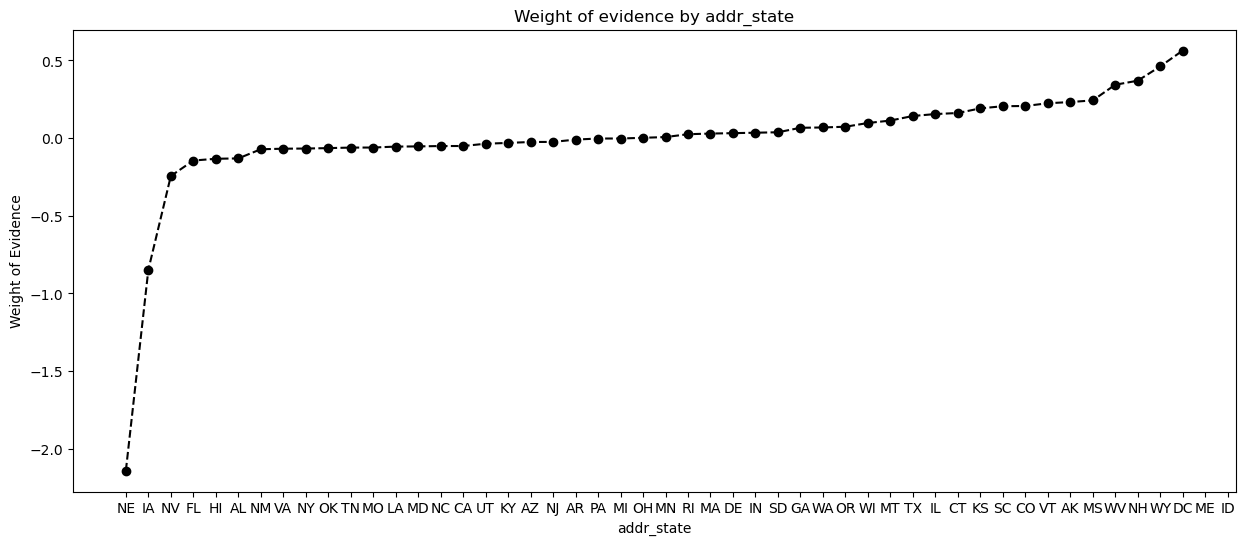

In [97]:
x = np.array(woe_table.iloc[:, 0].apply(str))
y = woe_table["woe"]
    
plt.figure(figsize = (15, 6))
    
plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    
plt.xlabel(woe_table.columns[0])
plt.ylabel('Weight of Evidence')
plt.title(str('Weight of evidence by ' + woe_table.columns[0]))
#plt.xticks(rotation = rot_x_label)

The WoE for the first two states NE and IA aere significantly negative, becasue the number of obsaervations are quite low and the proportion of bads are higher than the proportion of bads for the class. Similarly, the WoE for ME and ID is not defined since there are no defaults and the number of obsaervations are two low. These classes can therefore be binned together with the closest class. For example: NE and IA can be binned with NV and ME and ID can be binned with DC.

Text(0.5, 1.0, 'Weight of evidence by addr_state')

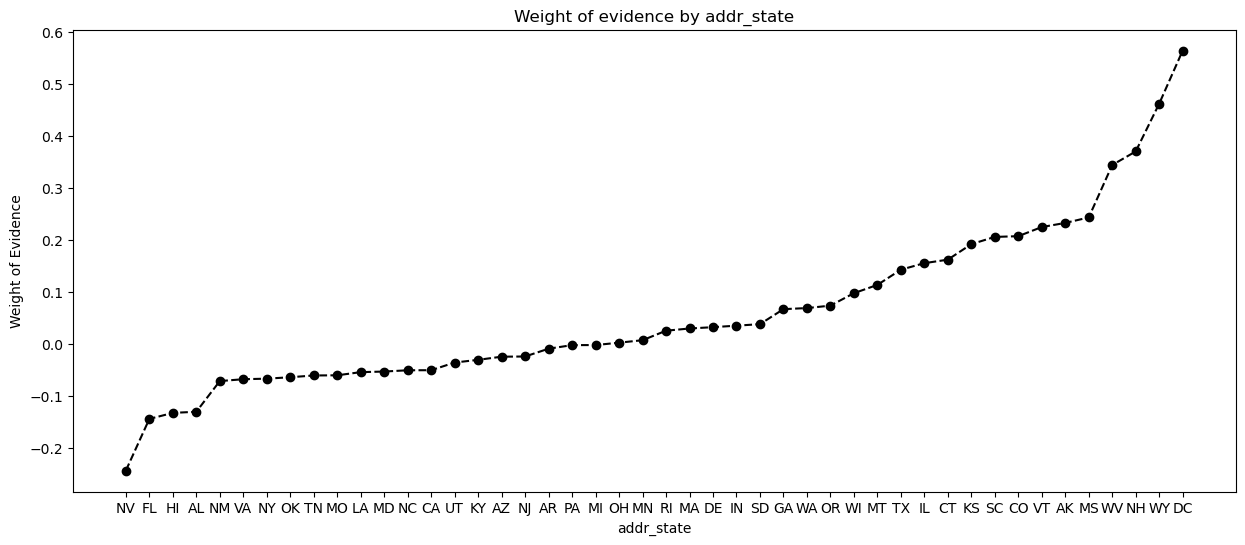

In [99]:
x = np.array(woe_table.iloc[2:-2, 0].apply(str))
y = woe_table["woe"].iloc[2:-2]
    
plt.figure(figsize = (15, 6))
    
plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    
plt.xlabel(woe_table.columns[0])
plt.ylabel('Weight of Evidence')
plt.title(str('Weight of evidence by ' + woe_table.columns[0]))
#plt.xticks(rotation = rot_x_label)

After the exclusing the classes with low number of observations, we can observe the chart above. The line is not strictly monotonic since there is a big jump in the beginning and at the end of the chart. This was masked in the previous chart. Therefore, we can bin classes together here as well wherein NV (and the previoulsy combined states of NE and IA) can be binned with FL, HI and AL. Similarly, DC (combined previously with ME and ID) canbe biined with WY, NH and WV.

Text(0.5, 1.0, 'Weight of evidence by addr_state')

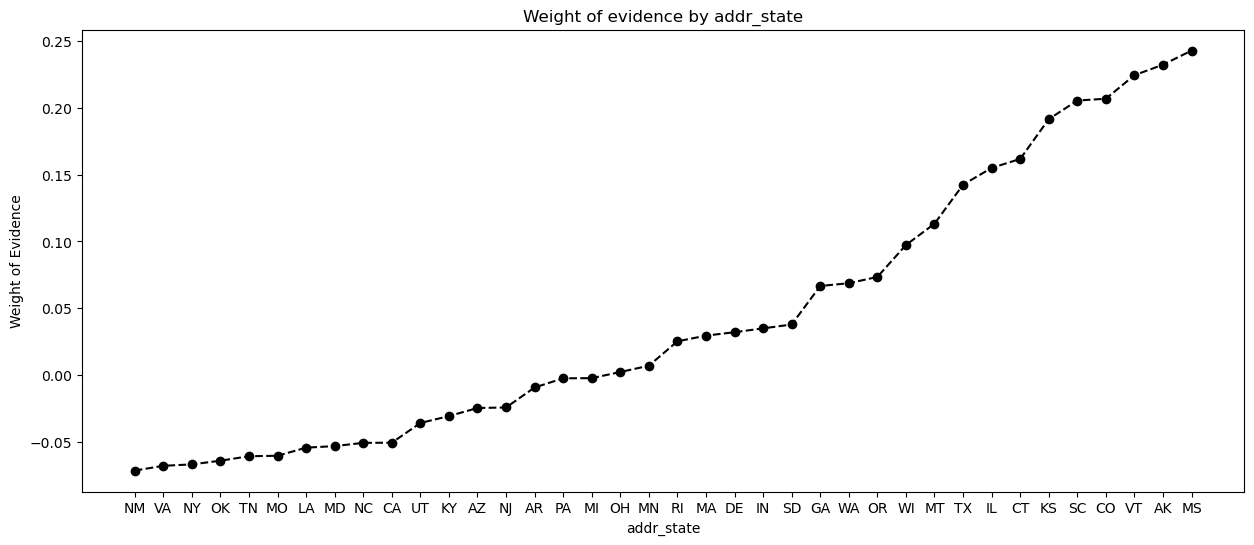

In [101]:
x = np.array(woe_table.iloc[6:-6, 0].apply(str))
y = woe_table["woe"].iloc[6:-6]
    
plt.figure(figsize = (15, 6))
    
plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    
plt.xlabel(woe_table.columns[0])
plt.ylabel('Weight of Evidence')
plt.title(str('Weight of evidence by ' + woe_table.columns[0]))
#plt.xticks(rotation = rot_x_label)

Analysing the chart further, we can bin classes again to boost the proportion of bads and increase the prediction power of classes. This cne be demonstrated through a better monotinically increasing WoE line.

Since the feature 'addr_state' is a categorical variable, we have created dummy variables from this feature through one-hot encoding. We can perform the binning by combining, the dummy variable columns for the binned classes. Note, while combinig classes the, maximum balue will not exceed 1 or be less than zero, since each data point can only belong to one state.

In [103]:
# df_dummy_cols = pd.get_dummies(df_inputs_prep['addr_state'], prefix = 'addr_state', dtype = int)

In [104]:
# #There is no data for the state of North Dakota ('ND') in the training data. Therefore, we will have to consider the possibility of this
# #in the test data. Also, since the test data considers only 20% of the original data, the number of defaults seem to be quite low for ND. 
# #Therefore, ND (if availabel) has been binned with the states NE to ND.

# if ['addr_state_ND'] in df_dummy_cols.columns.values:
#     pass

# else:
#     df_dummy_cols['addr_state_ND'] = 0
    
# df_dummy_cols['addr_state_NE_IA_NV_FL_HI_AL_ND'] = (df_dummy_cols['addr_state_NE'] + 
#                                                     df_dummy_cols['addr_state_IA'] +
#                                                     df_dummy_cols['addr_state_NV'] +
#                                                     df_dummy_cols['addr_state_FL'] +
#                                                     df_dummy_cols['addr_state_HI'] +
#                                                     df_dummy_cols['addr_state_AL'] +
#                                                     df_dummy_cols['addr_state_ND'])

# df_dummy_cols['addr_state_NM_VA'] = (df_dummy_cols['addr_state_NM'] + df_dummy_cols['addr_state_VA'])

# df_dummy_cols['addr_state_OK_TN_MO_LA_MD_NC'] = (df_dummy_cols['addr_state_OK'] +
#                                                  df_dummy_cols['addr_state_TN'] +
#                                                  df_dummy_cols['addr_state_MO'] +
#                                                  df_dummy_cols['addr_state_LA'] +
#                                                  df_dummy_cols['addr_state_MD'] +
#                                                  df_dummy_cols['addr_state_NC'])

# df_dummy_cols['addr_state_UT_KY_AZ_NJ'] = (df_dummy_cols['addr_state_UT'] +
#                                            df_dummy_cols['addr_state_KY'] +
#                                            df_dummy_cols['addr_state_AZ'] +
#                                            df_dummy_cols['addr_state_NJ'])

# df_dummy_cols['addr_state_AR_PA_MI_OH_MN'] = (df_dummy_cols['addr_state_AR'] +
#                                               df_dummy_cols['addr_state_PA'] +
#                                               df_dummy_cols['addr_state_MI'] + 
#                                               df_dummy_cols['addr_state_OH'] + 
#                                               df_dummy_cols['addr_state_MN'])

# df_dummy_cols['addr_state_RI_MA_DE_IN_SD'] = (df_dummy_cols['addr_state_RI'] +
#                                               df_dummy_cols['addr_state_MA'] +
#                                               df_dummy_cols['addr_state_DE'] +
#                                               df_dummy_cols['addr_state_IN'] +
#                                               df_dummy_cols['addr_state_SD'])

# df_dummy_cols['addr_state_GA_WA_OR'] = (df_dummy_cols['addr_state_GA'] +
#                                         df_dummy_cols['addr_state_WA'] +
#                                         df_dummy_cols['addr_state_OR'])

# df_dummy_cols['addr_state_WI_MT'] = (df_dummy_cols['addr_state_WI'] + 
#                                      df_dummy_cols['addr_state_MT'])

# df_dummy_cols['addr_state_IL_CT'] = (df_dummy_cols['addr_state_IL'] + 
#                                      df_dummy_cols['addr_state_CT'])

# df_dummy_cols['addr_state_KS_SC_CO_VT_AK_MS'] = (df_dummy_cols['addr_state_KS'] +
#                                                  df_dummy_cols['addr_state_SC'] +
#                                                  df_dummy_cols['addr_state_CO'] +
#                                                  df_dummy_cols['addr_state_VT'] +
#                                                  df_dummy_cols['addr_state_AK'] +
#                                                  df_dummy_cols['addr_state_MS'])

# df_dummy_cols['addr_state_WV_NH_WY_DC_ME_ID'] = (df_dummy_cols['addr_state_WV'] +
#                                                  df_dummy_cols['addr_state_NH'] +
#                                                  df_dummy_cols['addr_state_WY'] +
#                                                  df_dummy_cols['addr_state_DC'] +
#                                                  df_dummy_cols['addr_state_ME'] +
#                                                  df_dummy_cols['addr_state_ID'])

In [105]:
# df_dummy_cols

In [106]:
# df_inputs_prep = pd.concat([df_inputs_prep, df_dummy_cols], axis =1)

In [107]:
#We can check the result of our binning as follows:

In [108]:
# #df_addr_state = pd.DataFrame(columns = ['addr_state_new'])
# #df_addr_state = pd.DataFrame()
# df_addr_state = pd.DataFrame(df_inputs_prep['addr_state'].values.tolist(), columns = ['addr_state_new'])
# df_addr_state

In [109]:
# #df_addr = pd.concat([df_inputs_prep['addr_state'], df_targets_prep], axis =1)
# df_addr

In [110]:
# df_addr['addr_state_new'] = df_addr['addr_state']
# df_addr

In [111]:
# df_addr_state = pd.DataFrame(columns = ['addr_state_new'])
# df_addr_state['addr_state_new'] = df_inputs_prep['addr_state']
# df_addr_state

In [112]:
df_addr['addr_state_new'] = df_addr['addr_state']

df_addr = df_addr.replace({'addr_state_new': {'ND': 'ND_NE_IA_NV_FL_HI_AL',
                                          'NE': 'ND_NE_IA_NV_FL_HI_AL',
                                          'IA': 'ND_NE_IA_NV_FL_HI_AL',
                                          'NV': 'ND_NE_IA_NV_FL_HI_AL',
                                          'FL': 'ND_NE_IA_NV_FL_HI_AL',
                                          'HI': 'ND_NE_IA_NV_FL_HI_AL',
                                          'AL': 'ND_NE_IA_NV_FL_HI_AL'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'NM': 'NM_VA',
                                          'VA': 'NM_VA'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'OK': 'OK_TN_MO_LA_MD_NC',
                                          'TN': 'OK_TN_MO_LA_MD_NC',
                                          'MO': 'OK_TN_MO_LA_MD_NC',
                                          'LA': 'OK_TN_MO_LA_MD_NC',
                                          'MD': 'OK_TN_MO_LA_MD_NC',
                                          'NC': 'OK_TN_MO_LA_MD_NC'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'UT': 'UT_KY_AZ_NJ',
                                          'KY': 'UT_KY_AZ_NJ',
                                          'AZ': 'UT_KY_AZ_NJ',
                                          'NJ': 'UT_KY_AZ_NJ'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'AR': 'AR_MI_PA_OH_MN',
                                          'MI': 'AR_MI_PA_OH_MN',
                                          'PA': 'AR_MI_PA_OH_MN',
                                          'OH': 'AR_MI_PA_OH_MN',
                                          'MN': 'AR_MI_PA_OH_MN'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'RI': 'RI_MA_DE_SD_IN',
                                          'MA': 'RI_MA_DE_SD_IN',
                                          'DE': 'RI_MA_DE_SD_IN',
                                          'SD': 'RI_MA_DE_SD_IN',
                                          'IN': 'RI_MA_DE_SD_IN'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'GA': 'GA_WA_OR',
                                          'WA': 'GA_WA_OR',
                                          'OR': 'GA_WA_OR'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'WI': 'WI_MT',
                                          'MT': 'WI_MT'
                                          }})

df_addr = df_addr.replace({'addr_state_new': {'IL': 'IL_CT',
                                          'CT': 'IL_CT'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'KS': 'KS_SC_CO_VT_AK_MS',
                                          'SC': 'KS_SC_CO_VT_AK_MS',
                                          'CO': 'KS_SC_CO_VT_AK_MS',
                                          'VT': 'KS_SC_CO_VT_AK_MS',
                                          'AK': 'KS_SC_CO_VT_AK_MS',
                                          'MS': 'KS_SC_CO_VT_AK_MS'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'WV': 'WV_NH_WY_DC_ME_ID',
                                          'NH': 'WV_NH_WY_DC_ME_ID',
                                          'WY': 'WV_NH_WY_DC_ME_ID',
                                          'DC': 'WV_NH_WY_DC_ME_ID',
                                          'ME': 'WV_NH_WY_DC_ME_ID',
                                          'ID': 'WV_NH_WY_DC_ME_ID'
                                         }})

In [113]:
df_addr['addr_state_new'].unique()

array(['KS_SC_CO_VT_AK_MS', 'UT_KY_AZ_NJ', 'GA_WA_OR', 'RI_MA_DE_SD_IN',
       'CA', 'IL_CT', 'OK_TN_MO_LA_MD_NC', 'NY', 'TX',
       'ND_NE_IA_NV_FL_HI_AL', 'NM_VA', 'WI_MT', 'AR_MI_PA_OH_MN',
       'WV_NH_WY_DC_ME_ID'], dtype=object)

In [114]:
woe_table = df_addr.groupby(df_addr.columns.values[2], as_index = False).agg(n_obs = (df_addr.columns.values[1], 'count'),
                                                                             n_bad =  (df_addr.columns.values[1], 'sum'))

woe_table['n_good'] = woe_table['n_obs'] - woe_table['n_bad']

woe_table['prop_bad'] = round(woe_table['n_bad'] / woe_table['n_bad'].sum(), 5)
woe_table['prop_good'] = round(woe_table['n_good'] / woe_table['n_good'].sum(), 5)

woe_table['woe'] = round(np.log(woe_table['prop_good']) - np.log(woe_table['prop_bad']), 5)

woe_table['IV_class'] = round(woe_table['woe']*(woe_table['prop_good'] - woe_table['prop_bad']), 5)
woe_table['IV_feature'] = round(woe_table['IV_class'].sum(), 5)

woe_table = woe_table.sort_values(['woe']).reset_index(drop = True)
woe_table

addr_state_new  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0   ND_NE_IA_NV_FL_HI_AL  37130   4667   32463   0.11445    0.09771 -0.15813   
1                  NM_VA  13441   1562   11879    0.0383    0.03575  -0.0689   
2                     NY  32211   3737   28474   0.09164     0.0857 -0.06702   
3      OK_TN_MO_LA_MD_NC  37480   4305   33175   0.10557    0.09985 -0.05571   
4                     CA  57199   6541   50658   0.16041    0.15247 -0.05077   
5            UT_KY_AZ_NJ  29373   3287   26086   0.08061    0.07851  -0.0264   
6         AR_MI_PA_OH_MN  43702   4778   38924   0.11717    0.11715 -0.00017   
7         RI_MA_DE_SD_IN  17580   1869   15711   0.04583    0.04729  0.03136   
8               GA_WA_OR  25146   2586   22560   0.06342     0.0679  0.06826   
9                  WI_MT   5843    584    5259   0.01432    0.01583  0.10025   
10                    TX  29158   2805   26353   0.06879    0.07932  0.14243   
11                 IL_CT  20608   1957   18651   0.04799    0.05614  0.15686   
12     KS_SC_CO_VT_AK_MS  18341   1663   16678   0.04078     0.0502  0.20782   
13     WV_NH_WY_DC_ME_ID   5816    437    5379   0.01072    0.01619  0.41228   

    IV_class  IV_feature  
0    0.00265     0.01152  
1    0.00018     0.01152  
2     0.0004     0.01152  
3    0.00032     0.01152  
4     0.0004     0.01152  
5      6e-05     0.01152  
6        0.0     0.01152  
7      5e-05     0.01152  
8    0.00031     0.01152  
9    0.00015     0.01152  
10    0.0015     0.01152  
11   0.00128     0.01152  
12   0.00196     0.01152  
13   0.00226     0.01152

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'ND_NE_IA_NV_FL_HI_AL'),
  Text(1, 0, 'NM_VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OK_TN_MO_LA_MD_NC'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'UT_KY_AZ_NJ'),
  Text(6, 0, 'AR_MI_PA_OH_MN'),
  Text(7, 0, 'RI_MA_DE_SD_IN'),
  Text(8, 0, 'GA_WA_OR'),
  Text(9, 0, 'WI_MT'),
  Text(10, 0, 'TX'),
  Text(11, 0, 'IL_CT'),
  Text(12, 0, 'KS_SC_CO_VT_AK_MS'),
  Text(13, 0, 'WV_NH_WY_DC_ME_ID')])

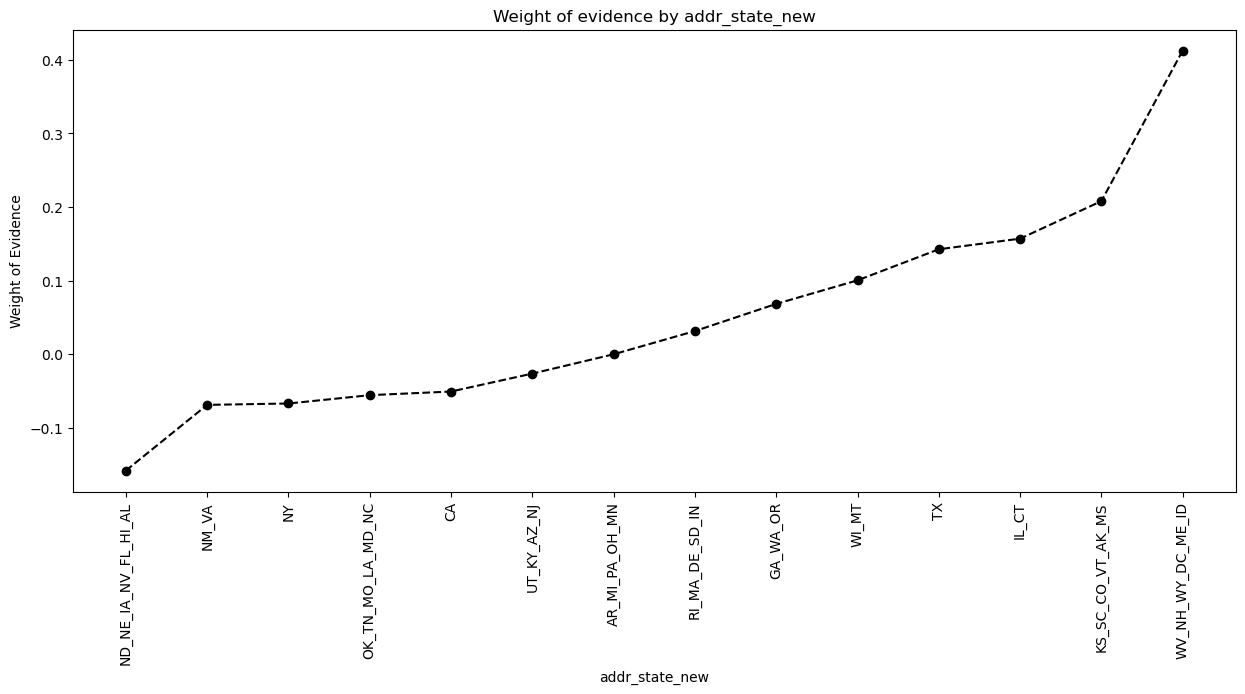

In [115]:
x = np.array(woe_table.iloc[ : , 0].apply(str))
y = woe_table["woe"].iloc[ : ]
    
plt.figure(figsize = (15, 6))
    
plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    
plt.xlabel(woe_table.columns[0])
plt.ylabel('Weight of Evidence')
plt.title(str('Weight of evidence by ' + woe_table.columns[0]))
plt.xticks(rotation = 90)

We can calculate overall information value of an independent variable and then if the value is between .30 and .50 we can consider the variable as a strong predictor. Any variable having IV lesser than .02 can be excluded in our binary logistic regression model. Below table is showing the relation between IV and Predictive power of a variable.

![IV_Table](https://miro.medium.com/v2/resize:fit:640/format:webp/1*prl00Y2OtCtdYj6LmTz2eQ.png)

Sources:
1. [Weight of Evidence (WoE) and Information Value (IV) — how to use it in EDA and Model Building?](https://anikch.medium.com/weight-of-evidence-woe-and-information-value-iv-how-to-use-it-in-eda-and-model-building-3b3b98efe0e8)
2. [Weight of Evidence and Information Value](https://www.kaggle.com/code/lusfernandotorres/weight-of-evidence-and-information-value)
3. [365 Data Science Course: Credit Risk Modelling in Python](https://365datascience.com)

While we have improved the information value, the IV of the feature and individual classes is <0.01. This would indicate that the feature does not have a very high predictive power. However, we will not exclude as of yet anbd will analyse this feature further while building the model. 

In [118]:
#Add the new class to the original table
df_inputs_prep = pd.concat([df_inputs_prep, df_addr['addr_state_new']], axis =1)

In [119]:
df_inputs_prep.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_del

__**Functions**__ <br>We can create functions for the IV table and WoE chart to analyse each of the variables as follows:

In [121]:
def woe_discrete(df_feature, feature_name, df_good_bad):

    ''' This function generates the table calculating the weight of evidence ('WoE') for
        each discrete feature being analysed. '''
    
    df_feature = pd.concat([df_feature[feature_name], df_good_bad], axis =1)

    woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),
                                                                                       n_bad =  (df_feature.columns.values[1], 'sum'))
    woe_table['n_good'] = woe_table['n_obs'] - woe_table['n_bad']
    woe_table['prop_bad'] = round(woe_table['n_bad'] / woe_table['n_bad'].sum(), 5)
    woe_table['prop_good'] = round(woe_table['n_good'] / woe_table['n_good'].sum(), 5)

    woe_table['woe'] = round(np.log(woe_table['prop_good']) - np.log(woe_table['prop_bad']), 5)

    woe_table['IV_class'] = round(woe_table['woe']*(woe_table['prop_good'] - woe_table['prop_bad']), 5)
    woe_table['IV_feature'] = round(woe_table['IV_class'].sum(), 5)

    woe_table = woe_table.sort_values(['woe']).reset_index(drop = True)
    
    return(woe_table)

In [122]:
def plot_by_woe(woe_table, rot_x_label = 0):
    
    x = np.array(woe_table.iloc[:, 0].apply(str))
    y = woe_table["woe"]
    
    plt.figure(figsize = (15, 6))
    
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    
    plt.xlabel(woe_table.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of evidence by ' + woe_table.columns[0]))
    plt.xticks(rotation = rot_x_label)

#### __2.2.2 Feature: Grade__

In [124]:
df_inputs_prep['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

grade   n_obs  n_bad  n_good  prop_bad  prop_good      woe  IV_class  \
0     G    2654    722    1932   0.01771    0.00581 -1.11455   0.01326   
1     F   10530   2586    7944   0.06342    0.02391 -0.97548   0.03854   
2     E   28612   5572   23040   0.13664    0.06935 -0.67818   0.04563   
3     D   61498   9452   52046   0.23179    0.15665 -0.39182   0.02944   
4     C  100245  11451   88794   0.28081    0.26725 -0.04949   0.00067   
5     B  109730   8667  101063   0.21254    0.30418  0.35849   0.03285   
6     A   59759   2328   57431   0.05709    0.17285   1.1078   0.12824   

   IV_feature  
0     0.28863  
1     0.28863  
2     0.28863  
3     0.28863  
4     0.28863  
5     0.28863  
6     0.28863

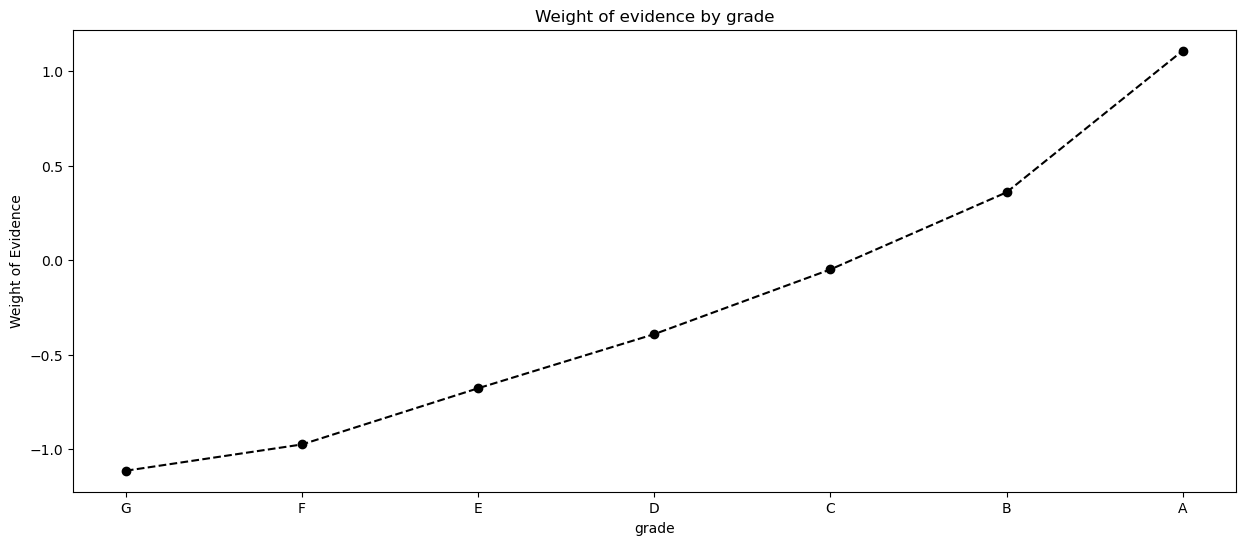

In [125]:
woe_feature = woe_discrete(df_inputs_prep, 'grade', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 0)

#### __2.2.3 Feature: Sub Grade__

sub_grade  n_obs  n_bad  n_good  prop_bad  prop_good      woe  IV_class  \
0         F5   1211    353     858   0.00866    0.00258 -1.21093   0.00736   
1         G1    875    249     626   0.00611    0.00188 -1.17865   0.00499   
2         G3    458    129     329   0.00316    0.00099 -1.16062   0.00252   
3         G5    294     82     212   0.00201    0.00064 -1.14442   0.00157   
4         F4   1624    423    1201   0.01037    0.00361 -1.05521   0.00713   
5         G4    351     91     260   0.00223    0.00078 -1.05046   0.00152   
6         F3   2140    544    1596   0.01334     0.0048 -1.02215   0.00873   
7         G2    676    171     505   0.00419    0.00152 -1.01399   0.00271   
8         F2   2381    574    1807   0.01408    0.00544 -0.95098   0.00822   
9         E5   4082    893    3189    0.0219     0.0096 -0.82472   0.01014   
10        F1   3174    692    2482   0.01697    0.00747 -0.82055    0.0078   
11        E4   4789    995    3794    0.0244    0.01142 -0.75922   0.00985   
12        E2   6950   1347    5603   0.03303    0.01686 -0.67247   0.01087   
13        E3   5598   1059    4539   0.02597    0.01366 -0.64247   0.00791   
14        E1   7193   1278    5915   0.03134     0.0178  -0.5657   0.00766   
15        D5   9291   1584    7707   0.03884     0.0232  -0.5153   0.00806   
16        D4  11303   1847    9456   0.04529    0.02846 -0.46459   0.00782   
17        D3  11911   1791   10120   0.04392    0.03046 -0.36596   0.00493   
18        D2  13665   2041   11624   0.05005    0.03499 -0.35796   0.00539   
19        D1  15328   2189   13139   0.05368    0.03955 -0.30547   0.00432   
20        C5  17702   2301   15401   0.05643    0.04635 -0.19678   0.00198   
21        C4  19265   2301   16964   0.05643    0.05106     -0.1   0.00054   
22        C3  20266   2325   17941   0.05702      0.054 -0.05442   0.00016   
23        C2  21355   2277   19078   0.05584    0.05742   0.0279     4e-05   
24        C1  21657   2247   19410    0.0551    0.05842  0.05851   0.00019   
25        B5  20214   1920   18294   0.04708    0.05506  0.15658   0.00125   
26        B4  24488   2139   22349   0.05245    0.06727  0.24885   0.00369   
27        B3  25387   2013   23374   0.04936    0.07035  0.35434   0.00744   
28        B2  21306   1493   19813   0.03661    0.05963  0.48784   0.01123   
29        B1  18335   1102   17233   0.02702    0.05187  0.65216   0.01621   
30        A5  17369    881   16488    0.0216    0.04963   0.8319   0.02332   
31        A4  15225    684   14541   0.01677    0.04377  0.95936    0.0259   
32        A3   9955    349    9606   0.00856    0.02891  1.21709   0.02477   
33        A2   8761    253    8508    0.0062    0.02561  1.41843   0.02753   
34        A1   8449    161    8288   0.00395    0.02495  1.84316   0.03871   

    IV_feature  
0      0.31246  
1      0.31246  
2      0.31246  
3      0.31246  
4      0.31246  
5      0.31246  
6      0.31246  
7      0.31246  
8      0.31246  
9      0.31246  
10     0.31246  
11     0.31246  
12     0.31246  
13     0.31246  
14     0.31246  
15     0.31246  
16     0.31246  
17     0.31246  
18     0.31246  
19     0.31246  
20     0.31246  
21     0.31246  
22     0.31246  
23     0.31246  
24     0.31246  
25     0.31246  
26     0.31246  
27     0.31246  
28     0.31246  
29     0.31246  
30     0.31246  
31     0.31246  
32     0.31246  
33     0.31246  
34     0.31246

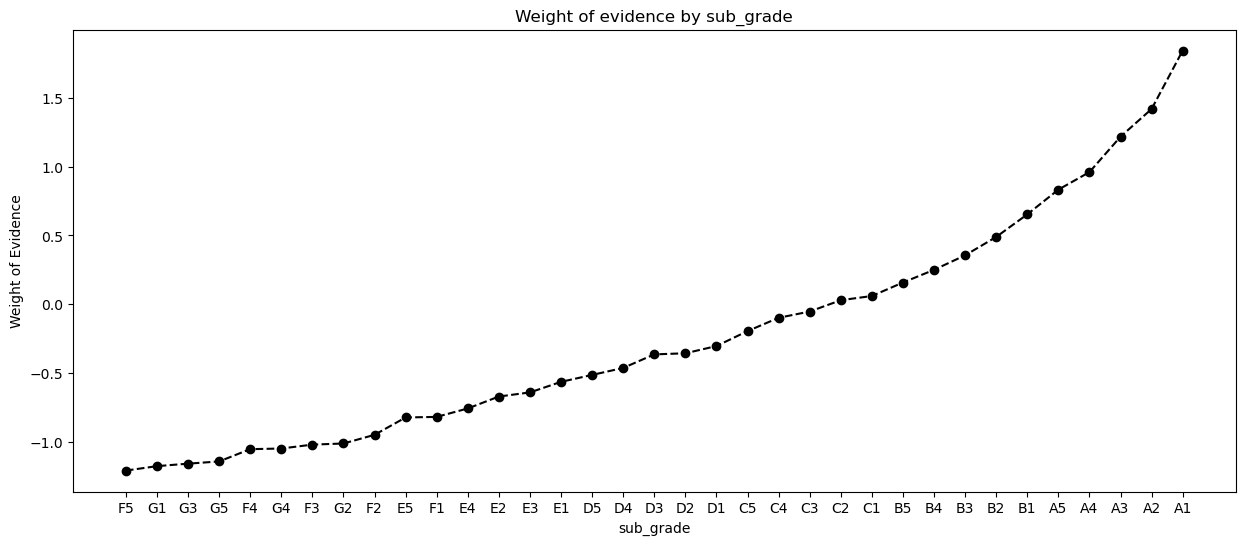

In [127]:
woe_feature = woe_discrete(df_inputs_prep, 'sub_grade', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 0)

#### __2.2.3 Feature: Home Ownership__

In [129]:
print(df_inputs_prep['home_ownership'].unique())

['MORTGAGE' 'RENT' 'OWN' 'NONE' 'OTHER' 'ANY']


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


home_ownership   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0          OTHER     137     28     109   0.00069    0.00033  -0.7376   
1           NONE      40      6      34   0.00015     0.0001 -0.40547   
2           RENT  150599  18995  131604   0.46581     0.3961 -0.16211   
3            OWN   33295   3578   29717   0.08774    0.08944  0.01919   
4       MORTGAGE  188956  18171  170785   0.44561    0.51403  0.14284   
5            ANY       1      0       1       0.0        0.0      NaN   

   IV_class  IV_feature  
0   0.00027     0.02139  
1     2e-05     0.02139  
2    0.0113     0.02139  
3     3e-05     0.02139  
4   0.00977     0.02139  
5       NaN     0.02139

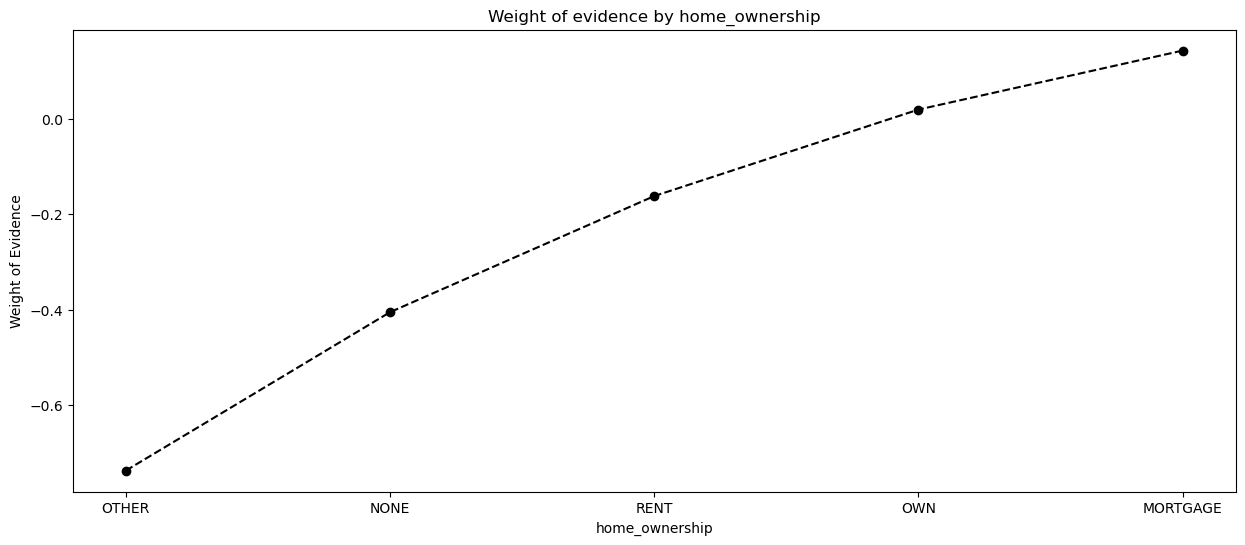

In [130]:
woe_feature = woe_discrete(df_inputs_prep, 'home_ownership', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 0)

In [131]:
df_home_ownership = pd.concat([df_inputs_prep['home_ownership'], df_targets_prep], axis =1)
df_home_ownership['home_ownership_new'] = df_home_ownership['home_ownership']

df_home_ownership = df_home_ownership.replace({'home_ownership_new': {'OTHER': 'OTHER_NONE_RENT_ANY',
                                                                      'NONE': 'OTHER_NONE_RENT_ANY',
                                                                      'RENT': 'OTHER_NONE_RENT_ANY',
                                                                      'ANY': 'OTHER_NONE_RENT_ANY'
                                                                     }})

print(df_home_ownership['home_ownership'].unique())
print('\nAfter binning')
print(df_home_ownership['home_ownership_new'].unique())                                               

['MORTGAGE' 'RENT' 'OWN' 'NONE' 'OTHER' 'ANY']

After binning
['MORTGAGE' 'OTHER_NONE_RENT_ANY' 'OWN']


In [132]:
df_inputs_prep = pd.concat([df_inputs_prep, df_home_ownership['home_ownership_new']], axis =1)

home_ownership_new   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0  OTHER_NONE_RENT_ANY  150777  19029  131748   0.46665    0.39653 -0.16283   
1                  OWN   33295   3578   29717   0.08774    0.08944  0.01919   
2             MORTGAGE  188956  18171  170785   0.44561    0.51403  0.14284   

   IV_class  IV_feature  
0   0.01142     0.02122  
1     3e-05     0.02122  
2   0.00977     0.02122

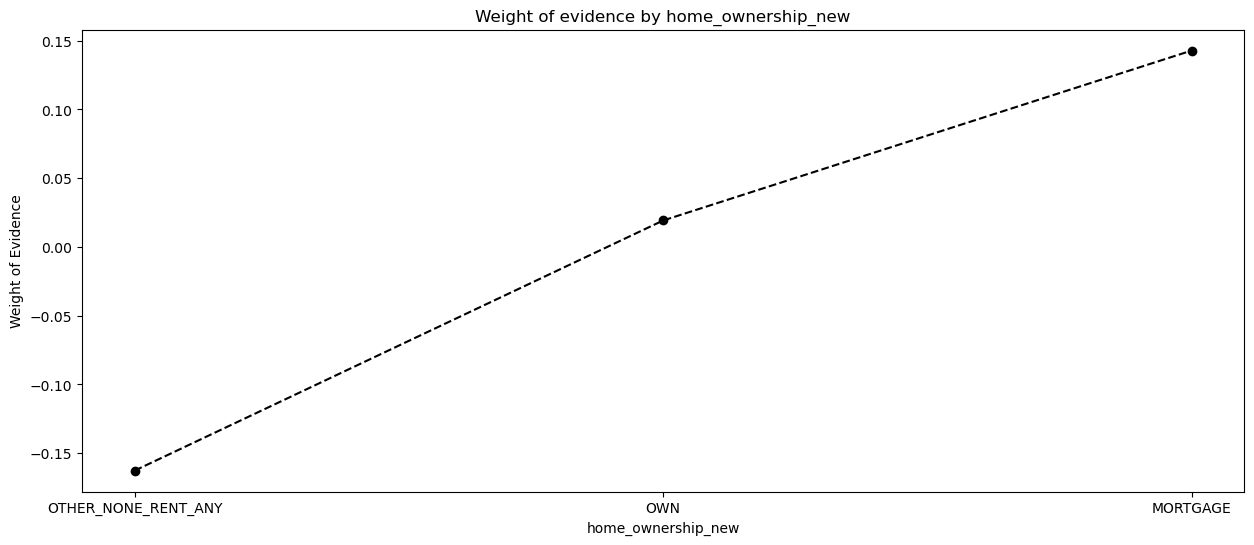

In [133]:
woe_feature = woe_discrete(df_inputs_prep, 'home_ownership_new', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 0)

In [134]:
# df_dummy_cols = pd.get_dummies(df_inputs_prep['home_ownership'], prefix = 'home_ownership', dtype = int)

In [135]:
# df_dummy_cols['home_ownership_OTHER_NONE_RENT_ANY'] = (df_dummy_cols['home_ownership_OTHER'] + 
#                                                        df_dummy_cols['home_ownership_NONE']  +
#                                                        df_dummy_cols['home_ownership_RENT']  +  
#                                                        df_dummy_cols['home_ownership_ANY'])

# # df_dummy_cols = df_dummy_cols.drop(['home_ownership_OTHER', 
# #                                     'home_ownership_NONE', 
# #                                     'home_ownership_RENT',
# #                                     'home_ownership_ANY'], axis=1)

# # df_inputs_prep = df_inputs_prep.drop('home_ownership', axis=1)

# df_inputs_prep = pd.concat([df_inputs_prep, df_dummy_cols], axis =1)

#### __2.2.4 Feature: Verification Status__

verification_status   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0            Verified  134414  17100  117314   0.41934    0.35309 -0.17196   
1     Source Verified  120030  12493  107537   0.30637    0.32366   0.0549   
2        Not Verified  118584  11185  107399   0.27429    0.32325  0.16424   

   IV_class  IV_feature  
0   0.01139     0.02038  
1   0.00095     0.02038  
2   0.00804     0.02038

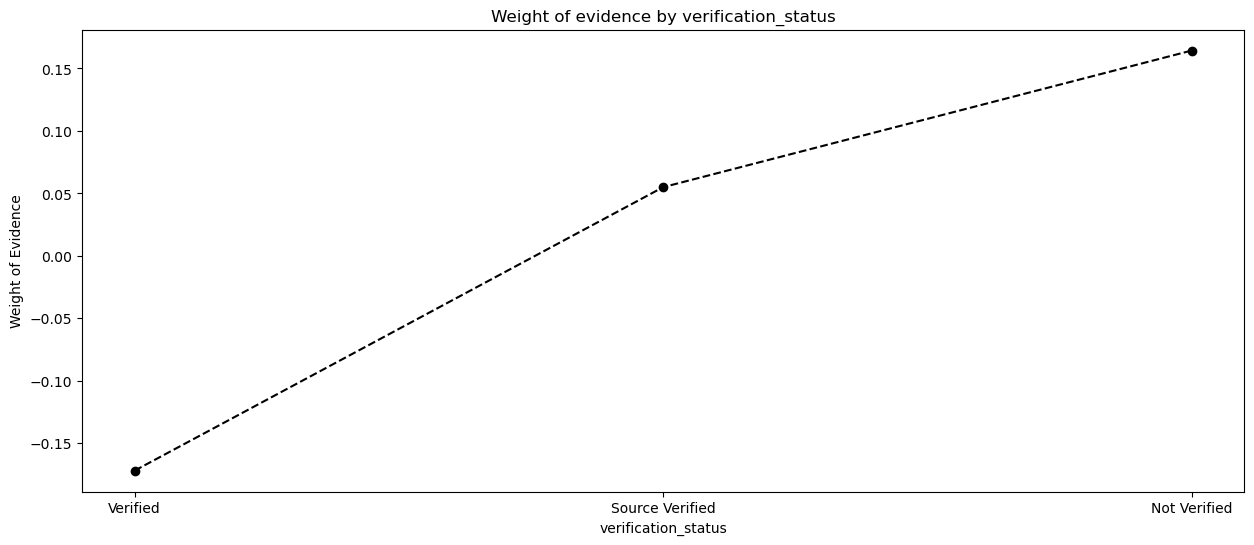

In [137]:
woe_feature = woe_discrete(df_inputs_prep, 'verification_status', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 0)

#### __2.2.5 Feature: Purpose__

purpose   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0       small_business    5582   1194    4388   0.02928    0.01321 -0.79593   
1          educational     333     66     267   0.00162     0.0008 -0.70557   
2               moving    2392    384    2008   0.00942    0.00604 -0.44443   
3                house    1830    256    1574   0.00628    0.00474 -0.28133   
4                other   18884   2601   16283   0.06378    0.04901 -0.26342   
5     renewable_energy     281     38     243   0.00093    0.00073 -0.24214   
6              medical    3684    485    3199   0.01189    0.00963 -0.21081   
7              wedding    1887    223    1664   0.00547    0.00501 -0.08784   
8             vacation    1991    234    1757   0.00574    0.00529 -0.08164   
9   debt_consolidation  219183  24793  194390     0.608    0.58507 -0.03844   
10    home_improvement   21238   2109   19129   0.05172    0.05757  0.10716   
11      major_purchase    7837    741    7096   0.01817    0.02136  0.16175   
12                 car    4325    391    3934   0.00959    0.01184  0.21076   
13         credit_card   83581   7263   76318   0.17811     0.2297  0.25437   

    IV_class  IV_feature  
0    0.01279     0.03542  
1    0.00058     0.03542  
2     0.0015     0.03542  
3    0.00043     0.03542  
4    0.00389     0.03542  
5      5e-05     0.03542  
6    0.00048     0.03542  
7      4e-05     0.03542  
8      4e-05     0.03542  
9    0.00088     0.03542  
10   0.00063     0.03542  
11   0.00052     0.03542  
12   0.00047     0.03542  
13   0.01312     0.03542

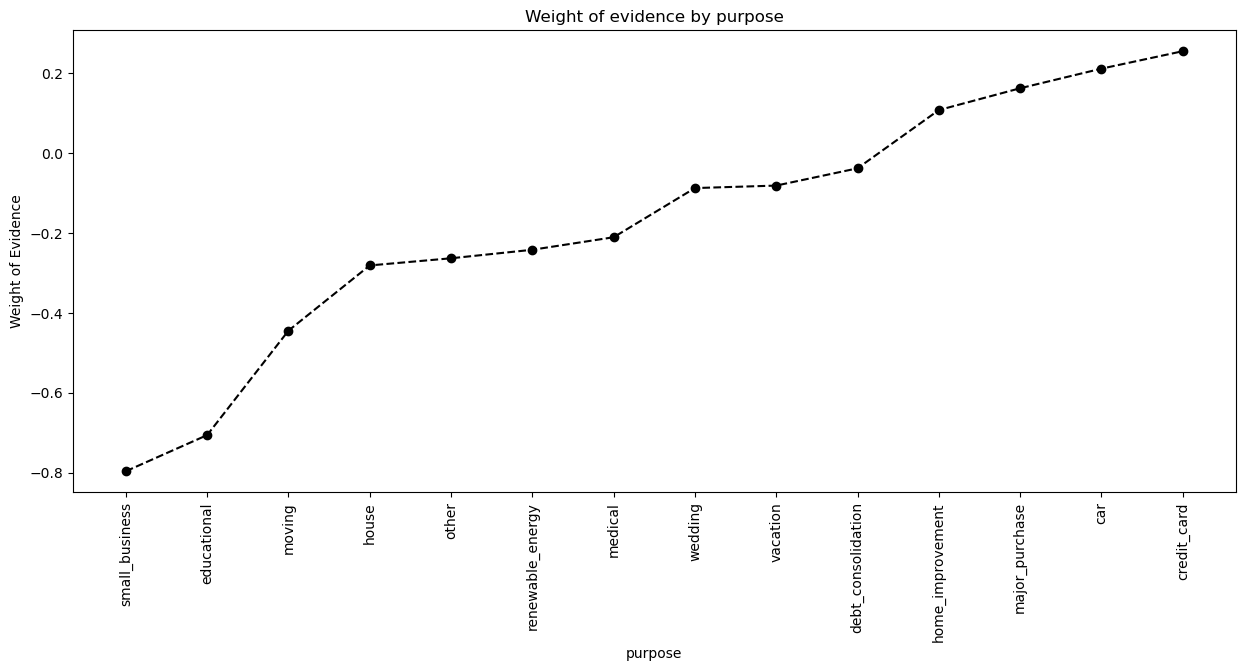

In [139]:
woe_feature = woe_discrete(df_inputs_prep, 'purpose', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

In [140]:
# df_dummy_cols = pd.get_dummies(df_inputs_prep['purpose'], prefix = 'purpose', dtype = int)
# df_dummy_cols.columns.values

In [141]:
# # df_dummy_cols['purpose_sme_edu_mov_hse_oth'] = (df_dummy_cols['purpose_small_business'] + 
# #                                                 df_dummy_cols['purpose_educational'] +
# #                                                 df_dummy_cols['purpose_moving'] +
# #                                                 df_dummy_cols['purpose_house'] +
# #                                                 df_dummy_cols['purpose_other'])

# df_dummy_cols['purpose_sme_edu_mov_hse_oth'] = (df_dummy_cols['purpose_small_business'] + 
#                                             df_dummy_cols['purpose_educational'] +
#                                             df_dummy_cols['purpose_moving'] +
#                                             df_dummy_cols['purpose_house'] + 
#                                             df_dummy_cols['purpose_other'])

# df_dummy_cols['purpose_ren_med_wed_vac'] = (df_dummy_cols['purpose_renewable_energy'] + 
#                                             df_dummy_cols['purpose_medical'] + 
#                                             df_dummy_cols['purpose_wedding'] + 
#                                             df_dummy_cols['purpose_vacation'])

# df_dummy_cols['purpose_hmimprov_maj_car'] = (df_dummy_cols['purpose_home_improvement'] + 
#                                              df_dummy_cols['purpose_major_purchase'] + 
#                                              df_dummy_cols['purpose_car'])

# df_inputs_prep = pd.concat([df_inputs_prep, df_dummy_cols], axis =1)

In [142]:
df_purpose = pd.concat([df_inputs_prep['purpose'], df_targets_prep], axis =1)
df_purpose['purpose_new'] = df_purpose['purpose']

df_purpose = df_purpose.replace({'purpose_new': {'small_business': 'sme_edu_mov_hse_oth',
                                                 'educational': 'sme_edu_mov_hse_oth',
                                                 'moving': 'sme_edu_mov_hse_oth',
                                                 'house': 'sme_edu_mov_hse_oth',
                                                 'other': 'sme_edu_mov_hse_oth',
                                                 'renewable_energy': 'ren_med_wed_vac',
                                                 'medical': 'ren_med_wed_vac',
                                                 'wedding': 'ren_med_wed_vac',
                                                 'vacation': 'ren_med_wed_vac',
                                                 'home_improvement': 'improv_maj_car',
                                                 'major_purchase': 'improv_maj_car',
                                                 'car': 'improv_maj_car'
                                                }})

print(df_purpose['purpose'].unique())
print('\nAfter binning')
print(df_purpose['purpose_new'].unique())  

['debt_consolidation' 'educational' 'other' 'home_improvement'
 'credit_card' 'major_purchase' 'wedding' 'small_business' 'vacation'
 'house' 'car' 'moving' 'renewable_energy' 'medical']

After binning
['debt_consolidation' 'sme_edu_mov_hse_oth' 'improv_maj_car' 'credit_card'
 'ren_med_wed_vac']


In [143]:
df_inputs_prep = pd.concat([df_inputs_prep, df_purpose['purpose_new']], axis =1)

purpose_new   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0  sme_edu_mov_hse_oth   29021   4501   24520   0.11038     0.0738 -0.40257   
1      ren_med_wed_vac    7843    980    6863   0.02403    0.02066  -0.1511   
2   debt_consolidation  219183  24793  194390     0.608    0.58507 -0.03844   
3       improv_maj_car   33400   3241   30159   0.07948    0.09077  0.13282   
4          credit_card   83581   7263   76318   0.17811     0.2297  0.25437   

   IV_class  IV_feature  
0   0.01473     0.03074  
1   0.00051     0.03074  
2   0.00088     0.03074  
3    0.0015     0.03074  
4   0.01312     0.03074

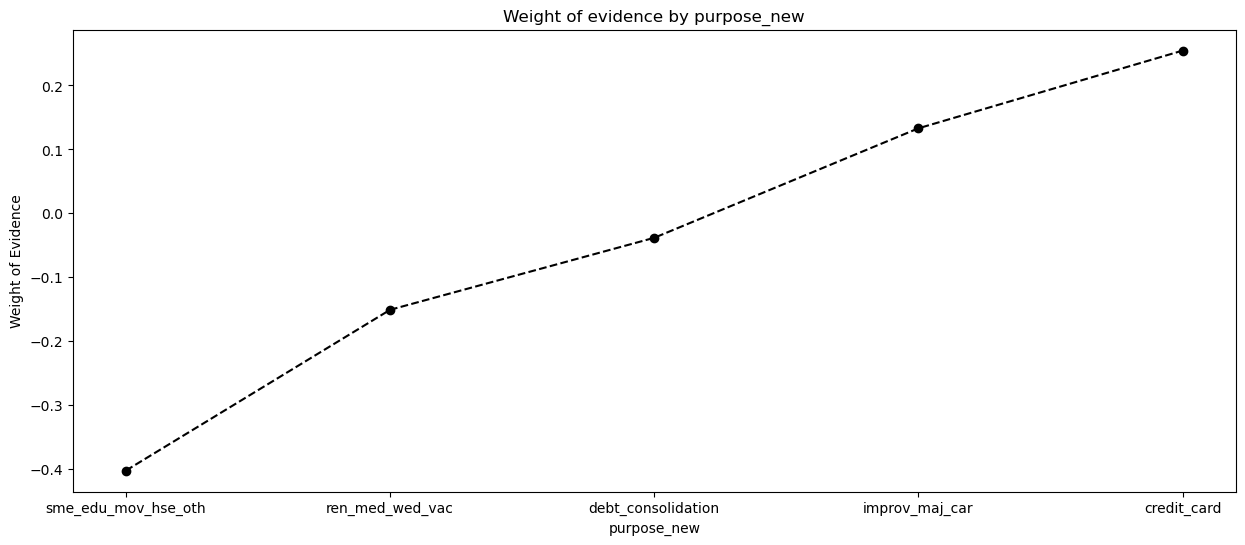

In [144]:
woe_feature = woe_discrete(df_inputs_prep, 'purpose_new', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 0)

#### __2.2.6 Feature: Initial List Status__

initial_list_status   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0                   f  242514  29176  213338   0.71548     0.6421 -0.10821   
1                   w  130514  11602  118912   0.28452     0.3579  0.22945   

   IV_class  IV_feature  
0   0.00794     0.02478  
1   0.01684     0.02478

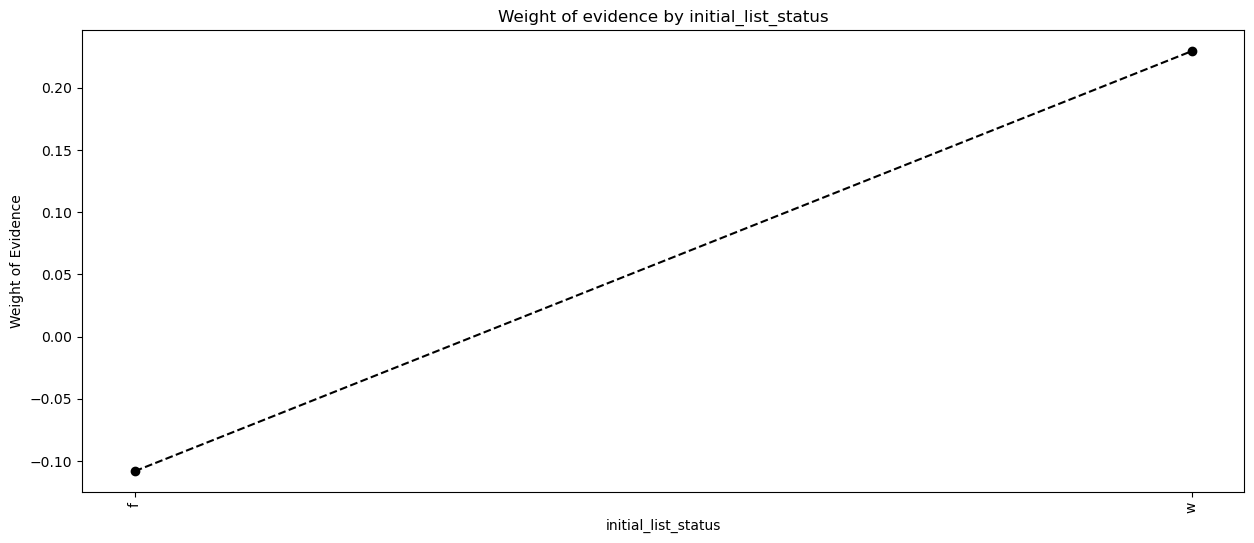

In [146]:
woe_feature = woe_discrete(df_inputs_prep, 'initial_list_status', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

### __2.3 Continuous Variables__

In [148]:
def woe_continuous(df_feature, feature_name, df_good_bad):

    ''' This function generates the table calculating the weight of evidence ('WoE') for
        each continuous feature being analysed. '''
    
    df_feature = pd.concat([df_feature[feature_name], df_good_bad], axis =1)
    
    woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),
                                                                                       n_bad =  (df_feature.columns.values[1], 'sum'))
    woe_table['n_good'] = woe_table['n_obs'] - woe_table['n_bad']
    woe_table['prop_bad'] = round(woe_table['n_bad'] / woe_table['n_bad'].sum(), 5)
    woe_table['prop_good'] = round(woe_table['n_good'] / woe_table['n_good'].sum(), 5)

    woe_table['woe'] = round(np.log(woe_table['prop_good']) - np.log(woe_table['prop_bad']), 5)

    woe_table['IV_class'] = round(woe_table['woe']*(woe_table['prop_good'] - woe_table['prop_bad']), 5)
    woe_table['IV_feature'] = round(woe_table['IV_class'].sum(), 5)

    #woe_table = woe_table.sort_values(['woe']).reset_index(drop = True)
    
    return(woe_table)

#### __2.3.1 Feature: Term__

The original feature 'term' was converted into an integer feature variable called term_int.

term_int   n_obs  n_bad  n_good  prop_bad  prop_good     woe  IV_class  \
0        36  270419  26232  244187   0.64329    0.73495 0.13321   0.01221   
1        60  102609  14546   88063   0.35671    0.26505  -0.297   0.02722   

   IV_feature  
0     0.03943  
1     0.03943

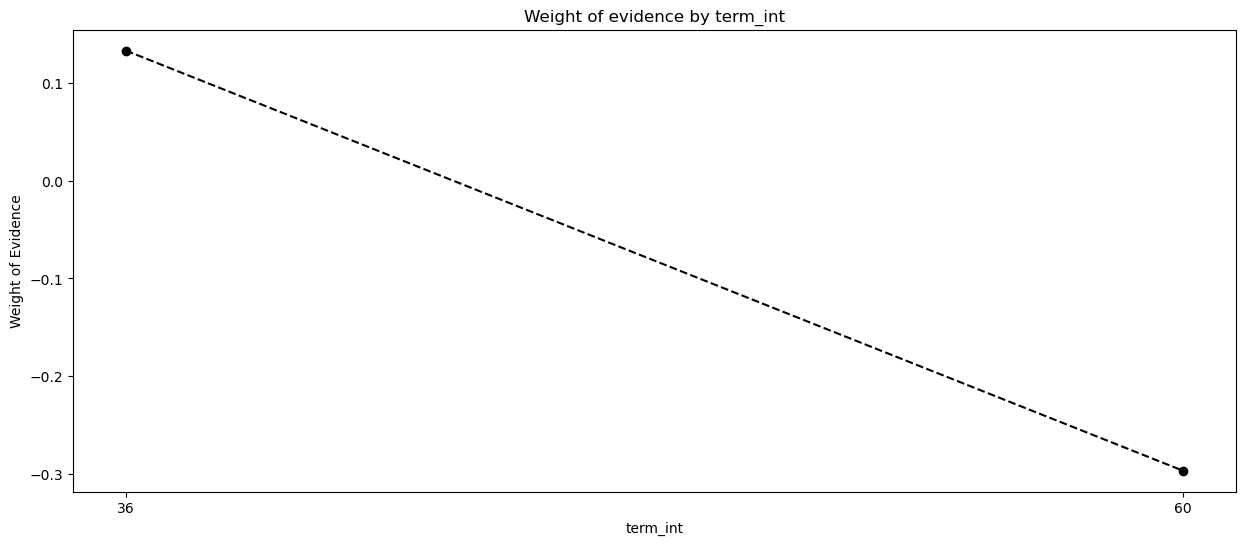

In [151]:
woe_feature = woe_continuous(df_inputs_prep, 'term_int', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 0)

In [152]:
df_term = pd.DataFrame(columns = ['term_int'])
df_term['term_int'] = df_inputs_prep['term_int']

conditions = [
              (df_term['term_int'] == 36),
              (df_term['term_int'] == 60)
             ]

# create a list of the values we want to assign for each condition
values = ['term_36', 'term_60']

# create a new column and use np.select to assign values to it using our lists as arguments
df_term['term_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_term['term_class'].unique()) 

After binning
['term_36' 'term_60']


In [153]:
df_inputs_prep = pd.concat([df_inputs_prep, df_term['term_class']], axis =1)

#### __2.3.2 Feature: Employment Length__

The original feature 'emp_length' was converted into an integer feature variable called 'emp_length_int'.

emp_length_int   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0                0   45720   5651   40069   0.13858     0.1206 -0.13897   
1                1   23654   2673   20981   0.06555    0.06315  -0.0373   
2                2   33078   3607   29471   0.08845     0.0887  0.00282   
3                3   29205   3190   26015   0.07823     0.0783  0.00089   
4                4   22468   2457   20011   0.06025    0.06023 -0.00033   
5                5   24602   2836   21766   0.06955    0.06551 -0.05984   
6                6   20887   2425   18462   0.05947    0.05557 -0.06783   
7                7   21049   2369   18680    0.0581    0.05622 -0.03289   
8                8   17853   1966   15887   0.04821    0.04782 -0.00812   
9                9   14267   1617   12650   0.03965    0.03807 -0.04066   
10              10  120245  11987  108258   0.29396    0.32583  0.10293   

    IV_class  IV_feature  
0     0.0025     0.00649  
1      9e-05     0.00649  
2        0.0     0.00649  
3        0.0     0.00649  
4        0.0     0.00649  
5    0.00024     0.00649  
6    0.00026     0.00649  
7      6e-05     0.00649  
8        0.0     0.00649  
9      6e-05     0.00649  
10   0.00328     0.00649

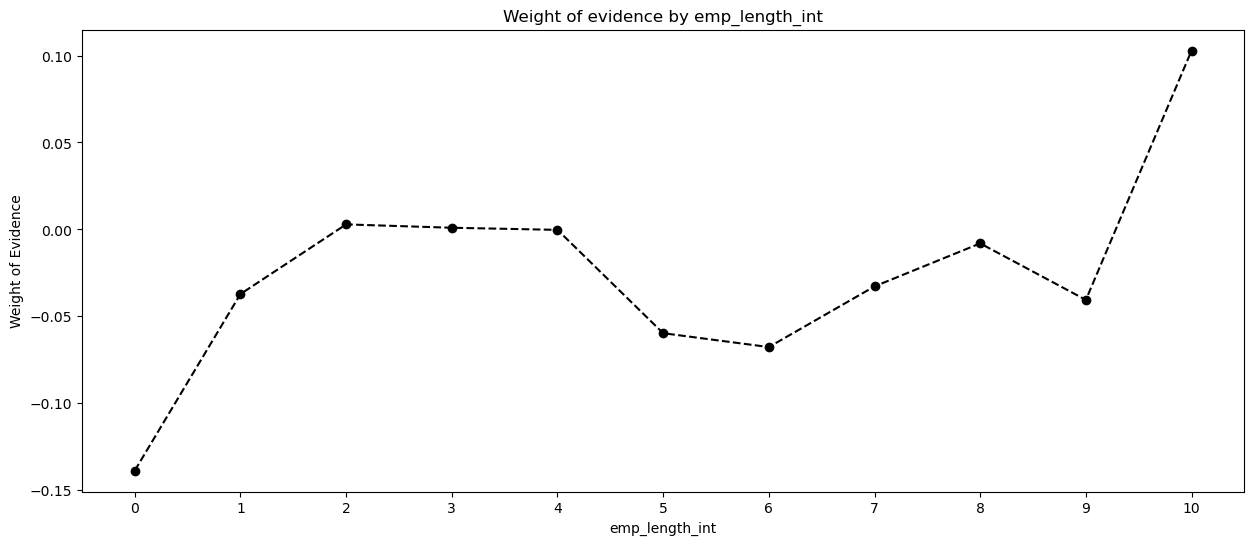

In [156]:
woe_feature = woe_continuous(df_inputs_prep, 'emp_length_int', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 0)

In [157]:
df_emp_length = pd.DataFrame(columns = ['emp_length_int'])
df_emp_length['emp_length_int'] = df_inputs_prep['emp_length_int']

conditions = [
              (df_emp_length['emp_length_int'] == 0),
              (df_emp_length['emp_length_int'] == 1),
              (df_emp_length['emp_length_int'] > 1) & (df_emp_length['emp_length_int'] <= 4),
              (df_emp_length['emp_length_int'] > 4) & (df_emp_length['emp_length_int'] <= 6),
              (df_emp_length['emp_length_int'] > 6) & (df_emp_length['emp_length_int'] <= 9),
              (df_emp_length['emp_length_int'] > 9)
             ]

# create a list of the values we want to assign for each condition
values = ['emp_length_0', 'emp_length_1', 'emp_length_2_4', 'emp_length_5_6', 'emp_length_7_9', 'emp_length_10']

# create a new column and use np.select to assign values to it using our lists as arguments
df_emp_length['emp_length_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_emp_length['emp_length_class'].unique()) 

After binning
['emp_length_2_4' 'emp_length_5_6' 'emp_length_10' 'emp_length_7_9'
 'emp_length_0' 'emp_length_1']


emp_length_class   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0     emp_length_0   45720   5651   40069   0.13858     0.1206 -0.13897   
1   emp_length_5_6   45489   5261   40228   0.12902    0.12108 -0.06352   
2     emp_length_1   23654   2673   20981   0.06555    0.06315  -0.0373   
3   emp_length_7_9   53169   5952   47217   0.14596    0.14211 -0.02673   
4   emp_length_2_4   84751   9254   75497   0.22694    0.22723  0.00128   
5    emp_length_10  120245  11987  108258   0.29396    0.32583  0.10293   

   IV_class  IV_feature  
0    0.0025     0.00647  
1    0.0005     0.00647  
2     9e-05     0.00647  
3    0.0001     0.00647  
4       0.0     0.00647  
5   0.00328     0.00647

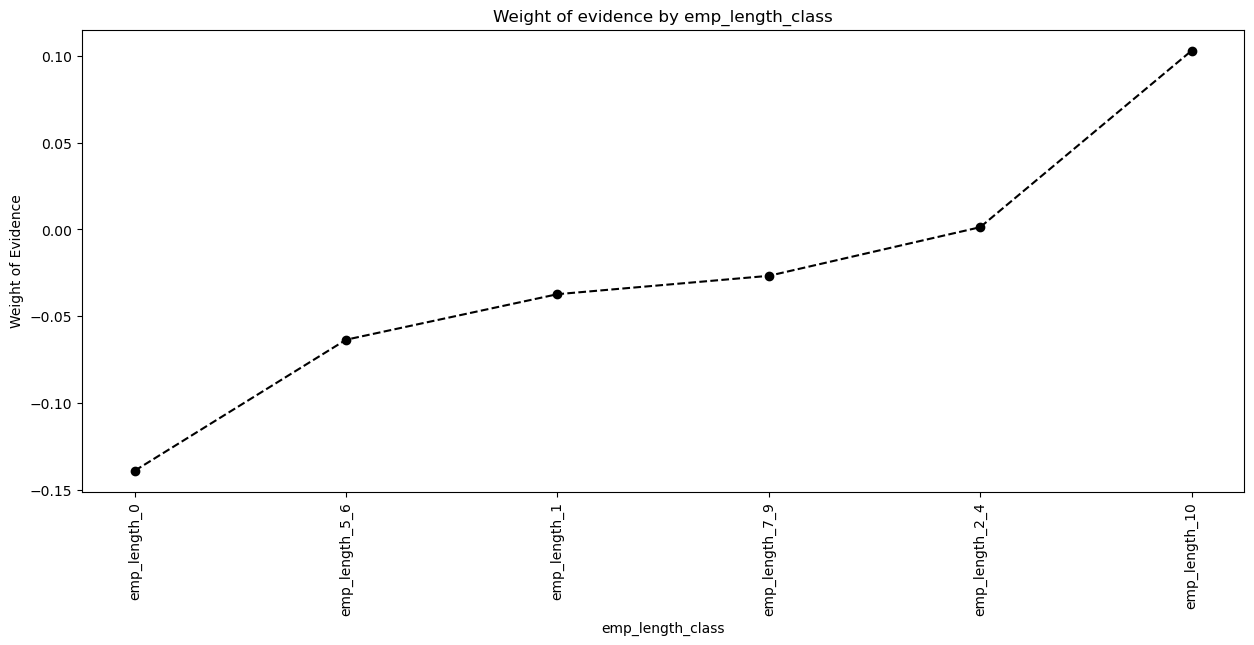

In [158]:
df_inputs_prep = pd.concat([df_inputs_prep, df_emp_length['emp_length_class']], axis =1)

woe_feature = woe_discrete(df_inputs_prep, 'emp_length_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.3 Feature: Issue Date__

***Feature Name:** issue_date <br>**Definition:** The month the borrower's earliest reported credit line was opened.*

The feature was converted into months since the earliest credit line was poened w.r.t a reference date.

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),


mths_issue_d_factor  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0      (36.909, 38.82]  28170   1627   26543    0.0399    0.07989  0.69427   
1       (38.82, 40.64]  39636   2837   36799   0.06957    0.11076  0.46503   
2       (40.64, 42.46]  38614   3194   35420   0.07833    0.10661  0.30825   
3       (42.46, 44.28]  29038   2654   26384   0.06508    0.07941  0.19901   
4        (44.28, 46.1]  28367   2786   25581   0.06832    0.07699  0.11947   
5        (46.1, 47.92]  12165   1225   10940   0.03004    0.03293  0.09185   
6       (47.92, 49.74]  24451   2472   21979   0.06062    0.06615   0.0873   
7       (49.74, 51.56]  22969   2565   20404    0.0629    0.06141 -0.02397   
8       (51.56, 53.38]  20640   2466   18174   0.06047     0.0547 -0.10028   
9        (53.38, 55.2]  18312   2438   15874   0.05979    0.04778 -0.22423   
10       (55.2, 57.02]  15767   2234   13533   0.05478    0.04073 -0.29636   
11      (57.02, 58.84]   6639    887    5752   0.02175    0.01731 -0.22833   
12      (58.84, 60.66]  11529   1618    9911   0.03968    0.02983 -0.28533   
13      (60.66, 62.48]   9974   1468    8506     0.036     0.0256 -0.34093   
14       (62.48, 64.3]   9811   1453    8358   0.03563    0.02516 -0.34793   
15       (64.3, 66.12]   7994   1304    6690   0.03198    0.02014  -0.4624   
16      (66.12, 67.94]   3033    544    2489   0.01334    0.00749  -0.5772   
17      (67.94, 69.76]   5334    847    4487   0.02077     0.0135 -0.43082   
18      (69.76, 71.58]   4377    671    3706   0.01645    0.01115 -0.38889   
19       (71.58, 73.4]   3868    667    3201   0.01636    0.00963 -0.52996   
20       (73.4, 75.22]   3501    505    2996   0.01238    0.00902 -0.31664   
21      (75.22, 77.04]   3223    478    2745   0.01172    0.00826 -0.34987   
22      (77.04, 78.86]   1511    221    1290   0.00542    0.00388 -0.33426   
23      (78.86, 80.68]   2849    450    2399   0.01104    0.00722 -0.42467   
24       (80.68, 82.5]   2412    357    2055   0.00875    0.00619 -0.34612   
25       (82.5, 84.32]   2143    289    1854   0.00709    0.00558  -0.2395   
26      (84.32, 86.14]   2076    268    1808   0.00657    0.00544 -0.18873   
27      (86.14, 87.96]   1004    151     853    0.0037    0.00257 -0.36443   
28      (87.96, 89.78]   1921    319    1602   0.00782    0.00482 -0.48391   
29       (89.78, 91.6]   1870    295    1575   0.00723    0.00474  -0.4222   
30       (91.6, 93.42]   1504    191    1313   0.00468    0.00395 -0.16958   
31      (93.42, 95.24]   1210    135    1075   0.00331    0.00324 -0.02137   
32      (95.24, 97.06]   1067    124     943   0.00304    0.00284 -0.06805   
33      (97.06, 98.88]    518     71     447   0.00174    0.00135 -0.25378   
34      (98.88, 100.7]    877    126     751   0.00309    0.00226 -0.31281   
35     (100.7, 102.52]    674     84     590   0.00206    0.00178 -0.14609   
36    (102.52, 104.34]    319     46     273   0.00113    0.00082 -0.32067   
37    (104.34, 106.16]    542     81     461   0.00199    0.00139 -0.35883   
38    (106.16, 107.98]    258     29     229   0.00071    0.00069 -0.02857   
39     (107.98, 109.8]    448     64     384   0.00157    0.00116 -0.30266   
40     (109.8, 111.62]    367     65     302   0.00159    0.00091 -0.55804   
41    (111.62, 113.44]    139     23     116   0.00056    0.00035    -0.47   
42    (113.44, 115.26]    204     41     163   0.00101    0.00049  -0.7233   
43    (115.26, 117.08]    182     37     145   0.00091    0.00044 -0.72667   
44     (117.08, 118.9]    207     52     155   0.00128    0.00047 -1.00188   
45     (118.9, 120.72]    570    124     446   0.00304    0.00134 -0.81919   
46    (120.72, 122.54]    394    109     285   0.00267    0.00086  -1.1329   
47    (122.54, 124.36]    176     52     124   0.00128    0.00037 -1.24111   
48    (124.36, 126.18]    104     26      78   0.00064    0.00023 -1.02339   
49     (126.18, 128.0]     70      8      62    0.0002    0.00019 -0.05129   

    IV_class  IV_feature

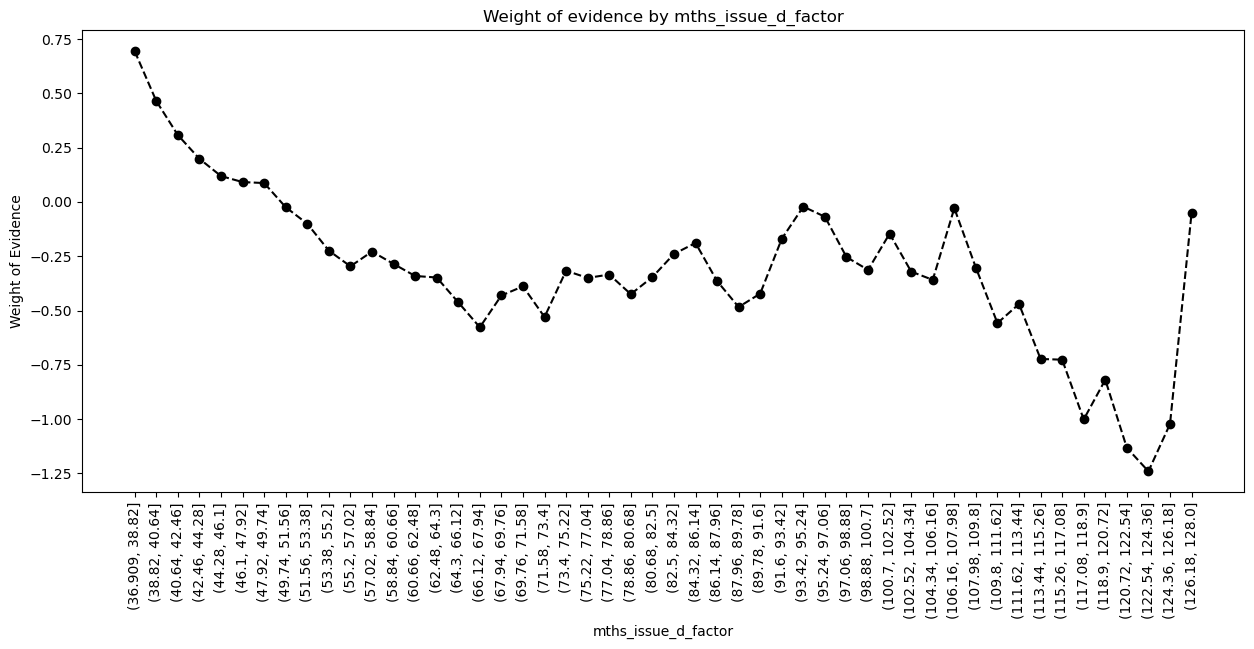

In [161]:
df_inputs_prep['mths_issue_d_factor'] = pd.cut(df_inputs_prep['mths_issue_d'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'mths_issue_d_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

In [162]:
df_mths_issue_d = pd.DataFrame(columns = ['mths_issue_d'])
df_mths_issue_d['mths_issue_d'] = df_inputs_prep['mths_issue_d']

conditions = [
              (df_mths_issue_d['mths_issue_d'] <= 38),
              (df_mths_issue_d['mths_issue_d'] > 38) & (df_mths_issue_d['mths_issue_d'] <= 39),
              (df_mths_issue_d['mths_issue_d'] > 39) & (df_mths_issue_d['mths_issue_d'] <= 42),
              (df_mths_issue_d['mths_issue_d'] > 42) & (df_mths_issue_d['mths_issue_d'] <= 48),
              (df_mths_issue_d['mths_issue_d'] > 48) & (df_mths_issue_d['mths_issue_d'] <= 52),
              (df_mths_issue_d['mths_issue_d'] > 52) & (df_mths_issue_d['mths_issue_d'] <= 64),
              (df_mths_issue_d['mths_issue_d'] > 64) & (df_mths_issue_d['mths_issue_d'] <= 84),
              (df_mths_issue_d['mths_issue_d'] > 84)
             ]

# create a list of the values we want to assign for each condition
values = ['mths_issue_d_<=38', 'mthsissue_d_38_39', 'mths_issue_d_39_41', 'mths_issue_d_41_48',
          'mths_issue_d_48_52', 'mths_issue_d_52_64', 'mths_issue_d_64_84', 'mths_issue_d_>84']

# create a new column and use np.select to assign values to it using our lists as arguments
df_mths_issue_d['mths_issue_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_mths_issue_d['mths_issue_class'].unique()) 

After binning
['mths_issue_d_41_48' 'mths_issue_d_64_84' 'mths_issue_d_52_64'
 'mths_issue_d_>84' 'mths_issue_d_<=38' 'mths_issue_d_39_41'
 'mths_issue_d_48_52' 'mthsissue_d_38_39']


mths_issue_class  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0  mths_issue_d_64_84  40245   6333   33912    0.1553    0.10207  -0.4197   
1    mths_issue_d_>84  16701   2521   14180   0.06182    0.04268  -0.3705   
2  mths_issue_d_52_64  82297  11331   70966   0.27787    0.21359  -0.2631   
3  mths_issue_d_48_52  45313   5017   40296   0.12303    0.12128 -0.01433   
4  mths_issue_d_41_48  82052   7918   74134   0.19417    0.22313  0.13902   
5  mths_issue_d_39_41  47168   3861   43307   0.09468    0.13034  0.31964   
6   mthsissue_d_38_39  31082   2170   28912   0.05321    0.08702  0.49189   
7   mths_issue_d_<=38  28170   1627   26543    0.0399    0.07989  0.69427   

   IV_class  IV_feature  
0   0.02234     0.10619  
1   0.00709     0.10619  
2   0.01691     0.10619  
3     3e-05     0.10619  
4   0.00403     0.10619  
5    0.0114     0.10619  
6   0.01663     0.10619  
7   0.02776     0.10619

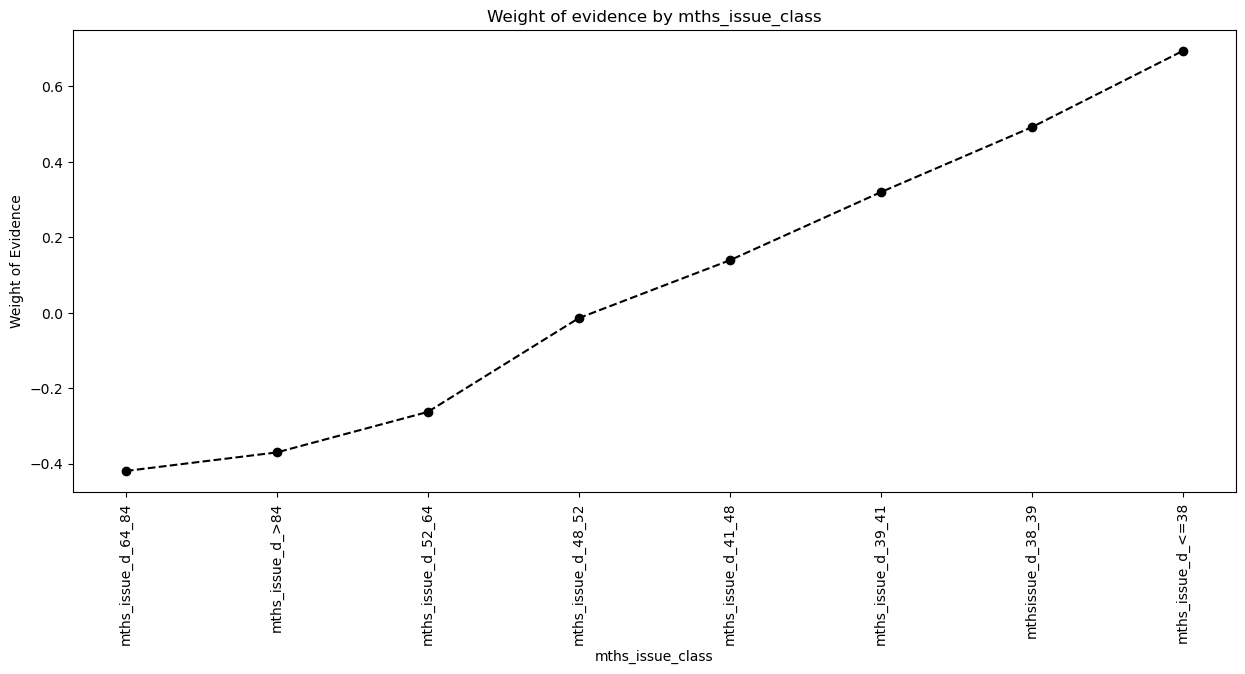

In [163]:
df_inputs_prep = pd.concat([df_inputs_prep, df_mths_issue_d['mths_issue_class']], axis =1)
df_inputs_prep = df_inputs_prep.drop('mths_issue_d_factor', axis=1)

woe_feature = woe_discrete(df_inputs_prep, 'mths_issue_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.4 Feature: Interest Rate__

***Feature Name:** earliest_cr_line <br>**Definition:** The month the borrower's earliest reported credit line was opened.*

The feature was converted into months since the earliest credit line was poened w.r.t a reference date.

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),


int_rate_factor  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0     (5.399, 5.833]    785     30     755   0.00074    0.00227  1.12088   
1     (5.833, 6.246]   8459    166    8293   0.00407    0.02496  1.81363   
2     (6.246, 6.658]   7826    223    7603   0.00547    0.02288  1.43098   
3     (6.658, 7.071]   1816     49    1767    0.0012    0.00532  1.48915   
4     (7.071, 7.484]   3143     74    3069   0.00181    0.00924  1.63022   
5     (7.484, 7.897]  12581    474   12107   0.01162    0.03644  1.14294   
6      (7.897, 8.31]   9687    491    9196   0.01204    0.02768  0.83248   
7      (8.31, 8.722]   6594    229    6365   0.00562    0.01916  1.22649   
8     (8.722, 9.135]   9539    597    8942   0.01464    0.02691  0.60874   
9     (9.135, 9.548]   6681    241    6440   0.00591    0.01938   1.1876   
10    (9.548, 9.961]   7588    517    7071   0.01268    0.02128  0.51774   
11   (9.961, 10.374]  10941    726   10215    0.0178    0.03074  0.54637   
12  (10.374, 10.786]   5857    506    5351   0.01241    0.01611  0.26094   
13  (10.786, 11.199]  17851   1257   16594   0.03083    0.04994  0.48233   
14  (11.199, 11.612]   4876    396    4480   0.00971    0.01348  0.32805   
15  (11.612, 12.025]  15597   1043   14554   0.02558     0.0438  0.53782   
16  (12.025, 12.438]  12336   1326   11010   0.03252    0.03314  0.01889   
17   (12.438, 12.85]  11065    853   10212   0.02092    0.03074  0.38486   
18   (12.85, 13.263]  21329   2070   19259   0.05076    0.05797  0.13282   
19  (13.263, 13.676]  15392   1420   13972   0.03482    0.04205  0.18867   
20  (13.676, 14.089]  10991   1134    9857   0.02781    0.02967  0.06474   
21  (14.089, 14.502]  23436   2632   20804   0.06454    0.06262  -0.0302   
22  (14.502, 14.914]   4333    594    3739   0.01457    0.01125  -0.2586   
23  (14.914, 15.327]  18932   2237   16695   0.05486    0.05025 -0.08777   
24   (15.327, 15.74]  12327   1387   10940   0.03401    0.03293 -0.03227   
25   (15.74, 16.153]   7477   1204    6273   0.02953    0.01888  -0.4473   
26  (16.153, 16.566]  12991   1825   11166   0.04475    0.03361 -0.28627   
27  (16.566, 16.978]   4237    667    3570   0.01636    0.01074 -0.42086   
28  (16.978, 17.391]  11396   1669    9727   0.04093    0.02928 -0.33496   
29  (17.391, 17.804]  12288   1973   10315   0.04838    0.03105 -0.44349   
30  (17.804, 18.217]   1306    231    1075   0.00566    0.00324 -0.55785   
31   (18.217, 18.63]  11036   1816    9220   0.04453    0.02775 -0.47293   
32   (18.63, 19.042]   6808   1232    5576   0.03021    0.01678 -0.58799   
33  (19.042, 19.455]   4425    871    3554   0.02136     0.0107 -0.69128   
34  (19.455, 19.868]   6763   1193    5570   0.02926    0.01676 -0.55723   
35  (19.868, 20.281]   4899    822    4077   0.02016    0.01227 -0.49654   
36  (20.281, 20.694]   3221    660    2561   0.01619    0.00771 -0.74188   
37  (20.694, 21.106]   4016    805    3211   0.01974    0.00966 -0.71465   
38  (21.106, 21.519]   2729    601    2128   0.01474     0.0064 -0.83427   
39  (21.519, 21.932]    989    237     752   0.00581    0.00226 -0.94422   
40  (21.932, 22.345]   3476    712    2764   0.01746    0.00832 -0.74125   
41  (22.345, 22.758]   2251    532    1719   0.01305    0.00517 -0.92592   
42   (22.758, 23.17]   1535    369    1166   0.00905    0.00351 -0.94715   
43   (23.17, 23.583]   2652    576    2076   0.01413    0.00625 -0.81572   
44  (23.583, 23.996]   1573    434    1139   0.01064    0.00343 -1.13206   
45  (23.996, 24.409]   1455    338    1117   0.00829    0.00336 -0.90311   
46  (24.409, 24.822]   1664    395    1269   0.00969    0.00382 -0.93084   
47  (24.822, 25.234]   1315    301    1014   0.00738    0.00305 -0.88363   
48  (25.234, 25.647]    778    205     573   0.00503    0.00172  -1.0731   
49   (25.647, 26.06]   1786    438    1348   0.01074    0.00406 -0.97279   

    IV_class  IV_feature  
0    0.00171     0.34343  
1    0.03789     0.34343  
2    0.02491     0.34343  
3    0.00614     0.3

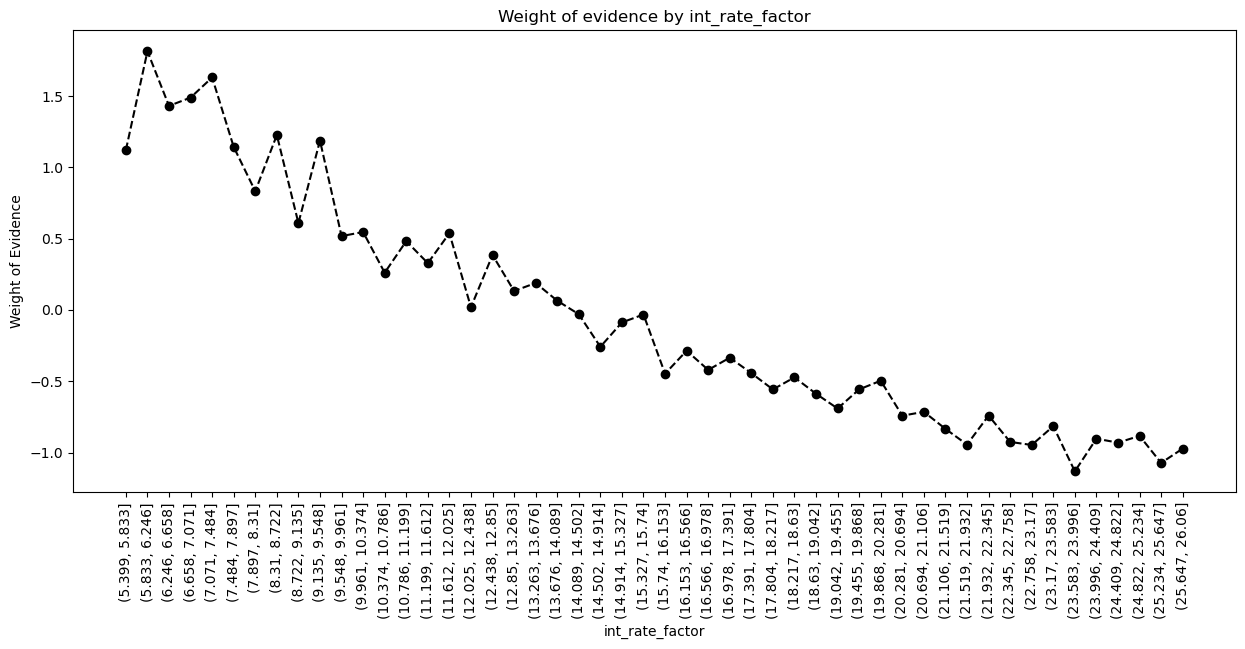

In [166]:
df_inputs_prep['int_rate_factor'] = pd.cut(df_inputs_prep['int_rate'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'int_rate_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

In [167]:
df_int_rate = pd.DataFrame(columns = ['int_rate'])
df_int_rate['int_rate'] = df_inputs_prep['int_rate']

conditions = [
              (df_int_rate['int_rate'] <= 9.548),
              (df_int_rate['int_rate'] > 9.548) & (df_int_rate['int_rate'] <= 12.025),
              (df_int_rate['int_rate'] > 12.025) & (df_int_rate['int_rate'] <= 15.74),
              (df_int_rate['int_rate'] > 15.74) & (df_int_rate['int_rate'] <= 20.281),
              (df_int_rate['int_rate'] > 20.281)
             ]

# create a list of the values we want to assign for each condition
values = ['int_rate_<9.548', 'int_rate_9.548_12.025', 'int_rate_12.025_15.74', 'int_rate_15.74_20.281', 'int_rate_>20.281']

# create a new column and use np.select to assign values to it using our lists as arguments
df_int_rate['int_rate_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_int_rate['int_rate_class'].unique()) 

After binning
['int_rate_<9.548' 'int_rate_12.025_15.74' 'int_rate_15.74_20.281'
 'int_rate_9.548_12.025' 'int_rate_>20.281']


int_rate_class   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0       int_rate_>20.281   29440   6603   22837   0.16193    0.06873 -0.85698   
1  int_rate_15.74_20.281   83626  13503   70123   0.33113    0.21105 -0.45042   
2  int_rate_12.025_15.74  130141  13653  116488   0.33481     0.3506  0.04608   
3  int_rate_9.548_12.025   62710   4445   58265     0.109    0.17536  0.47549   
4        int_rate_<9.548   67111   2574   64537   0.06312    0.19424  1.12406   

   IV_class  IV_feature  
0   0.07987     0.31363  
1   0.05409     0.31363  
2   0.00073     0.31363  
3   0.03155     0.31363  
4   0.14739     0.31363

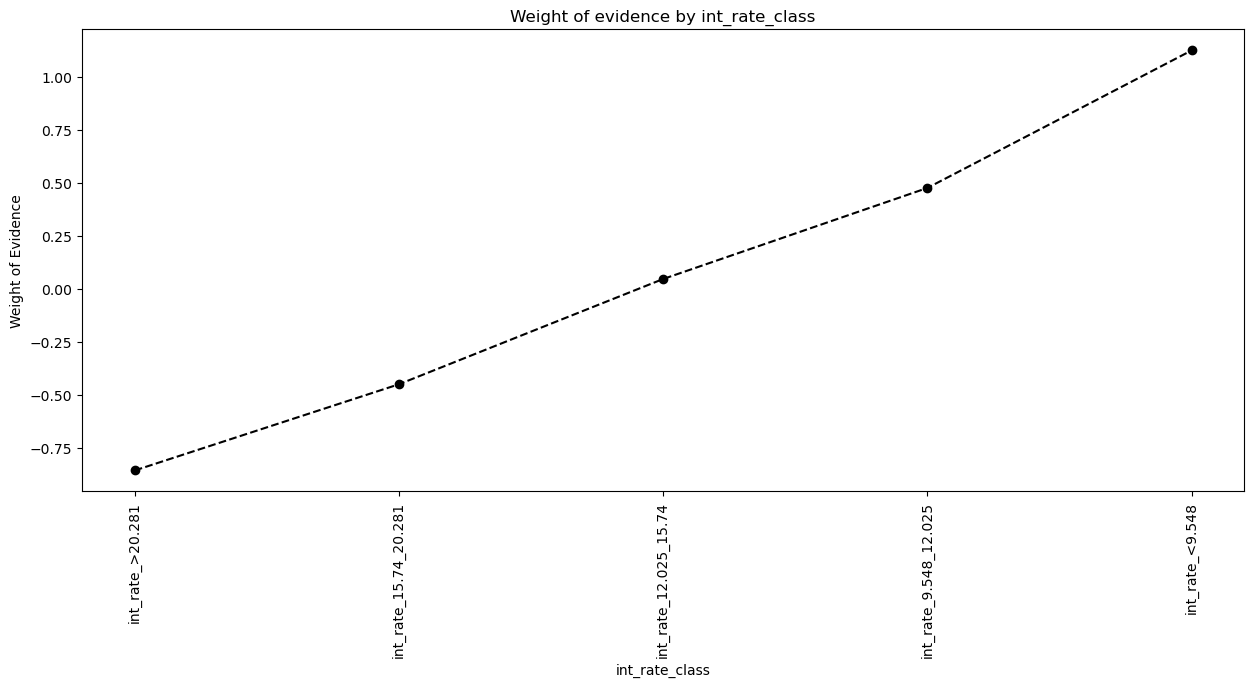

In [168]:
df_inputs_prep = pd.concat([df_inputs_prep, df_int_rate['int_rate_class']], axis =1)
df_inputs_prep = df_inputs_prep.drop('int_rate_factor', axis=1)

woe_feature = woe_discrete(df_inputs_prep, 'int_rate_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.5 Feature: Funded Amount__

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),


funded_amnt_factor  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0      (465.5, 1190.0]   1224    116    1108   0.00284    0.00333  0.15917   
1     (1190.0, 1880.0]   3028    291    2737   0.00714    0.00824  0.14329   
2     (1880.0, 2570.0]   6018    639    5379   0.01567    0.01619  0.03265   
3     (2570.0, 3260.0]   7248    804    6444   0.01972     0.0194 -0.01636   
4     (3260.0, 3950.0]   4751    515    4236   0.01263    0.01275  0.00946   
5     (3950.0, 4640.0]   9023    984    8039   0.02413     0.0242   0.0029   
6     (4640.0, 5330.0]  15903   1715   14188   0.04206     0.0427   0.0151   
7     (5330.0, 6020.0]  17236   1619   15617    0.0397      0.047   0.1688   
8     (6020.0, 6710.0]   6914    777    6137   0.01905    0.01847 -0.03092   
9     (6710.0, 7400.0]  11806   1204   10602   0.02953    0.03191  0.07751   
10    (7400.0, 8090.0]  17692   1816   15876   0.04453    0.04778  0.07044   
11    (8090.0, 8780.0]   6316    761    5555   0.01866    0.01672 -0.10978   
12    (8780.0, 9470.0]   9168   1097    8071    0.0269    0.02429 -0.10206   
13   (9470.0, 10160.0]  33410   3508   29902   0.08603       0.09  0.04511   
14  (10160.0, 10850.0]   6755    859    5896   0.02107    0.01775 -0.17146   
15  (10850.0, 11540.0]   8559   1004    7555   0.02462    0.02274 -0.07943   
16  (11540.0, 12230.0]  23506   2292   21214   0.05621    0.06385  0.12744   
17  (12230.0, 12920.0]   4802    600    4202   0.01471    0.01265 -0.15087   
18  (12920.0, 13610.0]   7247    762    6485   0.01869    0.01952  0.04345   
19  (13610.0, 14300.0]   8123    871    7252   0.02136    0.02183  0.02177   
20  (14300.0, 14990.0]   5183    648    4535   0.01589    0.01365 -0.15195   
21  (14990.0, 15680.0]  21757   2191   19566   0.05373    0.05889   0.0917   
22  (15680.0, 16370.0]  11788   1366   10422    0.0335    0.03137 -0.06569   
23  (16370.0, 17060.0]   6538    806    5732   0.01977    0.01725 -0.13635   
24  (17060.0, 17750.0]   3422    456    2966   0.01118    0.00893 -0.22471   
25  (17750.0, 18440.0]  11441   1315   10126   0.03225    0.03048 -0.05645   
26  (18440.0, 19130.0]   3919    513    3406   0.01258    0.01025 -0.20483   
27  (19130.0, 19820.0]   4004    571    3433     0.014    0.01033 -0.30401   
28  (19820.0, 20510.0]  20287   2049   18238   0.05025    0.05489  0.08832   
29  (20510.0, 21200.0]   6712    696    6016   0.01707    0.01811  0.05914   
30  (21200.0, 21890.0]   2081    309    1772   0.00758    0.00533 -0.35216   
31  (21890.0, 22580.0]   4114    454    3660   0.01113    0.01102 -0.00993   
32  (22580.0, 23270.0]   2445    281    2164   0.00689    0.00651 -0.05673   
33  (23270.0, 23960.0]   1825    283    1542   0.00694    0.00464 -0.40259   
34  (23960.0, 24650.0]   9836    941    8895   0.02308    0.02677  0.14832   
35  (24650.0, 25340.0]  10074   1110    8964   0.02722    0.02698 -0.00886   
36  (25340.0, 26030.0]   1832    241    1591   0.00591    0.00479 -0.21012   
37  (26030.0, 26720.0]   1252    206    1046   0.00505    0.00315 -0.47199   
38  (26720.0, 27410.0]   1510    191    1319   0.00468    0.00397 -0.16453   
39  (27410.0, 28100.0]   6457    600    5857   0.01471    0.01763  0.18107   
40  (28100.0, 28790.0]    795    116     679   0.00284    0.00204 -0.33085   
41  (28790.0, 29480.0]   1176    157    1019   0.00385    0.00307  -0.2264   
42  (29480.0, 30170.0]   7308    843    6465   0.02067    0.01946 -0.06032   
43  (30170.0, 30860.0]    567     99     468   0.00243    0.00141  -0.5443   
44  (30860.0, 31550.0]    884    103     781   0.00253    0.00235  -0.0738   
45  (31550.0, 32240.0]   1326    169    1157   0.00414    0.00348 -0.17366   
46  (32240.0, 32930.0]    631     79     552   0.00194    0.00166 -0.15587   
47  (32930.0, 33620.0]   1090    114     976    0.0028    0.00294  0.04879   
48  (33620.0, 34310.0]    492     54     438   0.00132    0.00132      0.0   
49  (34310.0, 35000.0]  13553   1583   11970   0.03882    0.03603 -0.07458   

    IV_class  IV_feature 

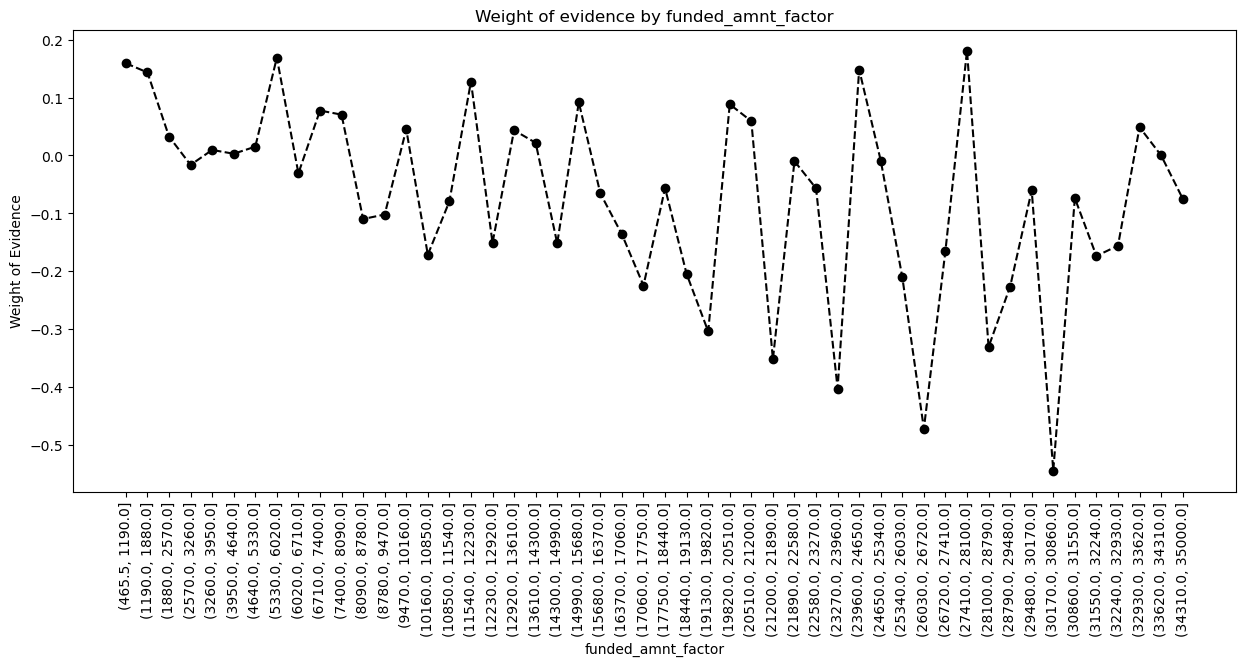

In [170]:
df_inputs_prep['funded_amnt_factor'] = pd.cut(df_inputs_prep['funded_amnt'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'funded_amnt_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

In [171]:
df_inputs_prep = df_inputs_prep.drop('funded_amnt_factor', axis=1)

#### __2.3.5 Feature: Earliest Credit Line__

***Feature Name:** earliest_cr_line <br>**Definition:** The month the borrower's earliest reported credit line was opened.*

The feature was converted into months since the earliest credit line was poened w.r.t a reference date.

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_earliest_cr_line_factor  n_obs  n_bad  n_good  prop_bad  prop_good  \
0               (-0.596, 11.92]     24      3      21     7e-05      6e-05   
1                (11.92, 23.84]      0      0       0       0.0        0.0   
2                (23.84, 35.76]      0      0       0       0.0        0.0   
3                (35.76, 47.68]      0      0       0       0.0        0.0   
4                 (47.68, 59.6]      0      0       0       0.0        0.0   
5                 (59.6, 71.52]      0      0       0       0.0        0.0   
6                (71.52, 83.44]    722     73     649   0.00179    0.00195   
7                (83.44, 95.36]   2079    238    1841   0.00584    0.00554   
8               (95.36, 107.28]   2667    386    2281   0.00947    0.00687   
9               (107.28, 119.2]   5092    656    4436   0.01609    0.01335   
10              (119.2, 131.12]   9217   1250    7967   0.03065    0.02398   
11             (131.12, 143.04]  12704   1692   11012   0.04149    0.03314   
12             (143.04, 154.96]  12565   1563   11002   0.03833    0.03311   
13             (154.96, 166.88]  16266   1968   14298   0.04826    0.04303   
14              (166.88, 178.8]  17912   2074   15838   0.05086    0.04767   
15              (178.8, 190.72]  21913   2492   19421   0.06111    0.05845   
16             (190.72, 202.64]  26096   3009   23087   0.07379    0.06949   
17             (202.64, 214.56]  28421   3271   25150   0.08021     0.0757   
18             (214.56, 226.48]  27027   3061   23966   0.07506    0.07213   
19              (226.48, 238.4]  23496   2625   20871   0.06437    0.06282   
20              (238.4, 250.32]  18087   1990   16097    0.0488    0.04845   
21             (250.32, 262.24]  18090   1913   16177   0.04691    0.04869   
22             (262.24, 274.16]  17958   1902   16056   0.04664    0.04833   
23             (274.16, 286.08]  16116   1561   14555   0.03828    0.04381   
24              (286.08, 298.0]  13919   1385   12534   0.03396    0.03772   
25              (298.0, 309.92]   9291    854    8437   0.02094    0.02539   
26             (309.92, 321.84]   7616    728    6888   0.01785    0.02073   
27             (321.84, 333.76]   8603    845    7758   0.02072    0.02335   
28             (333.76, 345.68]   8307    770    7537   0.01888    0.02268   
29              (345.68, 357.6]   7243    711    6532   0.01744    0.01966   
30              (357.6, 369.52]   5994    531    5463   0.01302    0.01644   
31             (369.52, 381.44]   4984    444    4540   0.01089    0.01366   
32             (381.44, 393.36]   4640    414    4226   0.01015    0.01272   
33             (393.36, 405.28]   4203    385    3818   0.00944    0.01149   
34              (405.28, 417.2]   3780    364    3416   0.00893    0.01028   
35              (417.2, 429.12]   2998    264    2734   0.00647    0.00823   
36             (429.12, 441.04]   2251    198    2053   0.00486    0.00618   
37             (441.04, 452.96]   1604    124    1480   0.00304    0.00445   
38             (452.96, 464.88]   1481    137    1344   0.00336    0.00405   
39              (464.88, 476.8]   1612    141    1471   0.00346    0.00443   
40              (476.8, 488.72]   1582    136    1446   0.00334    0.00435   
41             (488.72, 500.64]   1248    119    1129   0.00292     0.0034   
42             (500.64, 512.56]    913     80     833   0.00196    0.00251   
43             (512.56, 524.48]    698     55     643   0.00135    0.00194   
44              (524.48, 536.4]    642     63     579   0.00154    0.00174   
45              (536.4, 548.32]    580     50     530   0.00123     0.0016   
46             (548.32, 560.24]    510     43     467   0.00105    0.00141   
47             (560.24, 572.16]    326     36     290   0.00088    0.00087   
48             (572.16, 584.08]    351     33     318   0.00081    0.00096   
49              (584.08, 596.0]   1200    141    1059   0.00346    0.00319   

        woe  IV_class  I

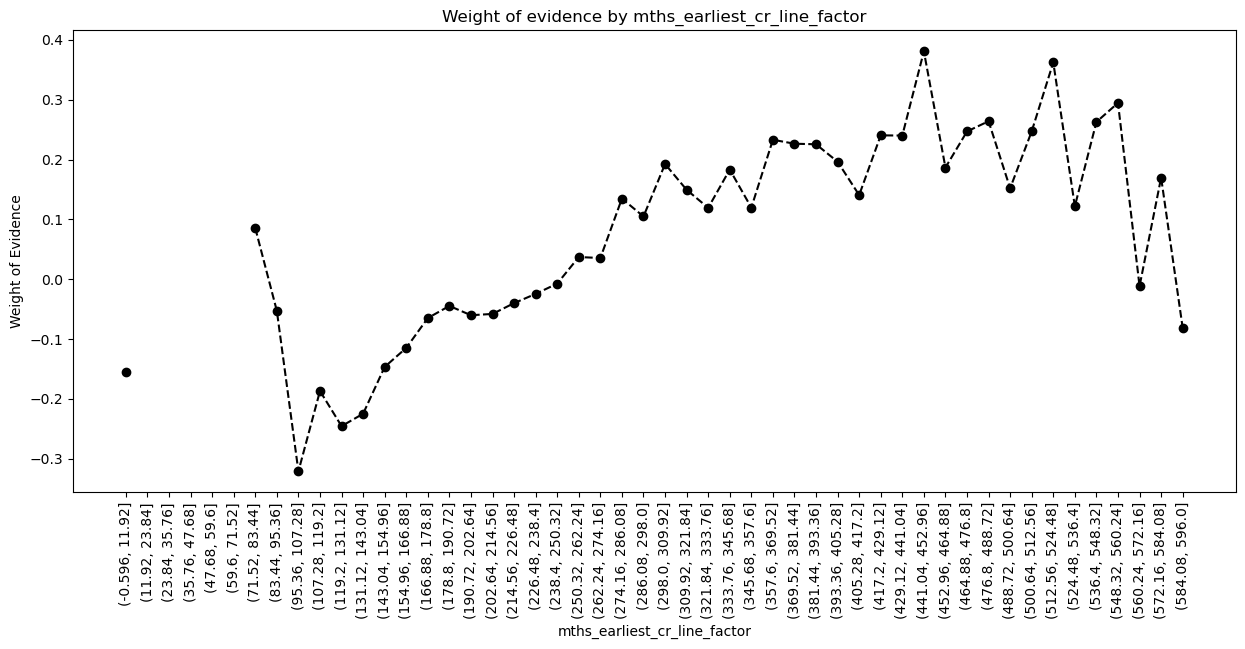

In [174]:
df_inputs_prep['mths_earliest_cr_line_factor'] = pd.cut(df_inputs_prep['mths_earliest_cr_line'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'mths_earliest_cr_line_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

In [175]:
df_mths_earliest_cr_line_ = pd.DataFrame(columns = ['mths_earliest_cr_line'])
df_mths_earliest_cr_line_['mths_earliest_cr_line'] = df_inputs_prep['mths_earliest_cr_line']

conditions = [
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 140),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 140) & (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 167),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 167) & (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 251),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 251) & (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 275),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 275) & (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 370),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 370)
             ]

# create a list of the values we want to assign for each condition
values = ['mths_earliest_cr_line_<140', 'mths_earliest_cr_line_140-167', 'mths_earliest_cr_line_167-251', 'mths_earliest_cr_line_251-275',
          'mths_earliest_cr_line_275-370', 'mths_earliest_cr_line_>370']

# create a new column and use np.select to assign values to it using our lists as arguments
df_mths_earliest_cr_line_['mths_earliest_cr_line_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_mths_earliest_cr_line_['mths_earliest_cr_line_class'].unique()) 

After binning
['mths_earliest_cr_line_>370' 'mths_earliest_cr_line_167-251'
 'mths_earliest_cr_line_275-370' 'mths_earliest_cr_line_140-167'
 'mths_earliest_cr_line_<140' 'mths_earliest_cr_line_251-275']


mths_earliest_cr_line_class   n_obs  n_bad  n_good  prop_bad  prop_good  \
0     mths_earliest_cr_line_<140   29448   3929   25519   0.09635    0.07681   
1  mths_earliest_cr_line_140-167   33253   4065   29188   0.09969    0.08785   
2  mths_earliest_cr_line_167-251  162884  18515  144369   0.45404    0.43452   
3  mths_earliest_cr_line_251-275   36047   3782   32265   0.09275    0.09711   
4  mths_earliest_cr_line_275-370   76311   7302   69009   0.17907     0.2077   
5     mths_earliest_cr_line_>370   35085   3185   31900   0.07811    0.09601   

       woe  IV_class  IV_feature  
0 -0.22665   0.00443     0.01493  
1 -0.12643    0.0015     0.01493  
2 -0.04394   0.00086     0.01493  
3  0.04594    0.0002     0.01493  
4  0.14832   0.00425     0.01493  
5  0.20633   0.00369     0.01493

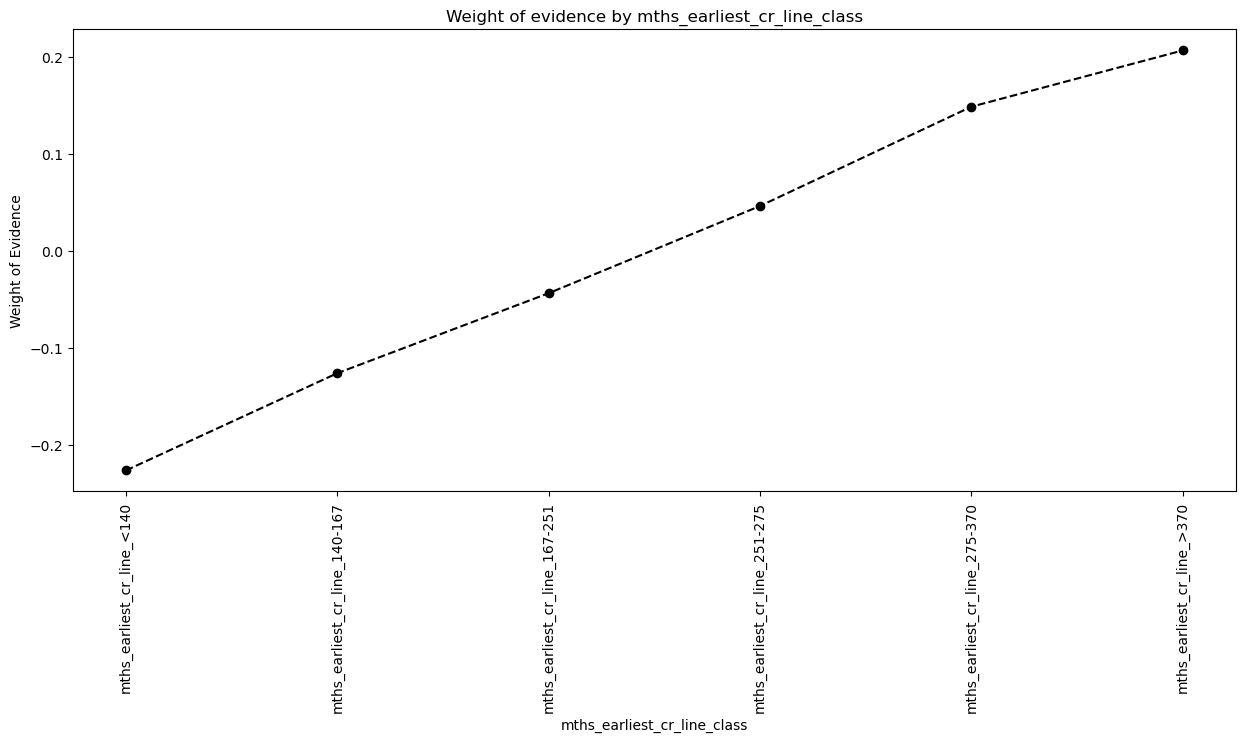

In [176]:
df_inputs_prep = pd.concat([df_inputs_prep, df_mths_earliest_cr_line_['mths_earliest_cr_line_class']], axis =1)
df_inputs_prep = df_inputs_prep.drop('mths_earliest_cr_line_factor', axis=1)

woe_feature = woe_discrete(df_inputs_prep, 'mths_earliest_cr_line_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.2 Feature: Delinquency (2 years)__

***Feature Name:** delinq_2yrs <br>**Definition:** The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.*

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


delinq_2yrs   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0           0.0  306417  33553  272864   0.82282    0.82126  -0.0019   
1           1.0   44927   4796   40131   0.11761    0.12079  0.02668   
2           2.0   13118   1456   11662   0.03571     0.0351 -0.01723   
3           3.0    4550    531    4019   0.01302     0.0121 -0.07328   
4           4.0    1868    189    1679   0.00463    0.00505  0.08683   
5           5.0     966    114     852    0.0028    0.00256 -0.08961   
6           6.0     501     49     452    0.0012    0.00136  0.12516   
7           7.0     279     39     240   0.00096    0.00072 -0.28768   
8           8.0     148     14     134   0.00034     0.0004  0.16252   
9           9.0      89     10      79   0.00025    0.00024 -0.04082   
10         10.0      56      8      48    0.0002    0.00014 -0.35667   
11         11.0      31      3      28     7e-05      8e-05  0.13353   
12         12.0      30      8      22    0.0002      7e-05 -1.04982   
13         13.0      18      3      15     7e-05      5e-05 -0.33647   
14         14.0       6      1       5     2e-05      2e-05      0.0   
15         15.0       6      1       5     2e-05      2e-05      0.0   
16         16.0       4      0       4       0.0      1e-05      inf   
17         17.0       3      1       2     2e-05      1e-05 -0.69315   
18         18.0       3      1       2     2e-05      1e-05 -0.69315   
19         19.0       2      0       2       0.0      1e-05      inf   
20         21.0       2      1       1     2e-05        0.0     -inf   
21         22.0       2      0       2       0.0      1e-05      inf   
22         24.0       1      0       1       0.0        0.0      NaN   
23         29.0       1      0       1       0.0        0.0      NaN   

    IV_class  IV_feature  
0        0.0         inf  
1      8e-05         inf  
2      1e-05         inf  
3      7e-05         inf  
4      4e-05         inf  
5      2e-05         inf  
6      2e-05         inf  
7      7e-05         inf  
8      1e-05         inf  
9        0.0         inf  
10     2e-05         inf  
11       0.0         inf  
12   0.00014         inf  
13     1e-05         inf  
14       0.0         inf  
15       0.0         inf  
16       inf         inf  
17     1e-05         inf  
18     1e-05         inf  
19       inf         inf  
20       inf         inf  
21       inf         inf  
22       NaN         inf  
23       NaN         inf

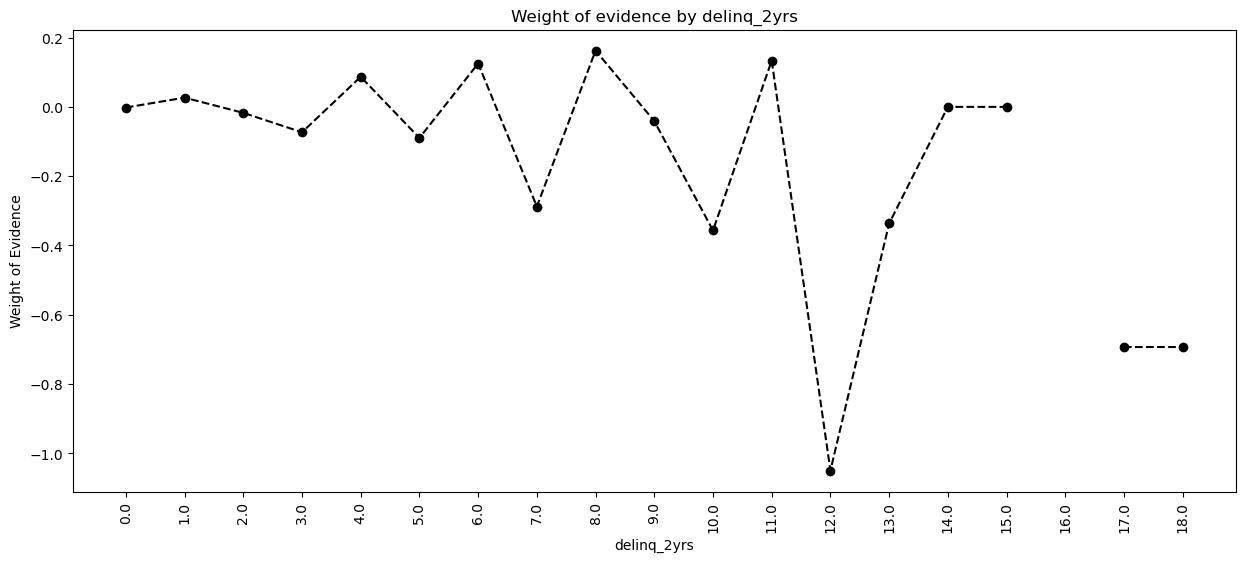

In [179]:
woe_feature = woe_continuous(df_inputs_prep, 'delinq_2yrs', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

In [180]:
df_delinq_2yrs = pd.DataFrame(columns = ['delinq_2yrs'])
df_delinq_2yrs['delinq_2yrs'] = df_inputs_prep['delinq_2yrs']

conditions = [
              (df_delinq_2yrs['delinq_2yrs'] == 0),
              (df_delinq_2yrs['delinq_2yrs'] > 0) & (df_delinq_2yrs['delinq_2yrs'] <= 3),
              (df_delinq_2yrs['delinq_2yrs'] > 3)
             ]

# create a list of the values we want to assign for each condition
values = ['delinq_2yrs_0', 'delinq_2yrs_1-3', 'delinq_2yrs_>=4']

# create a new column and use np.select to assign values to it using our lists as arguments
df_delinq_2yrs['delinq_2yrs_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_delinq_2yrs['delinq_2yrs_class'].unique()) 

After binning
['delinq_2yrs_0' 'delinq_2yrs_1-3' 'delinq_2yrs_>=4']


delinq_2yrs_class   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0   delinq_2yrs_>=4    4016    442    3574   0.01084    0.01076 -0.00741   
1     delinq_2yrs_0  306417  33553  272864   0.82282    0.82126  -0.0019   
2   delinq_2yrs_1-3   62595   6783   55812   0.16634    0.16798  0.00981   

   IV_class  IV_feature  
0       0.0       2e-05  
1       0.0       2e-05  
2     2e-05       2e-05

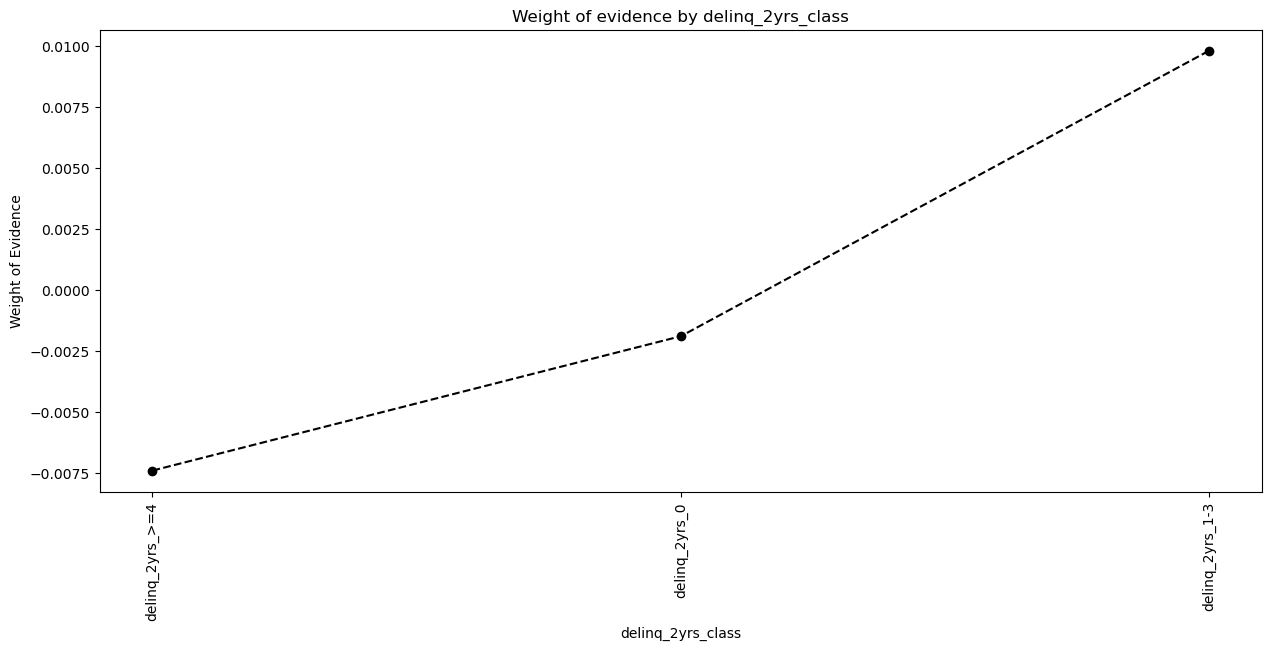

In [181]:
df_inputs_prep = pd.concat([df_inputs_prep, df_delinq_2yrs['delinq_2yrs_class']], axis =1)

woe_feature = woe_discrete(df_inputs_prep, 'delinq_2yrs_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.3 Feature: Inquiries (last 6 months)__

***Feature Name:** inq_last_6mths <br>**Definition:** The number of inquiries in past 6 months (excluding auto and mortgage inquiries).*

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0              0.0  193232  17701  175531   0.43408    0.52831  0.19645   
1              1.0  104163  11984   92179   0.29388    0.27744 -0.05757   
2              2.0   46214   6276   39938   0.15391     0.1202 -0.24721   
3              3.0   20040   3213   16827   0.07879    0.05065 -0.44185   
4              4.0    5810    881    4929    0.0216    0.01484 -0.37537   
5              5.0    2217    388    1829   0.00951     0.0055  -0.5476   
6              6.0     977    207     770   0.00508    0.00232 -0.78374   
7              7.0     159     51     108   0.00125    0.00033 -1.33181   
8              8.0     101     36      65   0.00088     0.0002  -1.4816   
9              9.0      43     14      29   0.00034      9e-05 -1.32914   
10            10.0      17      2      15     5e-05      5e-05      0.0   
11            11.0       8      3       5     7e-05      2e-05 -1.25276   
12            12.0      12      6       6   0.00015      2e-05  -2.0149   
13            13.0       5      1       4     2e-05      1e-05 -0.69315   
14            14.0       5      4       1    0.0001        0.0     -inf   
15            15.0       9      5       4   0.00012      1e-05 -2.48491   
16            16.0       3      0       3       0.0      1e-05      inf   
17            17.0       2      1       1     2e-05        0.0     -inf   
18            18.0       2      1       1     2e-05        0.0     -inf   
19            19.0       1      0       1       0.0        0.0      NaN   
20            20.0       1      1       0     2e-05        0.0     -inf   
21            24.0       1      0       1       0.0        0.0      NaN   
22            25.0       1      1       0     2e-05        0.0     -inf   
23            27.0       1      0       1       0.0        0.0      NaN   
24            28.0       1      0       1       0.0        0.0      NaN   
25            31.0       1      0       1       0.0        0.0      NaN   
26            32.0       1      1       0     2e-05        0.0     -inf   
27            33.0       1      1       0     2e-05        0.0     -inf   

    IV_class  IV_feature  
0    0.01851         inf  
1    0.00095         inf  
2    0.00833         inf  
3    0.01243         inf  
4    0.00254         inf  
5     0.0022         inf  
6    0.00216         inf  
7    0.00123         inf  
8    0.00101         inf  
9    0.00033         inf  
10       0.0         inf  
11     6e-05         inf  
12   0.00026         inf  
13     1e-05         inf  
14       inf         inf  
15   0.00027         inf  
16       inf         inf  
17       inf         inf  
18       inf         inf  
19       NaN         inf  
20       inf         inf  
21       NaN         inf  
22       inf         inf  
23       NaN         inf  
24       NaN         inf  
25       NaN         inf  
26       inf         inf  
27       inf         inf

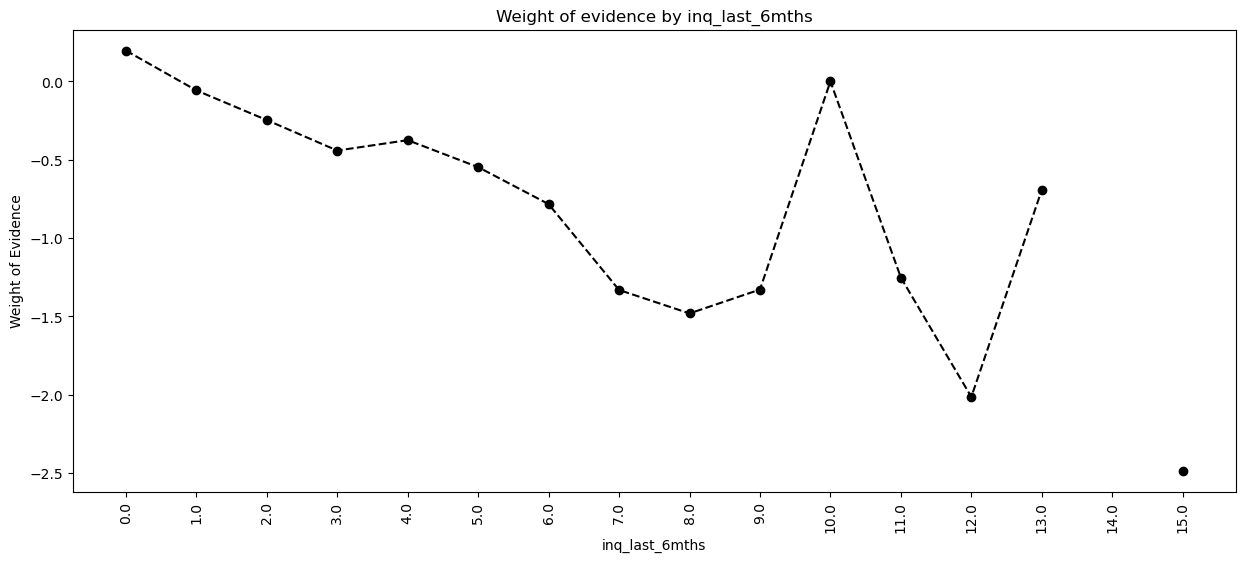

In [184]:
woe_feature = woe_continuous(df_inputs_prep, 'inq_last_6mths', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

After binning
['inq_last_6mths_0_2' 'inq_last_6mths_3_6' 'inq_last_6mths_0'
 'inq_last_6mths_>6']


inq_last_6mths_class   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0    inq_last_6mths_>6     375    128     247   0.00314    0.00074 -1.44533   
1   inq_last_6mths_3_6   29044   4689   24355   0.11499     0.0733 -0.45028   
2   inq_last_6mths_0_2  150377  18260  132117   0.44779    0.39764 -0.11878   
3     inq_last_6mths_0  193232  17701  175531   0.43408    0.52831  0.19645   

   IV_class  IV_feature  
0   0.00347     0.04671  
1   0.01877     0.04671  
2   0.00596     0.04671  
3   0.01851     0.04671

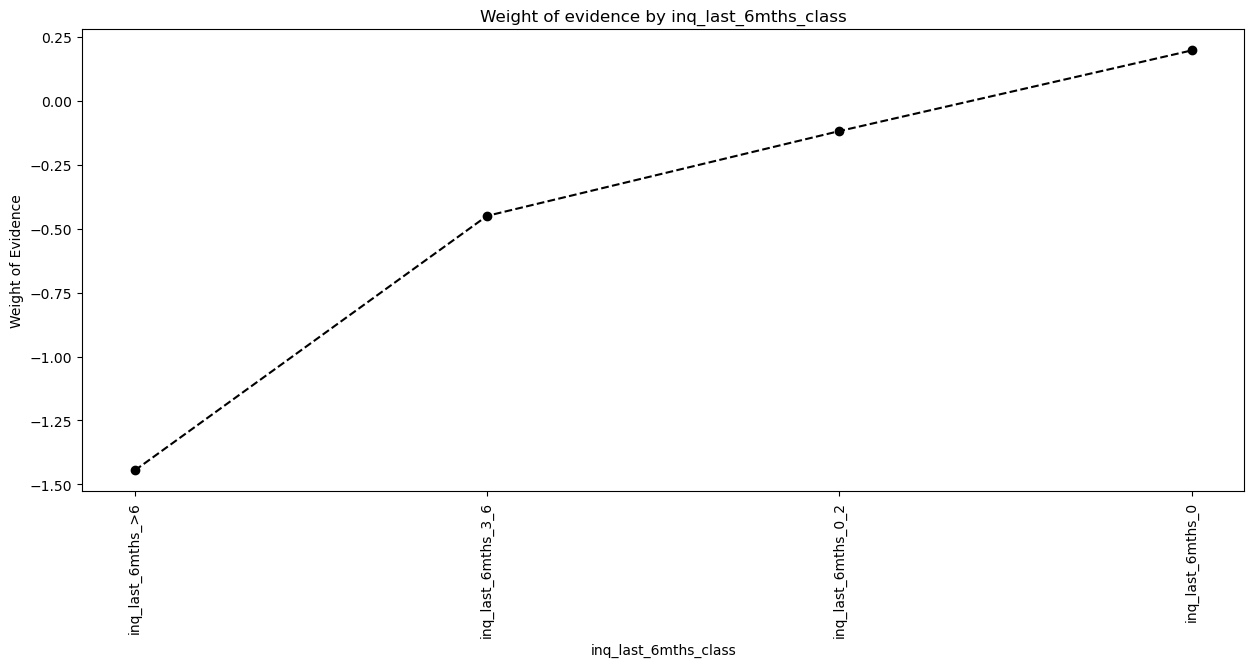

In [185]:
df_inq_last_6mths = pd.DataFrame(columns = ['inq_last_6mths'])
df_inq_last_6mths['inq_last_6mths'] = df_inputs_prep['inq_last_6mths']

conditions = [
              (df_inq_last_6mths['inq_last_6mths'] == 0),
              (df_inq_last_6mths['inq_last_6mths'] > 0) & (df_inq_last_6mths['inq_last_6mths'] <= 2),
              (df_inq_last_6mths['inq_last_6mths'] > 2) & (df_inq_last_6mths['inq_last_6mths'] <= 6),
              (df_inq_last_6mths['inq_last_6mths'] > 6)
             ]

# create a list of the values we want to assign for each condition
values = ['inq_last_6mths_0', 'inq_last_6mths_0_2', 'inq_last_6mths_3_6', 'inq_last_6mths_>6']

# create a new column and use np.select to assign values to it using our lists as arguments
df_inq_last_6mths['inq_last_6mths_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_inq_last_6mths['inq_last_6mths_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_inq_last_6mths['inq_last_6mths_class']], axis =1)
woe_feature = woe_discrete(df_inputs_prep, 'inq_last_6mths_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.4 Feature: Number of Open Accounts__

***Feature Name:** open_acc <br>**Definition:** The number of open credit lines in the borrower's credit file.*

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  n_bad  n_good  prop_bad  prop_good      woe  IV_class  \
0        0.0     29      7      22   0.00017      7e-05  -0.8873     9e-05   
1        1.0    110     14      96   0.00034    0.00029 -0.15906     1e-05   
2        2.0   1456    225    1231   0.00552    0.00371 -0.39735   0.00072   
3        3.0   4378    553    3825   0.01356    0.01151 -0.16391   0.00034   
4        4.0  10028   1088    8940   0.02668    0.02691  0.00858       0.0   
..       ...    ...    ...     ...       ...        ...      ...       ...   
56      58.0      1      0       1       0.0        0.0      NaN       NaN   
57      62.0      1      0       1       0.0        0.0      NaN       NaN   
58      75.0      1      0       1       0.0        0.0      NaN       NaN   
59      76.0      2      2       0     5e-05        0.0     -inf       inf   
60      84.0      1      0       1       0.0        0.0      NaN       NaN   

    IV_feature  
0          inf  
1          inf  
2          inf  
3          inf  
4          inf  
..         ...  
56         inf  
57         inf  
58         inf  
59         inf  
60         inf  

[61 rows x 9 columns]

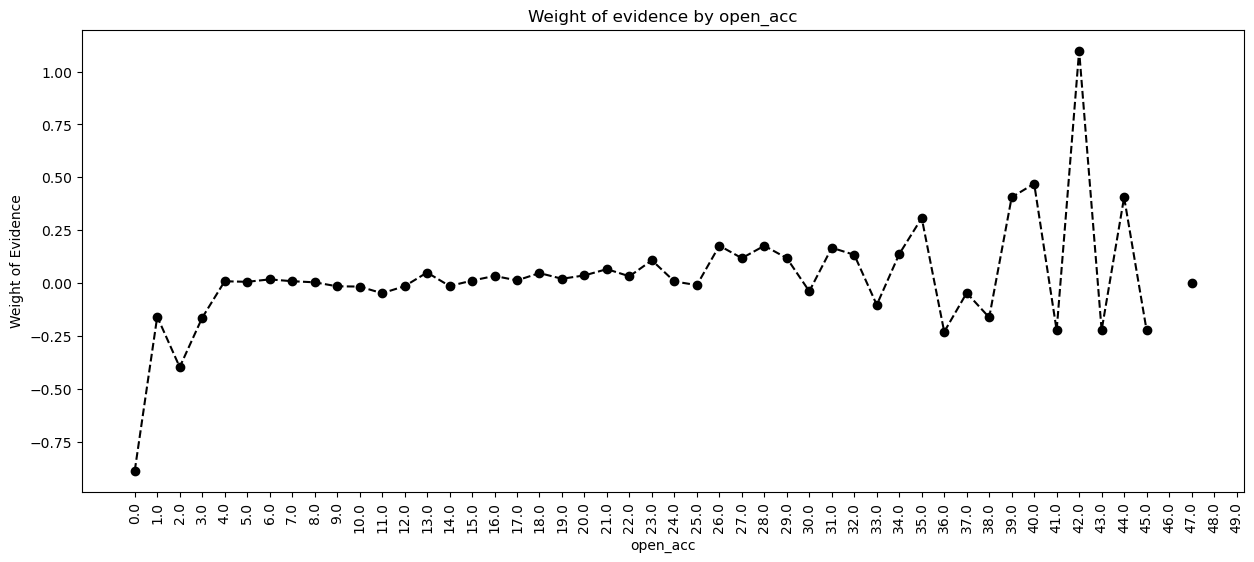

In [188]:
woe_feature = woe_continuous(df_inputs_prep, 'open_acc', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

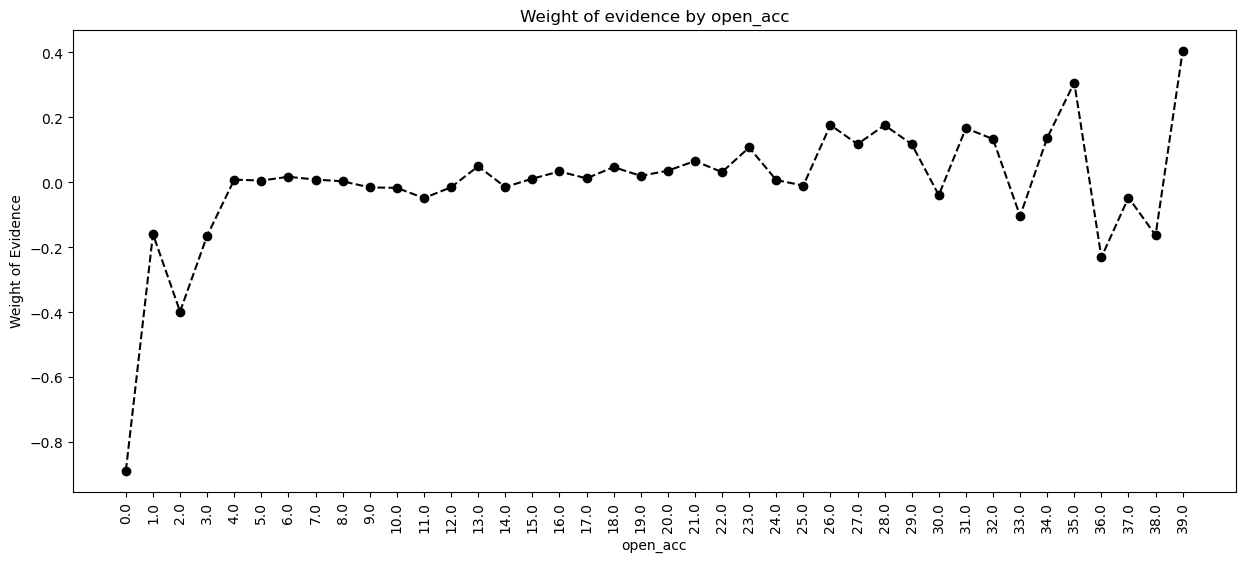

In [189]:
plot_by_woe(woe_feature.iloc[ :40, : ], rot_x_label = 90)

After binning
['open_acc_17_22' 'open_acc_12_17' 'open_acc_3_12' 'open_acc_0_3'
 'open_acc_25_30' 'open_acc_22_25' 'open_acc_>30' 'open_acc_0']


open_acc_class   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0      open_acc_0      29      7      22   0.00017      7e-05  -0.8873   
1    open_acc_0_3    5944    792    5152   0.01942    0.01551 -0.22482   
2   open_acc_3_12  243796  26851  216945   0.65847    0.65296  -0.0084   
3  open_acc_12_17   84142   9036   75106   0.22159    0.22605  0.01993   
4  open_acc_17_22   28221   2978   25243   0.07303    0.07598   0.0396   
5  open_acc_22_25    6051    636    5415    0.0156     0.0163  0.04389   
6    open_acc_>30    1432    145    1287   0.00356    0.00387  0.08349   
7  open_acc_25_30    3413    333    3080   0.00817    0.00927  0.12631   

   IV_class  IV_feature  
0     9e-05     0.00143  
1   0.00088     0.00143  
2     5e-05     0.00143  
3     9e-05     0.00143  
4   0.00012     0.00143  
5     3e-05     0.00143  
6     3e-05     0.00143  
7   0.00014     0.00143

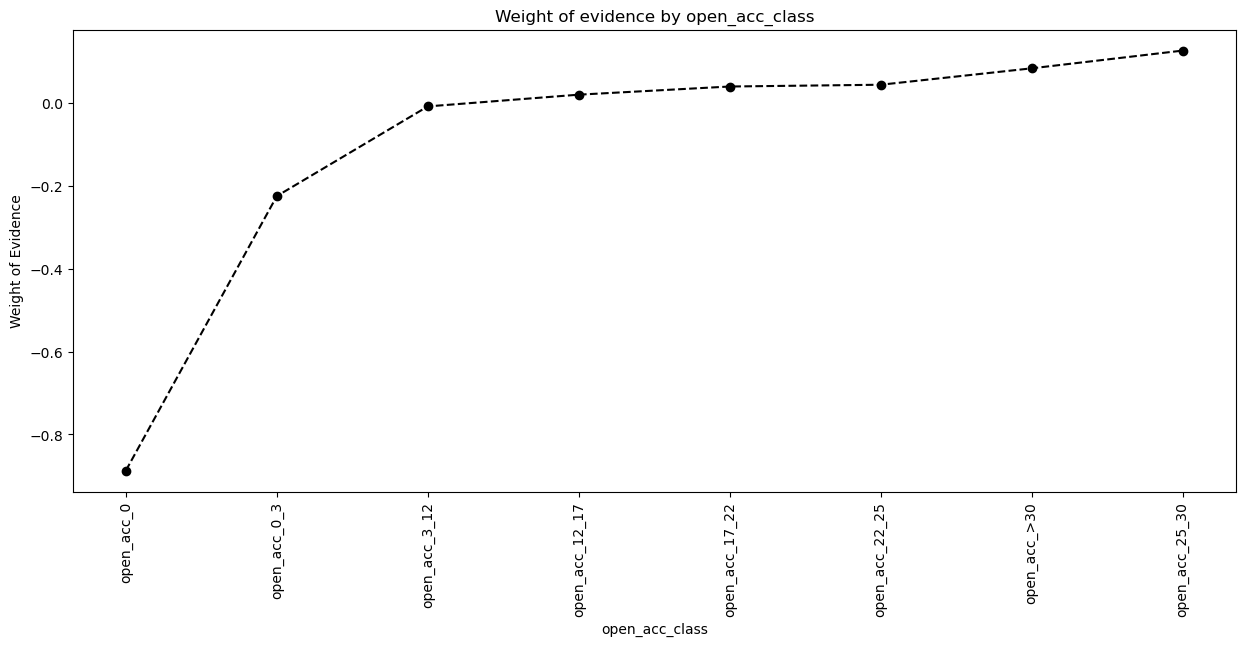

In [190]:
df_open_acc = pd.DataFrame(columns = ['open_acc'])
df_open_acc['open_acc'] = df_inputs_prep['open_acc']

conditions = [
              (df_open_acc['open_acc'] == 0),
              (df_open_acc['open_acc'] > 0) & (df_open_acc['open_acc'] <= 3),
              (df_open_acc['open_acc'] > 3) & (df_open_acc['open_acc'] <= 12),
              (df_open_acc['open_acc'] > 12) & (df_open_acc['open_acc'] <= 17),
              (df_open_acc['open_acc'] > 17) & (df_open_acc['open_acc'] <= 22),
              (df_open_acc['open_acc'] > 22) & (df_open_acc['open_acc'] <= 25),
              (df_open_acc['open_acc'] > 25) & (df_open_acc['open_acc'] <= 30),
              (df_open_acc['open_acc'] > 30)
             ]

# create a list of the values we want to assign for each condition
values = ['open_acc_0', 'open_acc_0_3', 'open_acc_3_12', 'open_acc_12_17', 'open_acc_17_22', 'open_acc_22_25', 'open_acc_25_30',
          'open_acc_>30']

# create a new column and use np.select to assign values to it using our lists as arguments
df_open_acc['open_acc_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_open_acc['open_acc_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_open_acc['open_acc_class']], axis =1)
woe_feature = woe_discrete(df_inputs_prep, 'open_acc_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.5 Feature: Public Record__

***Feature Name:** pub_rec <br>**Definition:** Number of derogatory public records.*


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


pub_rec   n_obs  n_bad  n_good  prop_bad  prop_good      woe  IV_class  \
0       0.0  323999  35659  288340   0.87447    0.86784 -0.00761     5e-05   
1       1.0   42381   4517   37864   0.11077    0.11396  0.02839     9e-05   
2       2.0    4527    438    4089   0.01074    0.01231  0.13644   0.00021   
3       3.0    1280    102    1178    0.0025    0.00355  0.35066   0.00037   
4       4.0     408     31     377   0.00076    0.00113  0.39665   0.00015   
5       5.0     203     18     185   0.00044    0.00056  0.24116     3e-05   
6       6.0     117      8     109    0.0002    0.00033  0.50078     7e-05   
7       7.0      48      2      46     5e-05    0.00014  1.02962     9e-05   
8       8.0      24      0      24       0.0      7e-05      inf       inf   
9       9.0      14      3      11     7e-05      3e-05  -0.8473     3e-05   
10     10.0      10      0      10       0.0      3e-05      inf       inf   
11     11.0       3      0       3       0.0      1e-05      inf       inf   
12     12.0       1      0       1       0.0        0.0      NaN       NaN   
13     13.0       2      0       2       0.0      1e-05      inf       inf   
14     15.0       1      0       1       0.0        0.0      NaN       NaN   
15     16.0       1      0       1       0.0        0.0      NaN       NaN   
16     17.0       1      0       1       0.0        0.0      NaN       NaN   
17     18.0       2      0       2       0.0      1e-05      inf       inf   
18     19.0       1      0       1       0.0        0.0      NaN       NaN   
19     21.0       1      0       1       0.0        0.0      NaN       NaN   
20     34.0       1      0       1       0.0        0.0      NaN       NaN   
21     40.0       1      0       1       0.0        0.0      NaN       NaN   
22     54.0       1      0       1       0.0        0.0      NaN       NaN   
23     63.0       1      0       1       0.0        0.0      NaN       NaN   

    IV_feature  
0          inf  
1          inf  
2          inf  
3          inf  
4          inf  
5          inf  
6          inf  
7          inf  
8          inf  
9          inf  
10         inf  
11         inf  
12         inf  
13         inf  
14         inf  
15         inf  
16         inf  
17         inf  
18         inf  
19         inf  
20         inf  
21         inf  
22         inf  
23         inf

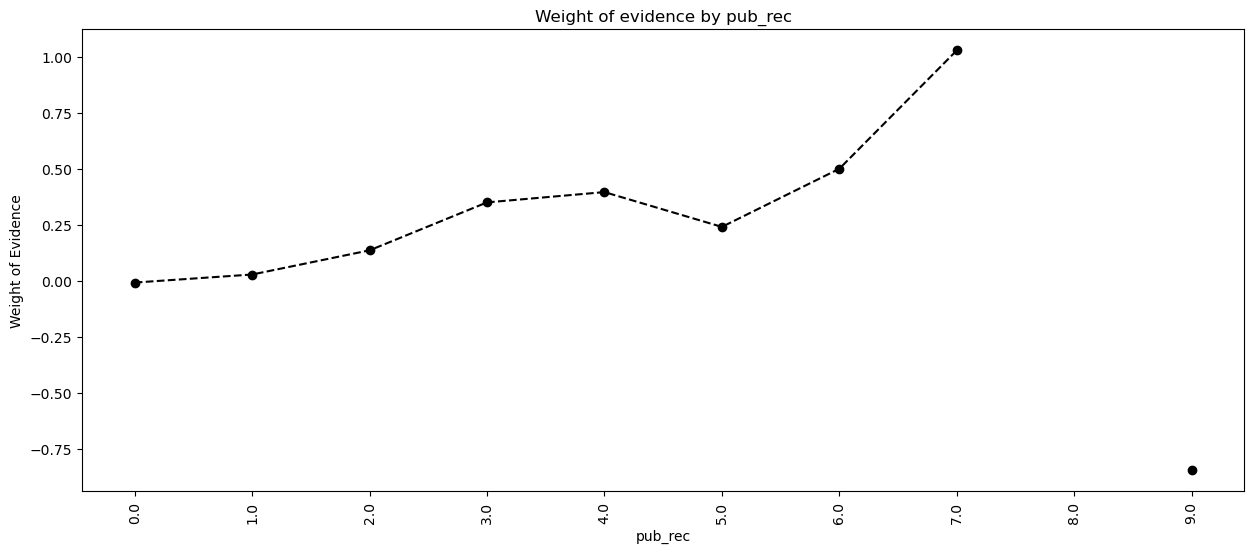

In [193]:
woe_feature = woe_continuous(df_inputs_prep, 'pub_rec', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

After binning
['pub_rec_0_2' 'pub_rec_2_4' 'pub_rec_>4']


pub_rec_class   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0   pub_rec_0_2  370907  40614  330293   0.99598    0.99411 -0.00188   
1   pub_rec_2_4    1688    133    1555   0.00326    0.00468  0.36157   
2    pub_rec_>4     433     31     402   0.00076    0.00121  0.46506   

   IV_class  IV_feature  
0       0.0     0.00072  
1   0.00051     0.00072  
2   0.00021     0.00072

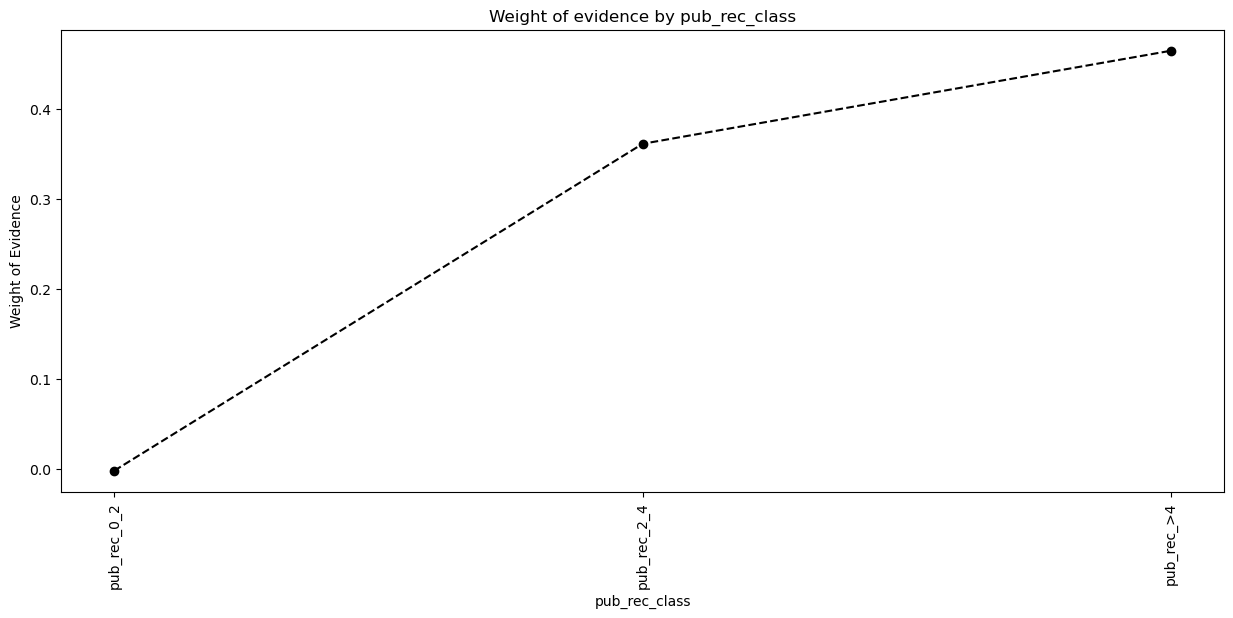

In [194]:
df_pub_rec = pd.DataFrame(columns = ['pub_rec'])
df_pub_rec['pub_rec'] = df_inputs_prep['pub_rec']

conditions = [
              (df_pub_rec['pub_rec'] >= 0) & (df_pub_rec['pub_rec'] <= 2),
              (df_pub_rec['pub_rec'] > 2) & (df_pub_rec['pub_rec'] <= 4),
              (df_pub_rec['pub_rec'] > 4)
             ]

# create a list of the values we want to assign for each condition
values = ['pub_rec_0_2', 'pub_rec_2_4', 'pub_rec_>4']

# create a new column and use np.select to assign values to it using our lists as arguments
df_pub_rec['pub_rec_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_pub_rec['pub_rec_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_pub_rec['pub_rec_class']], axis =1)
woe_feature = woe_discrete(df_inputs_prep, 'pub_rec_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.6 Feature: Total Number of Accounts__

***Feature Name:** total_acc <br>**Definition:** The total number of credit lines currently in the borrower's credit file.*

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_acc_factor  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0      (-0.15, 3.0]    459     87     372   0.00213    0.00112 -0.64279   
1        (3.0, 6.0]   6004    812    5192   0.01991    0.01563 -0.24203   
2        (6.0, 9.0]  15047   1909   13138   0.04681    0.03954 -0.16878   
3       (9.0, 12.0]  25169   2988   22181   0.07327    0.06676 -0.09305   
4      (12.0, 15.0]  33651   3995   29656   0.09797    0.08926 -0.09311   
5      (15.0, 18.0]  38711   4364   34347   0.10702    0.10338  -0.0346   
6      (18.0, 21.0]  40599   4622   35977   0.11335    0.10828 -0.04576   
7      (21.0, 24.0]  40163   4358   35805   0.10687    0.10777  0.00839   
8      (24.0, 27.0]  36286   3794   32492   0.09304    0.09779  0.04979   
9      (27.0, 30.0]  31775   3206   28569   0.07862    0.08599   0.0896   
10     (30.0, 33.0]  25900   2722   23178   0.06675    0.06976  0.04411   
11     (33.0, 36.0]  20748   2090   18658   0.05125    0.05616  0.09149   
12     (36.0, 39.0]  16055   1578   14477    0.0387    0.04357  0.11853   
13     (39.0, 42.0]  12134   1199   10935    0.0294    0.03291  0.11278   
14     (42.0, 45.0]   9107    942    8165    0.0231    0.02457  0.06169   
15     (45.0, 48.0]   6494    682    5812   0.01672    0.01749  0.04502   
16     (48.0, 51.0]   4551    453    4098   0.01111    0.01233  0.10419   
17     (51.0, 54.0]   3260    296    2964   0.00726    0.00892  0.20592   
18     (54.0, 57.0]   2146    206    1940   0.00505    0.00584  0.14534   
19     (57.0, 60.0]   1605    169    1436   0.00414    0.00432  0.04256   
20     (60.0, 63.0]   2164    219    1945   0.00537    0.00585  0.08561   
21     (63.0, 66.0]    317     27     290   0.00066    0.00087  0.27625   
22     (66.0, 69.0]    218     18     200   0.00044     0.0006  0.31015   
23     (69.0, 72.0]    120      9     111   0.00022    0.00033  0.40547   
24     (72.0, 75.0]    114     13     101   0.00032     0.0003 -0.06454   
25     (75.0, 78.0]     64      6      58   0.00015    0.00017  0.12516   
26     (78.0, 81.0]     52      5      47   0.00012    0.00014  0.15415   
27     (81.0, 84.0]     25      3      22     7e-05      7e-05      0.0   
28     (84.0, 87.0]     28      1      27     2e-05      8e-05  1.38629   
29     (87.0, 90.0]     22      2      20     5e-05      6e-05  0.18232   
30     (90.0, 93.0]     12      1      11     2e-05      3e-05  0.40547   
31     (93.0, 96.0]      8      1       7     2e-05      2e-05      0.0   
32     (96.0, 99.0]      4      1       3     2e-05      1e-05 -0.69315   
33    (99.0, 102.0]      4      0       4       0.0      1e-05      inf   
34   (102.0, 105.0]      4      0       4       0.0      1e-05      inf   
35   (105.0, 108.0]      1      0       1       0.0        0.0      NaN   
36   (108.0, 111.0]      0      0       0       0.0        0.0      NaN   
37   (111.0, 114.0]      0      0       0       0.0        0.0      NaN   
38   (114.0, 117.0]      2      0       2       0.0      1e-05      inf   
39   (117.0, 120.0]      2      0       2       0.0      1e-05      inf   
40   (120.0, 123.0]      1      0       1       0.0        0.0      NaN   
41   (123.0, 126.0]      1      0       1       0.0        0.0      NaN   
42   (126.0, 129.0]      0      0       0       0.0        0.0      NaN   
43   (129.0, 132.0]      0      0       0       0.0        0.0      NaN   
44   (132.0, 135.0]      0      0       0       0.0        0.0      NaN   
45   (135.0, 138.0]      0      0       0       0.0        0.0      NaN   
46   (138.0, 141.0]      0      0       0       0.0        0.0      NaN   
47   (141.0, 144.0]      0      0       0       0.0        0.0      NaN   
48   (144.0, 147.0]      0      0       0       0.0        0.0      NaN   
49   (147.0, 150.0]      1      0       1       0.0        0.0      NaN   

    IV_class  IV_feature  
0    0.00065         inf  
1    0.00104         inf  
2    0.00123         inf  
3    0.00061         inf  
4    0.00081         inf  
5    0.00013   

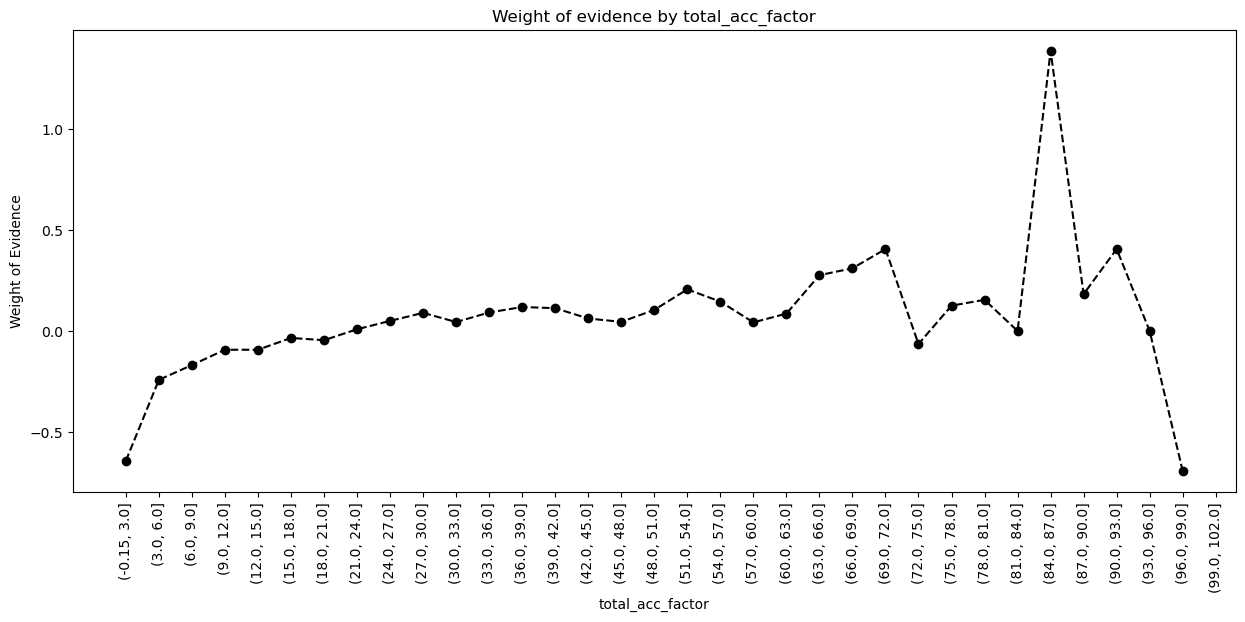

In [197]:
df_inputs_prep['total_acc_factor'] = pd.cut(df_inputs_prep['total_acc'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'total_acc_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

After binning
['total_acc_27_51' 'total_acc_<=27' 'total_acc_>51']


total_acc_class   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0   total_acc_<=27  236089  26929  209160   0.66038    0.62953 -0.04784   
1  total_acc_27_51  126764  12872  113892   0.31566    0.34279  0.08245   
2    total_acc_>51   10175    977    9198   0.02396    0.02768  0.14432   

   IV_class  IV_feature  
0   0.00148     0.00426  
1   0.00224     0.00426  
2   0.00054     0.00426

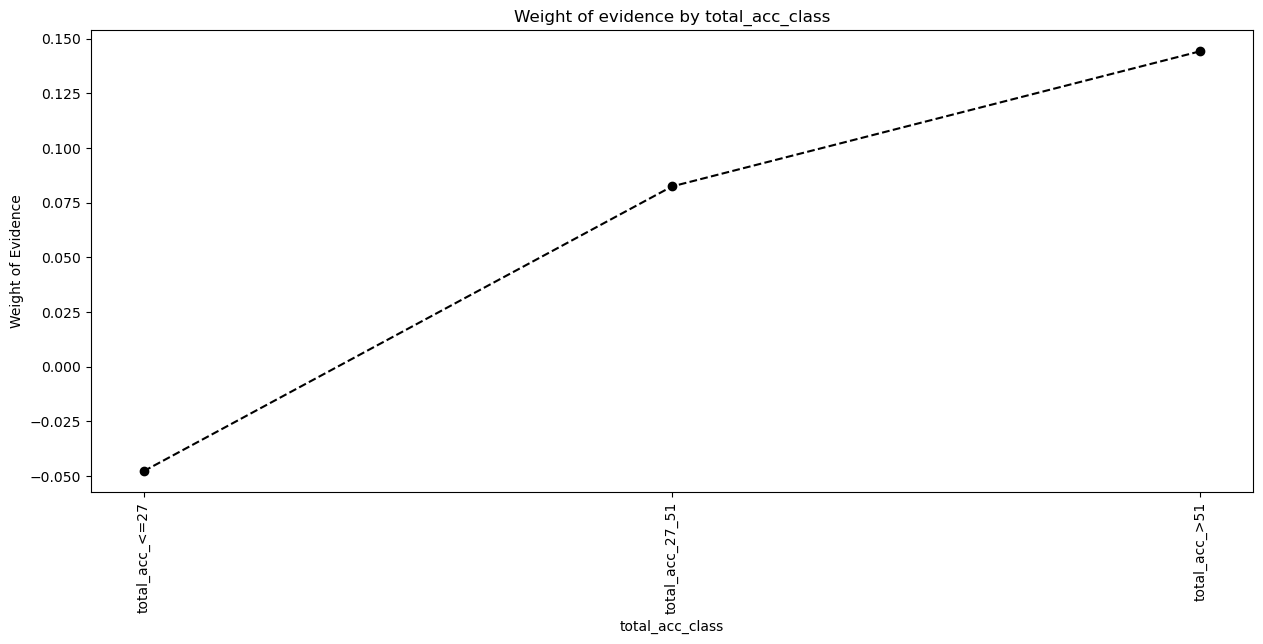

In [198]:
df_total_acc = pd.DataFrame(columns = ['total_acc'])
df_total_acc['total_acc'] = df_inputs_prep['total_acc']

conditions = [
              (df_total_acc['total_acc'] <= 27),
              (df_total_acc['total_acc'] > 27) & (df_total_acc['total_acc'] <= 51),
              (df_total_acc['total_acc'] > 51)
             ]

# create a list of the values we want to assign for each condition
values = ['total_acc_<=27', 'total_acc_27_51', 'total_acc_>51']

# create a new column and use np.select to assign values to it using our lists as arguments
df_total_acc['total_acc_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_total_acc['total_acc_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_total_acc['total_acc_class']], axis =1)
df_inputs_prep = df_inputs_prep.drop('total_acc_factor', axis=1)
woe_feature = woe_discrete(df_inputs_prep, 'total_acc_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.7 Feature: Delinquent Accounts__

***Feature Name:** acc_now_delinq <br>**Definition:** The number of accounts on which the borrower is now delinquent.*

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


acc_now_delinq   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0             0.0  371682  40644  331038   0.99671    0.99635 -0.00036   
1             1.0    1263    127    1136   0.00311    0.00342  0.09502   
2             2.0      70      5      65   0.00012     0.0002  0.51083   
3             3.0       7      1       6     2e-05      2e-05      0.0   
4             4.0       4      0       4       0.0      1e-05      inf   
5             5.0       2      1       1     2e-05        0.0     -inf   

   IV_class  IV_feature  
0       0.0         inf  
1     3e-05         inf  
2     4e-05         inf  
3       0.0         inf  
4       inf         inf  
5       inf         inf

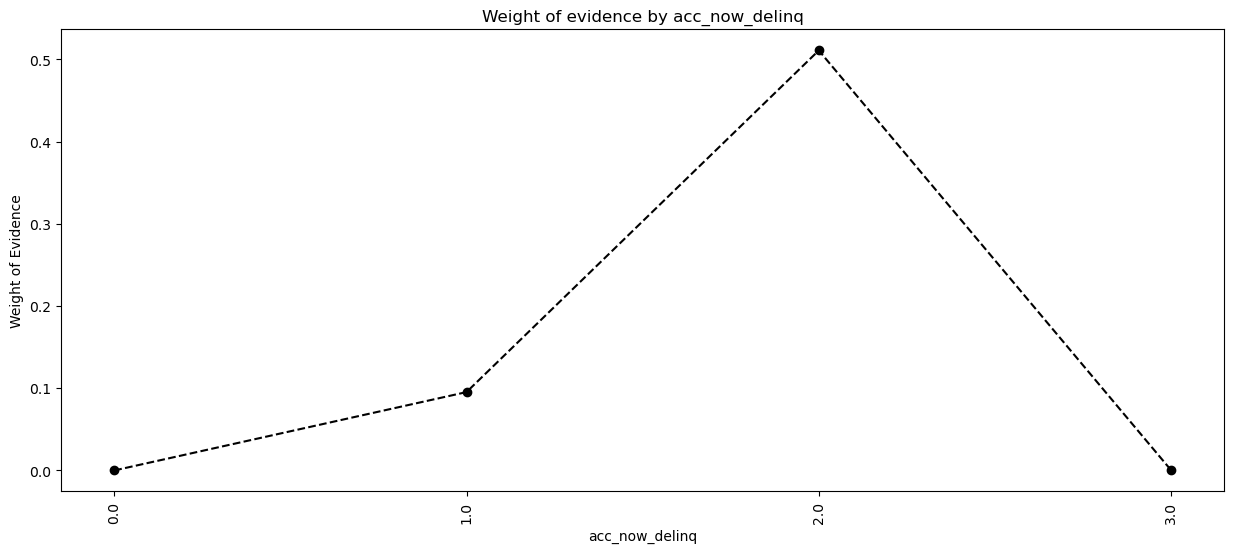

In [201]:
woe_feature = woe_continuous(df_inputs_prep, 'acc_now_delinq', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

After binning
['acc_now_delinq_0' 'acc_now_delinq_>1']


acc_now_delinq_class   n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0     acc_now_delinq_0  371682  40644  331038   0.99671    0.99635 -0.00036   
1    acc_now_delinq_>1    1346    134    1212   0.00329    0.00365  0.10384   

   IV_class  IV_feature  
0       0.0       4e-05  
1     4e-05       4e-05

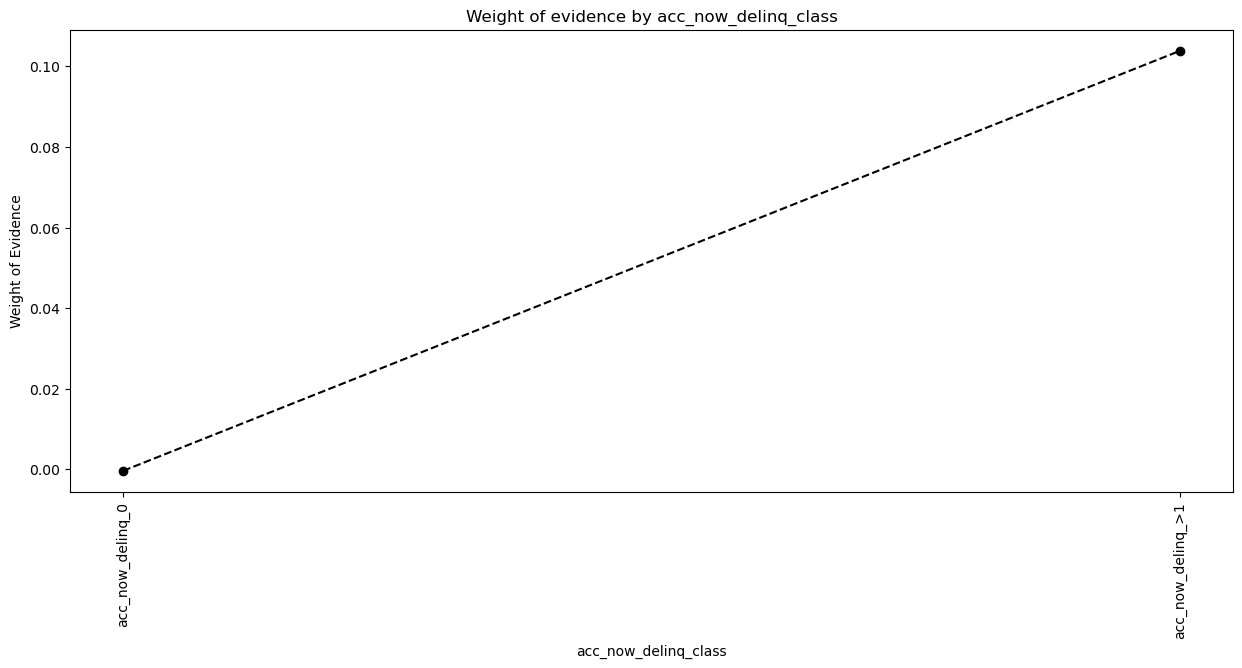

In [202]:
df_acc_now_delinq = pd.DataFrame(columns = ['acc_now_delinq'])
df_acc_now_delinq['acc_now_delinq'] = df_inputs_prep['acc_now_delinq']

conditions = [
              (df_acc_now_delinq['acc_now_delinq'] ==0),
              (df_acc_now_delinq['acc_now_delinq'] >= 1)
             ]

# create a list of the values we want to assign for each condition
values = ['acc_now_delinq_0', 'acc_now_delinq_>1']

# create a new column and use np.select to assign values to it using our lists as arguments
df_acc_now_delinq['acc_now_delinq_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_acc_now_delinq['acc_now_delinq_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_acc_now_delinq['acc_now_delinq_class']], axis =1)
woe_feature = woe_discrete(df_inputs_prep, 'acc_now_delinq_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.8 Feature: Revolving Limit__

***Feature Name:** total_rev_hi_lim <br>**Definition:** Total revolving high credit/credit limit.*

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  n_bad  n_good  prop_bad  prop_good  \
0            (-9999.999, 5000.0]  19417   2593   16824   0.06359    0.05064   
1             (5000.0, 9999.999]  52655   6519   46136   0.15987    0.13886   
2          (9999.999, 14999.998]  59570   7126   52444   0.17475    0.15784   
3         (14999.998, 19999.998]  51455   6299   45156   0.15447    0.13591   
4         (19999.998, 24999.997]  41582   4749   36833   0.11646    0.11086   
...                          ...    ...    ...     ...       ...        ...   
1995  (9974999.002, 9979999.002]      0      0       0       0.0        0.0   
1996  (9979999.002, 9984999.002]      0      0       0       0.0        0.0   
1997  (9984999.002, 9989999.001]      0      0       0       0.0        0.0   
1998    (9989999.001, 9994999.0]      0      0       0       0.0        0.0   
1999      (9994999.0, 9999999.0]      2      0       2       0.0      1e-05   

          woe  IV_class  IV_feature  
0    -0.22771   0.00295         inf  
1    -0.14089   0.00296         inf  
2    -0.10177   0.00172         inf  
3    -0.12801   0.00238         inf  
4    -0.04928   0.00028         inf  
...       ...       ...         ...  
1995      NaN       NaN         inf  
1996      NaN       NaN         inf  
1997      NaN       NaN         inf  
1998      NaN       NaN         inf  
1999      inf       inf         inf  

[2000 rows x 9 columns]

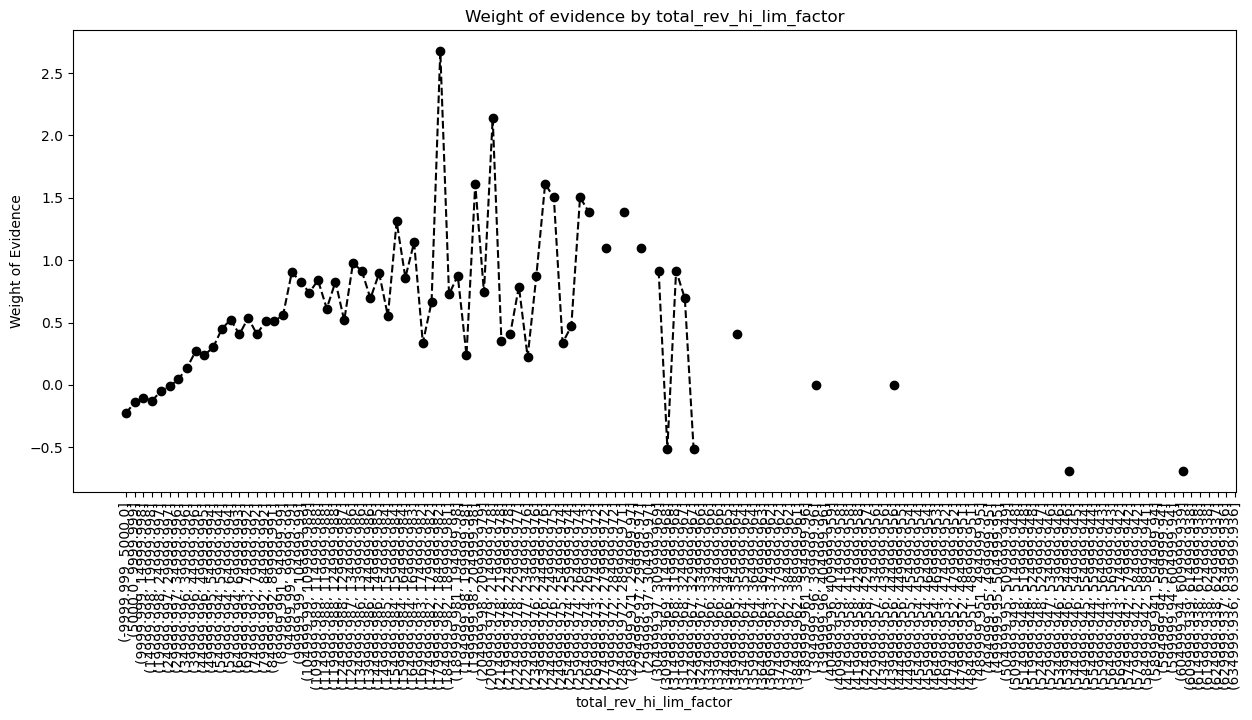

In [205]:
df_inputs_prep['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prep['total_rev_hi_lim'], 2000)
woe_feature = woe_continuous(df_inputs_prep, 'total_rev_hi_lim_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

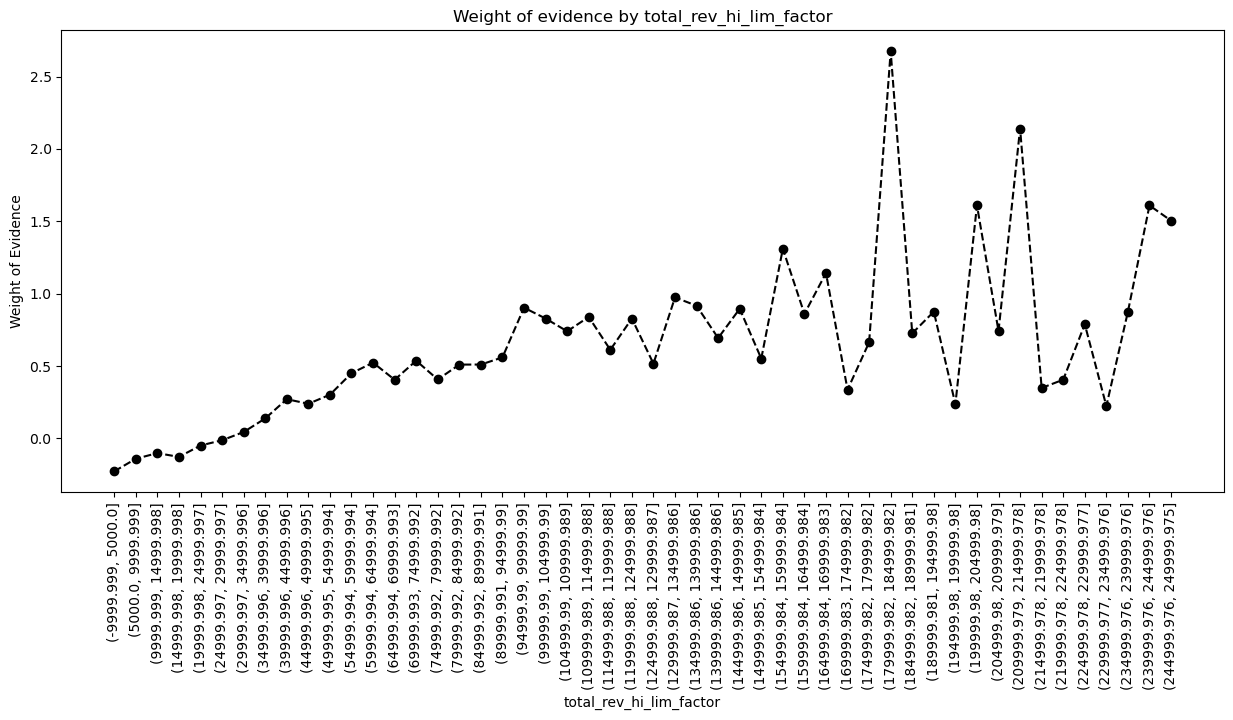

In [206]:
plot_by_woe(woe_feature.iloc[: 50, : ], 90)

After binning
['total_rev_hi_lim_55K-95K' 'total_rev_hi_lim_5K-10K'
 'total_rev_hi_lim_30K-40K' 'total_rev_hi_lim_10K-20K'
 'total_rev_hi_lim_<=5K' 'total_rev_hi_lim_40K-55K'
 'total_rev_hi_lim_20K-30K' 'total_rev_hi_lim_>95K']


total_rev_hi_lim_class   n_obs  n_bad  n_good  prop_bad  prop_good  \
0     total_rev_hi_lim_<=5K   22530   3072   19458   0.07533    0.05856   
1   total_rev_hi_lim_5K-10K   54571   6712   47859    0.1646    0.14405   
2  total_rev_hi_lim_10K-20K  109086  13196   95890   0.32361    0.28861   
3  total_rev_hi_lim_20K-30K   71835   8030   63805   0.19692    0.19204   
4  total_rev_hi_lim_30K-40K   43383   4335   39048   0.10631    0.11753   
5  total_rev_hi_lim_40K-55K   35101   3017   32084   0.07399    0.09657   
6  total_rev_hi_lim_55K-95K   27582   1953   25629   0.04789    0.07714   
7     total_rev_hi_lim_>95K    8940    463    8477   0.01135    0.02551   

       woe  IV_class  IV_feature  
0 -0.25183   0.00422     0.04364  
1 -0.13336   0.00274     0.04364  
2 -0.11446   0.00401     0.04364  
3 -0.02509   0.00012     0.04364  
4  0.10033   0.00113     0.04364  
5  0.26634   0.00601     0.04364  
6  0.47672   0.01394     0.04364  
7  0.80985   0.01147     0.04364

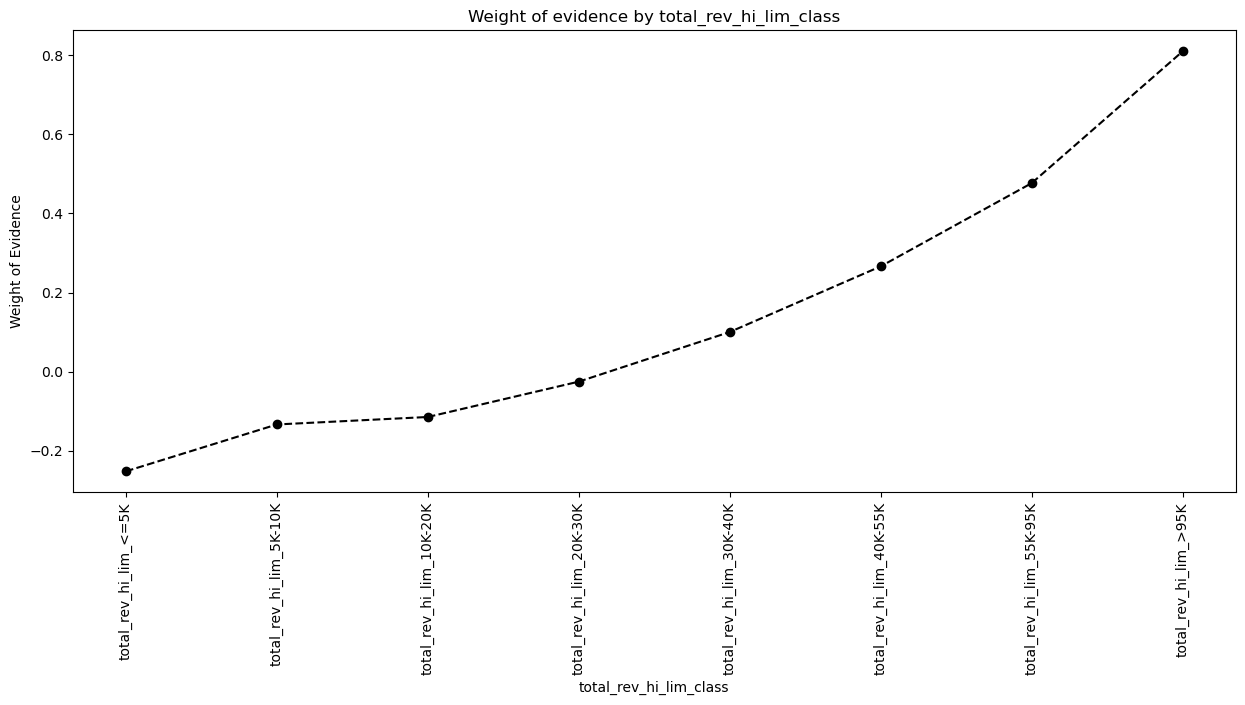

In [207]:
df_total_rev_hi_lim = pd.DataFrame(columns = ['total_rev_hi_lim'])
df_total_rev_hi_lim['total_rev_hi_lim'] = df_inputs_prep['total_rev_hi_lim']

conditions = [
              (df_total_rev_hi_lim['total_rev_hi_lim'] <= 5000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 5000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 10000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 10000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 20000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 20000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 30000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 30000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 40000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 40000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 55000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 55000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 95000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 95000)
             ]

# create a list of the values we want to assign for each condition
values = ['total_rev_hi_lim_<=5K', 'total_rev_hi_lim_5K-10K', 'total_rev_hi_lim_10K-20K', 'total_rev_hi_lim_20K-30K',
          'total_rev_hi_lim_30K-40K', 'total_rev_hi_lim_40K-55K', 'total_rev_hi_lim_55K-95K', 'total_rev_hi_lim_>95K']

# create a new column and use np.select to assign values to it using our lists as arguments
df_total_rev_hi_lim['total_rev_hi_lim_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_total_rev_hi_lim['total_rev_hi_lim_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_total_rev_hi_lim['total_rev_hi_lim_class']], axis =1)
df_inputs_prep = df_inputs_prep.drop('total_rev_hi_lim_factor', axis=1)

woe_feature = woe_discrete(df_inputs_prep, 'total_rev_hi_lim_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.9 Feature: Installment Amount__

***Feature Name:** installment <br>**Definition:** The monthly payment owed by the borrower if the loan originates.*

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),


installment_factor  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0       (14.276, 43.556]   1812    170    1642   0.00417    0.00494  0.16945   
1       (43.556, 71.443]   4841    496    4345   0.01216    0.01308  0.07293   
2       (71.443, 99.329]   6824    730    6094    0.0179    0.01834  0.02428   
3      (99.329, 127.216]   9138   1002    8136   0.02457    0.02449 -0.00326   
4     (127.216, 155.102]  10040   1039    9001   0.02548    0.02709  0.06127   
5     (155.102, 182.988]  16816   1779   15037   0.04363    0.04526  0.03668   
6     (182.988, 210.875]  17216   1639   15577   0.04019    0.04688  0.15397   
7     (210.875, 238.761]  15090   1503   13587   0.03686    0.04089  0.10376   
8     (238.761, 266.648]  18842   1858   16984   0.04556    0.05112  0.11515   
9     (266.648, 294.534]  20100   2189   17911   0.05368    0.05391  0.00428   
10     (294.534, 322.42]  20364   2114   18250   0.05184    0.05493   0.0579   
11     (322.42, 350.307]  25521   2822   22699    0.0692    0.06832  -0.0128   
12    (350.307, 378.193]  19006   2184   16822   0.05356    0.05063 -0.05626   
13     (378.193, 406.08]  18079   1911   16168   0.04686    0.04866  0.03769   
14     (406.08, 433.966]  13345   1612   11733   0.03953    0.03531 -0.11289   
15    (433.966, 461.852]  12574   1469   11105   0.03602    0.03342 -0.07492   
16    (461.852, 489.739]  15685   1673   14012   0.04103    0.04217  0.02741   
17    (489.739, 517.625]  15648   1691   13957   0.04147    0.04201  0.01294   
18    (517.625, 545.512]  10775   1469    9306   0.03602    0.02801 -0.25151   
19    (545.512, 573.398]  10558   1287    9271   0.03156     0.0279 -0.12326   
20    (573.398, 601.284]   9464   1140    8324   0.02796    0.02505  -0.1099   
21    (601.284, 629.171]   9341    882    8459   0.02163    0.02546  0.16303   
22    (629.171, 657.057]   8357    856    7501   0.02099    0.02258  0.07302   
23    (657.057, 684.944]   9171    998    8173   0.02447     0.0246   0.0053   
24     (684.944, 712.83]   6171    751    5420   0.01842    0.01631 -0.12166   
25     (712.83, 740.716]   4841    562    4279   0.01378    0.01288 -0.06754   
26    (740.716, 768.603]   5231    552    4679   0.01354    0.01408  0.03911   
27    (768.603, 796.489]   4926    477    4449    0.0117    0.01339  0.13492   
28    (796.489, 824.376]   4050    448    3602   0.01099    0.01084 -0.01374   
29    (824.376, 852.262]   3643    410    3233   0.01005    0.00973 -0.03236   
30    (852.262, 880.148]   4260    456    3804   0.01118    0.01145  0.02386   
31    (880.148, 908.035]   3247    421    2826   0.01032    0.00851 -0.19284   
32    (908.035, 935.921]   2189    276    1913   0.00677    0.00576 -0.16156   
33    (935.921, 963.808]   2440    301    2139   0.00738    0.00644 -0.13625   
34    (963.808, 991.694]   1787    296    1491   0.00726    0.00449 -0.48053   
35    (991.694, 1019.58]   1617    228    1389   0.00559    0.00418 -0.29067   
36   (1019.58, 1047.467]   1267    164    1103   0.00402    0.00332 -0.19132   
37  (1047.467, 1075.353]    898    100     798   0.00245     0.0024 -0.02062   
38   (1075.353, 1103.24]   1035     75     960   0.00184    0.00289  0.45149   
39   (1103.24, 1131.126]    832     66     766   0.00162    0.00231  0.35482   
40  (1131.126, 1159.012]    972     77     895   0.00189    0.00269  0.35296   
41  (1159.012, 1186.899]   1181     97    1084   0.00238    0.00326  0.31463   
42  (1186.899, 1214.785]   1252    124    1128   0.00304     0.0034  0.11192   
43  (1214.785, 1242.672]   1019    111     908   0.00272    0.00273  0.00367   
44  (1242.672, 1270.558]    711    100     611   0.00245    0.00184 -0.28632   
45  (1270.558, 1298.444]    457     78     379   0.00191    0.00114 -0.51607   
46  (1298.444, 1326.331]    197     47     150   0.00115    0.00045 -0.93827   
47  (1326.331, 1354.217]    121     29      92   0.00071    0.00028 -0.93048   
48  (1354.217, 1382.104]     41     12      29   0.00029      9e-05 -1.17007   
49   (

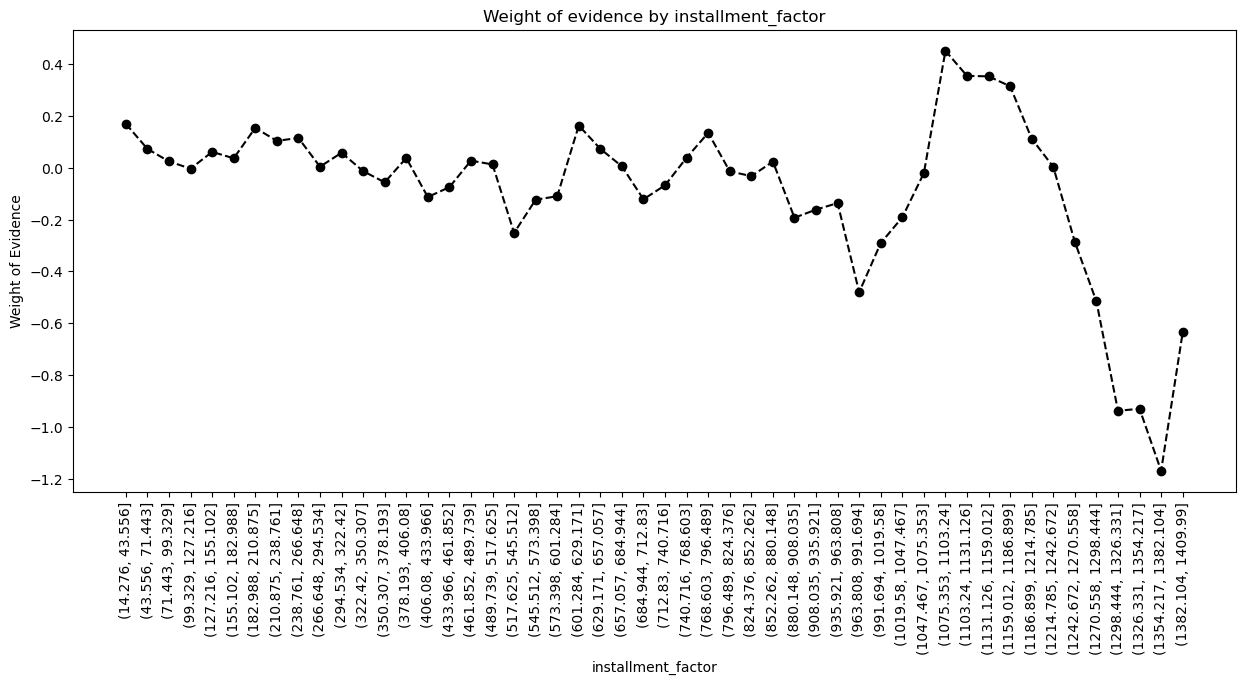

In [210]:
df_inputs_prep['installment_factor'] = pd.cut(df_inputs_prep['installment'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'installment_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

In [211]:
df_inputs_prep = df_inputs_prep.drop('installment_factor', axis=1)

#### __2.3.9 Feature: Annual Income__

***Feature Name:** annual_inc <br>**Definition:** The self-reported annual income provided by the borrower during registration.*

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


annual_inc_factor   n_obs  n_bad  n_good  prop_bad  prop_good  \
0     (-5243.882, 144693.64]  351904  39214  312690   0.96165    0.94113   
1     (144693.64, 287491.28]   19004   1417   17587   0.03475    0.05293   
2     (287491.28, 430288.92]    1525    106    1419    0.0026    0.00427   
3     (430288.92, 573086.56]     332     20     312   0.00049    0.00094   
4      (573086.56, 715884.2]     112     13      99   0.00032     0.0003   
5      (715884.2, 858681.84]      65      7      58   0.00017    0.00017   
6    (858681.84, 1001479.48]      39      1      38     2e-05    0.00011   
7   (1001479.48, 1144277.12]      10      0      10       0.0      3e-05   
8   (1144277.12, 1287074.76]      12      0      12       0.0      4e-05   
9    (1287074.76, 1429872.4]       6      0       6       0.0      2e-05   
10   (1429872.4, 1572670.04]       3      0       3       0.0      1e-05   
11  (1572670.04, 1715467.68]       1      0       1       0.0        0.0   
12  (1715467.68, 1858265.32]       1      0       1       0.0        0.0   
13  (1858265.32, 2001062.96]       6      0       6       0.0      2e-05   
14   (2001062.96, 2143860.6]       1      0       1       0.0        0.0   
15   (2143860.6, 2286658.24]       0      0       0       0.0        0.0   
16  (2286658.24, 2429455.88]       0      0       0       0.0        0.0   
17  (2429455.88, 2572253.52]       0      0       0       0.0        0.0   
18  (2572253.52, 2715051.16]       0      0       0       0.0        0.0   
19   (2715051.16, 2857848.8]       0      0       0       0.0        0.0   
20   (2857848.8, 3000646.44]       0      0       0       0.0        0.0   
21  (3000646.44, 3143444.08]       0      0       0       0.0        0.0   
22  (3143444.08, 3286241.72]       0      0       0       0.0        0.0   
23  (3286241.72, 3429039.36]       0      0       0       0.0        0.0   
24   (3429039.36, 3571837.0]       0      0       0       0.0        0.0   
25   (3571837.0, 3714634.64]       0      0       0       0.0        0.0   
26  (3714634.64, 3857432.28]       0      0       0       0.0        0.0   
27  (3857432.28, 4000229.92]       1      0       1       0.0        0.0   
28  (4000229.92, 4143027.56]       0      0       0       0.0        0.0   
29   (4143027.56, 4285825.2]       0      0       0       0.0        0.0   
30   (4285825.2, 4428622.84]       0      0       0       0.0        0.0   
31  (4428622.84, 4571420.48]       1      0       1       0.0        0.0   
32  (4571420.48, 4714218.12]       0      0       0       0.0        0.0   
33  (4714218.12, 4857015.76]       0      0       0       0.0        0.0   
34   (4857015.76, 4999813.4]       1      0       1       0.0        0.0   
35   (4999813.4, 5142611.04]       1      0       1       0.0        0.0   
36  (5142611.04, 5285408.68]       0      0       0       0.0        0.0   
37  (5285408.68, 5428206.32]       0      0       0       0.0        0.0   
38  (5428206.32, 5571003.96]       0      0       0       0.0        0.0   
39   (5571003.96, 5713801.6]       0      0       0       0.0        0.0   
40   (5713801.6, 5856599.24]       0      0       0       0.0        0.0   
41  (5856599.24, 5999396.88]       0      0       0       0.0        0.0   
42  (5999396.88, 6142194.52]       2      0       2       0.0      1e-05   
43  (6142194.52, 6284992.16]       0      0       0       0.0        0.0   
44   (6284992.16, 6427789.8]       0      0       0       0.0        0.0   
45   (6427789.8, 6570587.44]       0      0       0       0.0        0.0   
46  (6570587.44, 6713385.08]       0      0       0       0.0        0.0   
47  (6713385.08, 6856182.72]       0      0       0       0.0        0.0   
48  (6856182.72, 6998980.36]       0      0       0       0.0        0.0   
49   (6998980.36, 7141778.0]       1      0       1       0.0        0.0   

        woe  IV_class  IV_feature  
0  -0.02157   0.00044         inf  
1   0.42079   0.00765         inf  
2    0.4961   0.00083     

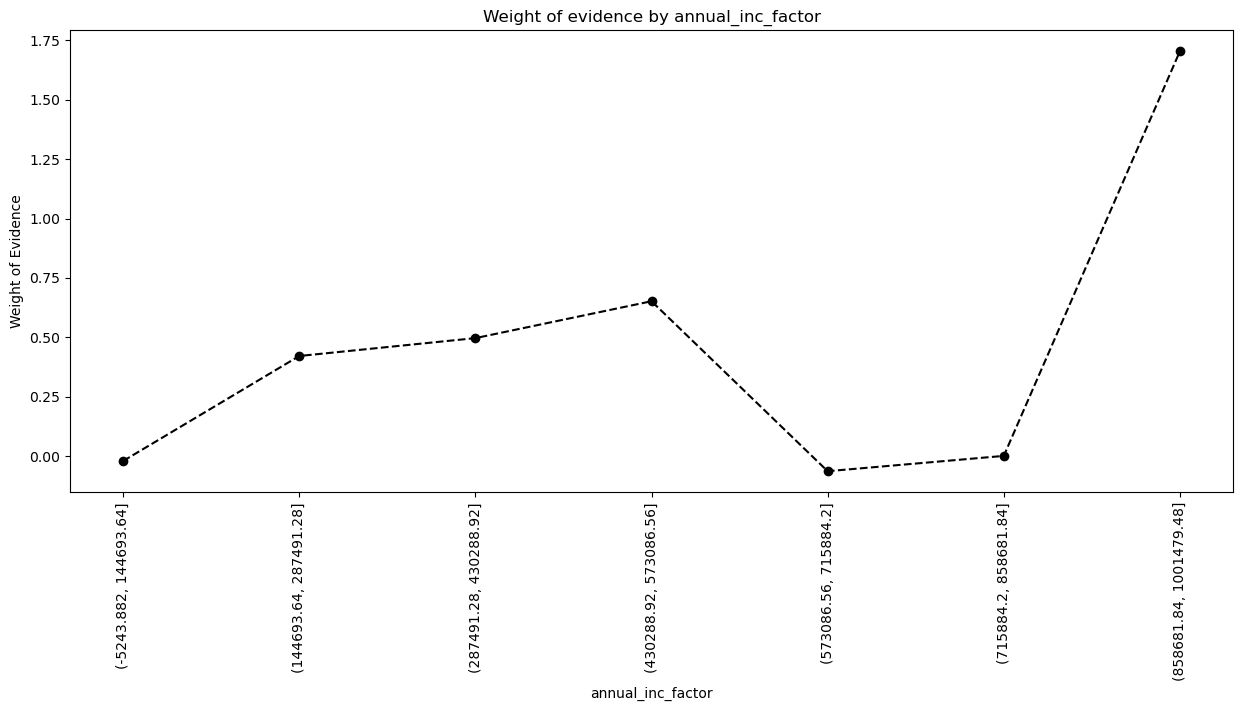

In [214]:
df_inputs_prep['annual_inc_factor'] = pd.cut(df_inputs_prep['annual_inc'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'annual_inc_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


annual_inc_factor   n_obs  n_bad  n_good  prop_bad  prop_good  \
0      (-5243.882, 73294.82]  231445  28722  202723   0.70435    0.61015   
1      (73294.82, 144693.64]  120459  10492  109967    0.2573    0.33098   
2     (144693.64, 216092.46]   15885   1190   14695   0.02918    0.04423   
3     (216092.46, 287491.28]    3119    227    2892   0.00557     0.0087   
4      (287491.28, 358890.1]    1117     79    1038   0.00194    0.00312   
..                       ...     ...    ...     ...       ...        ...   
95   (6784783.9, 6856182.72]       0      0       0       0.0        0.0   
96  (6856182.72, 6927581.54]       0      0       0       0.0        0.0   
97  (6927581.54, 6998980.36]       0      0       0       0.0        0.0   
98  (6998980.36, 7070379.18]       0      0       0       0.0        0.0   
99   (7070379.18, 7141778.0]       1      0       1       0.0        0.0   

        woe  IV_class  IV_feature  
0  -0.14357   0.01352         inf  
1   0.25182   0.01855         inf  
2   0.41592   0.00626         inf  
3   0.44593    0.0014         inf  
4   0.47515   0.00056         inf  
..      ...       ...         ...  
95      NaN       NaN         inf  
96      NaN       NaN         inf  
97      NaN       NaN         inf  
98      NaN       NaN         inf  
99      NaN       NaN         inf  

[100 rows x 9 columns]

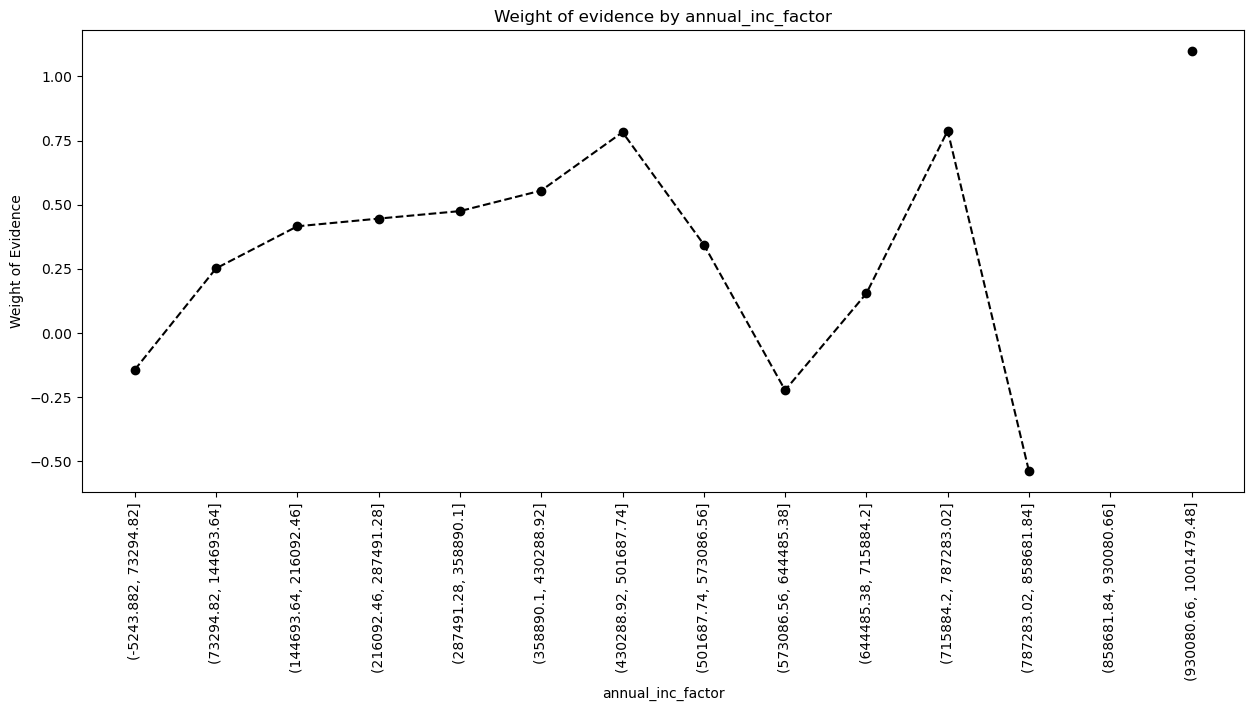

In [215]:
df_inputs_prep['annual_inc_factor'] = pd.cut(df_inputs_prep['annual_inc'], 100)
woe_feature = woe_continuous(df_inputs_prep, 'annual_inc_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

In [216]:
df_inputs_prep_temp = df_inputs_prep.loc[df_inputs_prep['annual_inc'] <= 140000, : ]

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/3091276106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prep_temp['annual_inc_factor'] = pd.cut(df_inputs_prep_temp['annual_inc'], 50)
/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),


annual_inc_factor  n_obs  n_bad  n_good  prop_bad  prop_good  \
0      (1757.896, 4658.08]     15      3      12     8e-05      4e-05   
1       (4658.08, 7420.16]     40     10      30   0.00026     0.0001   
2      (7420.16, 10182.24]    287     36     251   0.00092     0.0008   
3     (10182.24, 12944.32]    547     94     453    0.0024    0.00145   
4      (12944.32, 15706.4]   1210    205    1005   0.00524    0.00322   
5      (15706.4, 18468.48]   1522    232    1290   0.00593    0.00414   
6     (18468.48, 21230.56]   2928    423    2505   0.01081    0.00803   
7     (21230.56, 23992.64]   2495    388    2107   0.00991    0.00675   
8     (23992.64, 26754.72]   7016   1062    5954   0.02714    0.01909   
9      (26754.72, 29516.8]   5643    805    4838   0.02057    0.01551   
10     (29516.8, 32278.88]  11915   1674   10241   0.04278    0.03283   
11    (32278.88, 35040.96]  12241   1702   10539   0.04349    0.03379   
12    (35040.96, 37803.04]   7905   1115    6790   0.02849    0.02177   
13    (37803.04, 40565.12]  17910   2392   15518   0.06112    0.04975   
14     (40565.12, 43327.2]  12508   1634   10874   0.04175    0.03486   
15     (43327.2, 46089.28]  16590   2109   14481   0.05389    0.04642   
16    (46089.28, 48851.36]   9878   1210    8668   0.03092    0.02779   
17    (48851.36, 51613.44]  19024   2291   16733   0.05854    0.05364   
18    (51613.44, 54375.52]  12766   1452   11314    0.0371    0.03627   
19     (54375.52, 57137.6]  16153   1825   14328   0.04663    0.04593   
20     (57137.6, 59899.68]   6482    750    5732   0.01916    0.01838   
21    (59899.68, 62661.76]  21299   2528   18771    0.0646    0.06018   
22    (62661.76, 65423.84]  16090   1775   14315   0.04536    0.04589   
23    (65423.84, 68185.92]   7942    812    7130   0.02075    0.02286   
24     (68185.92, 70948.0]  12982   1379   11603   0.03524     0.0372   
25     (70948.0, 73710.08]   8385    850    7535   0.02172    0.02416   
26    (73710.08, 76472.16]  13145   1292   11853   0.03301      0.038   
27    (76472.16, 79234.24]   5679    557    5122   0.01423    0.01642   
28    (79234.24, 81996.32]  11397   1123   10274    0.0287    0.03294   
29     (81996.32, 84758.4]   6063    529    5534   0.01352    0.01774   
30     (84758.4, 87520.48]   9980    906    9074   0.02315    0.02909   
31    (87520.48, 90282.56]  10393    946    9447   0.02417    0.03029   
32    (90282.56, 93044.64]   4337    371    3966   0.00948    0.01271   
33    (93044.64, 95806.72]   5634    479    5155   0.01224    0.01653   
34     (95806.72, 98568.8]   4667    414    4253   0.01058    0.01363   
35    (98568.8, 101330.88]   8793    747    8046   0.01909    0.02579   
36  (101330.88, 104092.96]   3232    259    2973   0.00662    0.00953   
37  (104092.96, 106855.04]   3736    285    3451   0.00728    0.01106   
38  (106855.04, 109617.12]   2277    178    2099   0.00455    0.00673   
39   (109617.12, 112379.2]   5714    482    5232   0.01232    0.01677   
40   (112379.2, 115141.28]   3218    199    3019   0.00508    0.00968   
41  (115141.28, 117903.36]   1128     91    1037   0.00233    0.00332   
42  (117903.36, 120665.44]   6228    539    5689   0.01377    0.01824   
43  (120665.44, 123427.52]   1043     65     978   0.00166    0.00314   
44   (123427.52, 126189.6]   3566    279    3287   0.00713    0.01054   
45   (126189.6, 128951.68]    791     65     726   0.00166    0.00233   
46  (128951.68, 131713.76]   3033    210    2823   0.00537    0.00905   
47  (131713.76, 134475.84]    801     61     740   0.00156    0.00237   
48  (134475.84, 137237.92]   1902    110    1792   0.00281    0.00574   
49   (137237.92, 140000.0]   2532    192    2340   0.00491     0.0075   

        woe  IV_class  IV_feature  
0  -0.69315     3e-05     0.04979  
1  -0.95551   0.00015     0.04979  
2  -0.13976     2e-05     0.04979  
3  -0.50391   0.00048     0.04979  
4  -0.48694   0.00098     0.04979  
5  -0.35933   0.00064     0.04979  
6  -0.29729   0.00083     0.04979

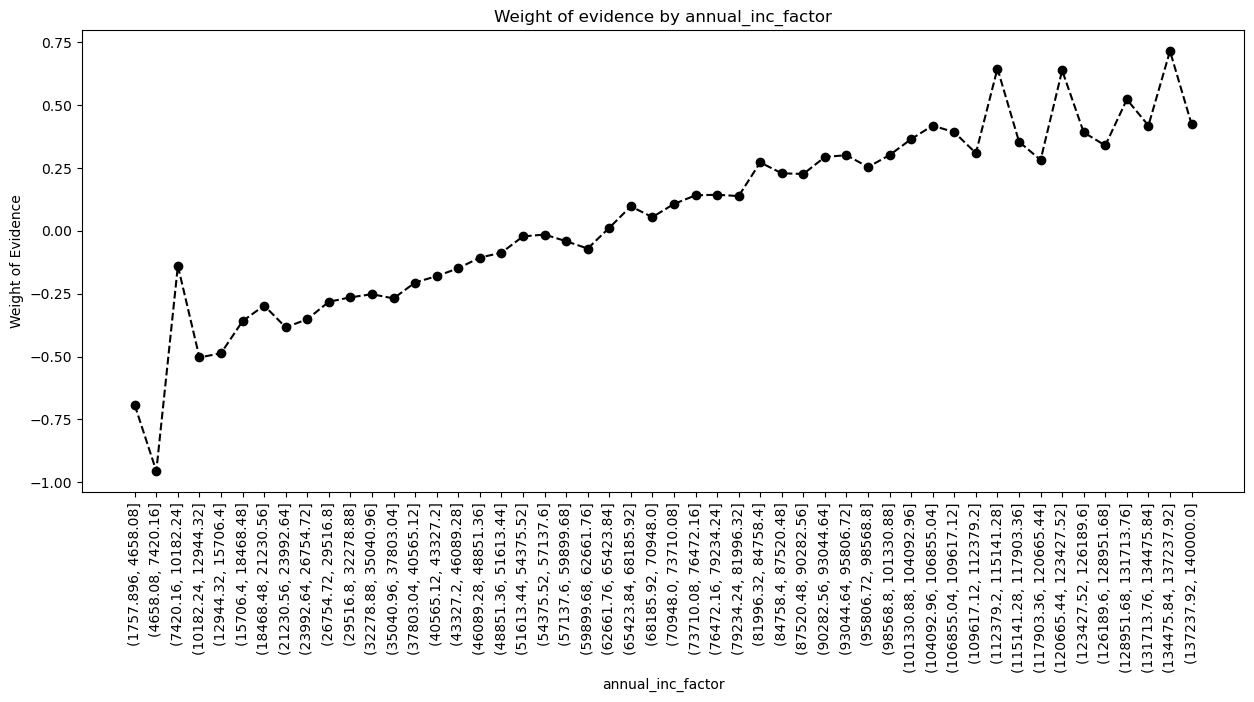

In [217]:
df_inputs_prep_temp['annual_inc_factor'] = pd.cut(df_inputs_prep_temp['annual_inc'], 50)
woe_feature = woe_continuous(df_inputs_prep_temp, 'annual_inc_factor', df_targets_prep[df_inputs_prep_temp.index])
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

After binning
['annual_inc_70K-80K' 'annual_inc_100K-120K' 'annual_inc_80K-90K'
 'annual_inc_40K-50K' 'annual_inc_90K-100K' 'annual_inc_50K-60K'
 'annual_inc_120K-140K' 'annual_inc_30K-40K' 'annual_inc_20K-30K'
 'annual_inc_>140K' 'annual_inc_<20K' 'annual_inc_60K-70K']


annual_inc_class  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0        annual_inc_<20K   5667    863    4804   0.02116    0.01446 -0.38073   
1     annual_inc_20K-30K  22325   3277   19048   0.08036    0.05733 -0.33769   
2     annual_inc_30K-40K  43132   5936   37196   0.14557    0.11195  -0.2626   
3     annual_inc_40K-50K  55044   6910   48134   0.16945    0.14487 -0.15672   
4     annual_inc_50K-60K  53312   6217   47095   0.15246    0.14175 -0.07284   
5     annual_inc_60K-70K  43367   4650   38717   0.11403    0.11653  0.02169   
6     annual_inc_70K-80K  37384   3717   33667   0.09115    0.10133  0.10588   
7     annual_inc_80K-90K  28097   2528   25569   0.06199    0.07696  0.21631   
8    annual_inc_90K-100K  22588   1951   20637   0.04784    0.06211  0.26104   
9   annual_inc_100K-120K  26422   2101   24321   0.05152     0.0732  0.35123   
10      annual_inc_>140K  21966   1643   20323   0.04029    0.06117  0.41755   
11  annual_inc_120K-140K  13724    985   12739   0.02416    0.03834   0.4618   

    IV_class  IV_feature  
0    0.00255     0.05477  
1    0.00778     0.05477  
2    0.00883     0.05477  
3    0.00385     0.05477  
4    0.00078     0.05477  
5      5e-05     0.05477  
6    0.00108     0.05477  
7    0.00324     0.05477  
8    0.00373     0.05477  
9    0.00761     0.05477  
10   0.00872     0.05477  
11   0.00655     0.05477

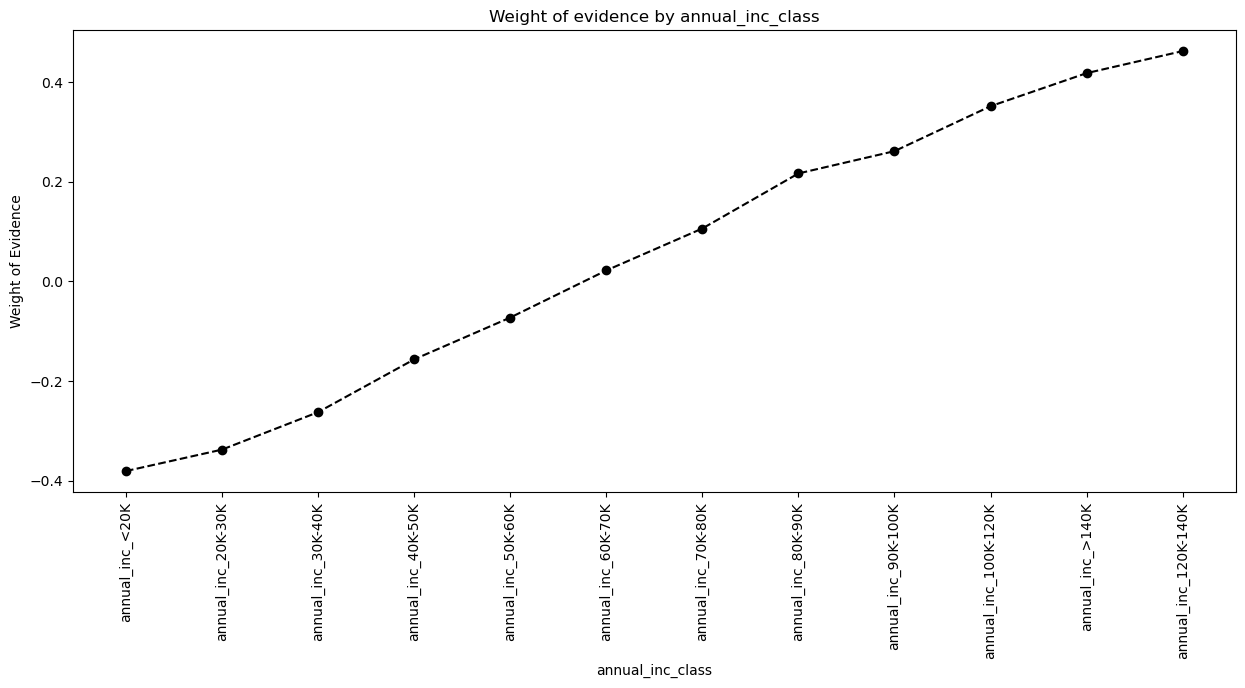

In [218]:
df_annual_inc = pd.DataFrame(columns = ['annual_inc'])
df_annual_inc['annual_inc'] = df_inputs_prep['annual_inc']

conditions = [
              (df_annual_inc['annual_inc'] <= 20000),
              (df_annual_inc['annual_inc'] > 20000) & (df_annual_inc['annual_inc'] <= 30000),
              (df_annual_inc['annual_inc'] > 30000) & (df_annual_inc['annual_inc'] <= 40000),
              (df_annual_inc['annual_inc'] > 40000) & (df_annual_inc['annual_inc'] <= 50000),
              (df_annual_inc['annual_inc'] > 50000) & (df_annual_inc['annual_inc'] <= 60000),
              (df_annual_inc['annual_inc'] > 60000) & (df_annual_inc['annual_inc'] <= 70000),
              (df_annual_inc['annual_inc'] > 70000) & (df_annual_inc['annual_inc'] <= 80000),
              (df_annual_inc['annual_inc'] > 80000) & (df_annual_inc['annual_inc'] <= 90000),
              (df_annual_inc['annual_inc'] > 90000) & (df_annual_inc['annual_inc'] <= 100000),
              (df_annual_inc['annual_inc'] > 100000) & (df_annual_inc['annual_inc'] <= 120000),
              (df_annual_inc['annual_inc'] > 120000) & (df_annual_inc['annual_inc'] <= 140000),
              (df_annual_inc['annual_inc'] > 140000)
             ]

# create a list of the values we want to assign for each condition
values = ['annual_inc_<20K', 'annual_inc_20K-30K', 'annual_inc_30K-40K', 'annual_inc_40K-50K', 'annual_inc_50K-60K',
          'annual_inc_60K-70K', 'annual_inc_70K-80K', 'annual_inc_80K-90K', 'annual_inc_90K-100K', 'annual_inc_100K-120K', 
          'annual_inc_120K-140K', 'annual_inc_>140K']

# create a new column and use np.select to assign values to it using our lists as arguments
df_annual_inc['annual_inc_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_annual_inc['annual_inc_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_annual_inc['annual_inc_class']], axis =1)
df_inputs_prep = df_inputs_prep.drop('annual_inc_factor', axis=1)

woe_feature = woe_discrete(df_inputs_prep, 'annual_inc_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.10 Feature: Months Since Last Delinq__

***Feature Name:** annual_inc <br>**Definition:** The number of months since the borrower's last delinquency.*

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_delinq_factor  n_obs  n_bad  n_good  prop_bad  prop_good  \
0                 (-0.188, 3.76]   5277    678    4599   0.03648    0.02981   
1                   (3.76, 7.52]  11167   1255    9912   0.06753    0.06426   
2                  (7.52, 11.28]  13306   1426   11880   0.07673    0.07701   
3                 (11.28, 15.04]  13216   1469   11747   0.07904    0.07615   
4                  (15.04, 18.8]   9337    981    8356   0.05278    0.05417   
5                  (18.8, 22.56]  11641   1249   10392    0.0672    0.06737   
6                 (22.56, 26.32]  10887   1129    9758   0.06075    0.06326   
7                 (26.32, 30.08]  10560   1108    9452   0.05962    0.06127   
8                 (30.08, 33.84]   7576    741    6835   0.03987    0.04431   
9                  (33.84, 37.6]   9795   1005    8790   0.05408    0.05698   
10                 (37.6, 41.36]   9352   1012    8340   0.05445    0.05407   
11                (41.36, 45.12]   9202    951    8251   0.05117    0.05349   
12                (45.12, 48.88]   6538    668    5870   0.03594    0.03805   
13                (48.88, 52.64]   6486    722    5764   0.03885    0.03737   
14                 (52.64, 56.4]   6045    649    5396   0.03492    0.03498   
15                 (56.4, 60.16]   5867    572    5295   0.03078    0.03433   
16                (60.16, 63.92]   4040    455    3585   0.02448    0.02324   
17                (63.92, 67.68]   5314    573    4741   0.03083    0.03073   
18                (67.68, 71.44]   5141    569    4572   0.03062    0.02964   
19                 (71.44, 75.2]   4950    563    4387   0.03029    0.02844   
20                 (75.2, 78.96]   3312    358    2954   0.01926    0.01915   
21                (78.96, 82.72]   3577    411    3166   0.02211    0.02052   
22                (82.72, 86.48]     94     20      74   0.00108    0.00048   
23                (86.48, 90.24]     38      4      34   0.00022    0.00022   
24                 (90.24, 94.0]     32      2      30   0.00011    0.00019   
25                 (94.0, 97.76]     20      5      15   0.00027     0.0001   
26               (97.76, 101.52]     13      1      12     5e-05      8e-05   
27              (101.52, 105.28]     11      1      10     5e-05      6e-05   
28              (105.28, 109.04]      8      2       6   0.00011      4e-05   
29               (109.04, 112.8]      2      1       1     5e-05      1e-05   
30               (112.8, 116.56]      7      1       6     5e-05      4e-05   
31              (116.56, 120.32]      2      0       2       0.0      1e-05   
32              (120.32, 124.08]      1      0       1       0.0      1e-05   
33              (124.08, 127.84]      2      0       2       0.0      1e-05   
34               (127.84, 131.6]      5      0       5       0.0      3e-05   
35               (131.6, 135.36]      7      2       5   0.00011      3e-05   
36              (135.36, 139.12]      2      0       2       0.0      1e-05   
37              (139.12, 142.88]      3      0       3       0.0      2e-05   
38              (142.88, 146.64]      1      0       1       0.0      1e-05   
39               (146.64, 150.4]      3      1       2     5e-05      1e-05   
40               (150.4, 154.16]      2      1       1     5e-05      1e-05   
41              (154.16, 157.92]      1      0       1       0.0      1e-05   
42              (157.92, 161.68]      1      0       1       0.0      1e-05   
43              (161.68, 165.44]      0      0       0       0.0        0.0   
44               (165.44, 169.2]      0      0       0       0.0        0.0   
45               (169.2, 172.96]      0      0       0       0.0        0.0   
46              (172.96, 176.72]      0      0       0       0.0        0.0   
47              (176.72, 180.48]      1      0       1       0.0      1e-05   
48              (180.48, 184.24]      0      0       0       0.0        0.0   
49               (184.24, 188.0]      1      0       

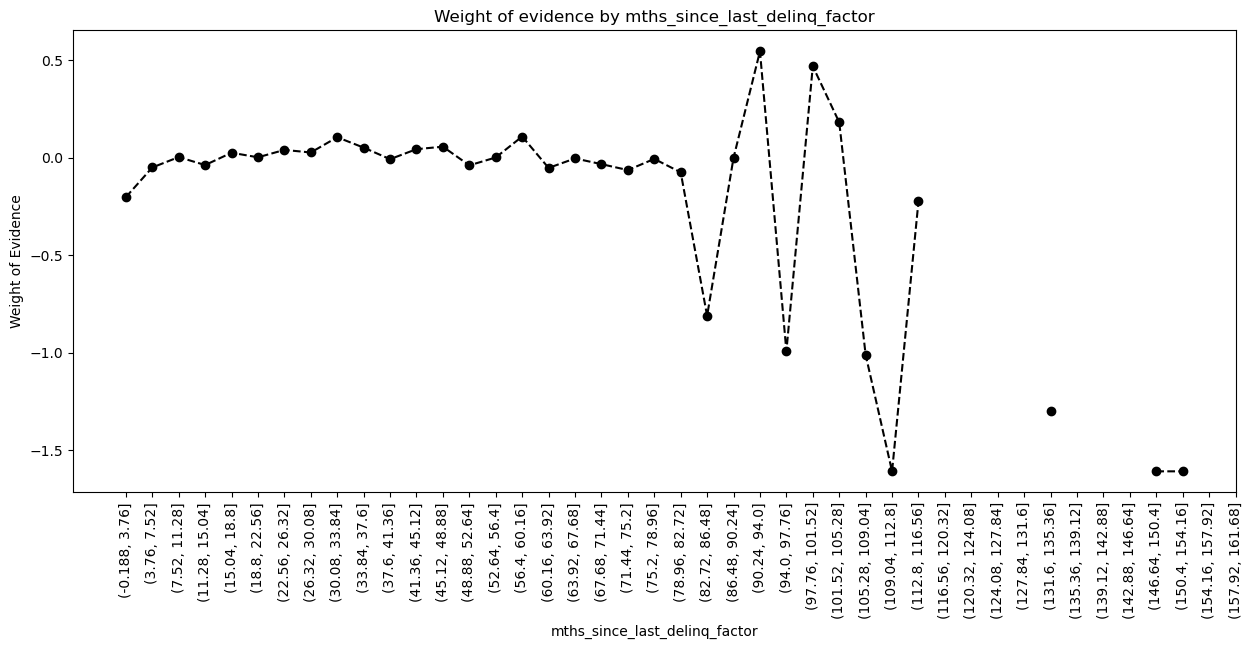

In [221]:
df_inputs_prep['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prep['mths_since_last_delinq'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'mths_since_last_delinq_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

After binning
['mths_since_last_delinq_Missing' 'mths_since_last_delinq_3-30'
 'mths_since_last_delinq_30-56' 'mths_since_last_delinq_>56'
 'mths_since_last_delinq_0-3']


mths_since_last_delinq_class   n_obs  n_bad  n_good  prop_bad  prop_good  \
0      mths_since_last_delinq_0-3    5277    678    4599   0.01663    0.01384   
1  mths_since_last_delinq_Missing  200185  22193  177992   0.54424    0.53572   
2      mths_since_last_delinq_>56   32458   3542   28916   0.08686    0.08703   
3     mths_since_last_delinq_3-30   80114   8617   71497   0.21131    0.21519   
4    mths_since_last_delinq_30-56   54994   5748   49246   0.14096    0.14822   

       woe  IV_class  IV_feature  
0 -0.18365   0.00051     0.00107  
1 -0.01578   0.00013     0.00107  
2  0.00196       0.0     0.00107  
3   0.0182     7e-05     0.00107  
4  0.05022   0.00036     0.00107

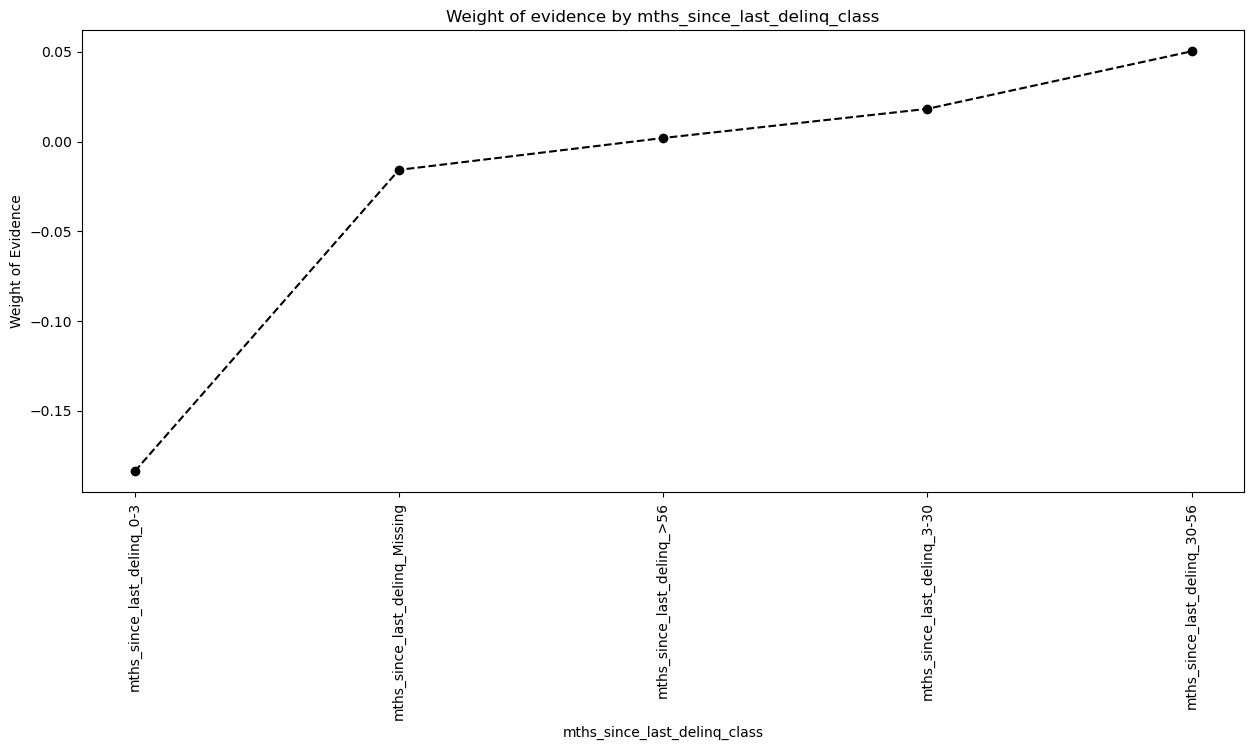

In [222]:
df_mths_since_last_delinq = pd.DataFrame(columns = ['mths_since_last_delinq'])
df_mths_since_last_delinq['mths_since_last_delinq'] = df_inputs_prep['mths_since_last_delinq']

conditions = [
              (df_mths_since_last_delinq['mths_since_last_delinq'].isnull()),
              (df_mths_since_last_delinq['mths_since_last_delinq'] >= 0) & (df_mths_since_last_delinq['mths_since_last_delinq'] <= 3),
              (df_mths_since_last_delinq['mths_since_last_delinq'] > 3) & (df_mths_since_last_delinq['mths_since_last_delinq'] <= 30),
              (df_mths_since_last_delinq['mths_since_last_delinq'] > 30) & (df_mths_since_last_delinq['mths_since_last_delinq'] <= 56),
              (df_mths_since_last_delinq['mths_since_last_delinq'] > 56)
             ]

# create a list of the values we want to assign for each condition
values = ['mths_since_last_delinq_Missing', 'mths_since_last_delinq_0-3', 'mths_since_last_delinq_3-30', 'mths_since_last_delinq_30-56',
          'mths_since_last_delinq_>56']

# create a new column and use np.select to assign values to it using our lists as arguments
df_mths_since_last_delinq['mths_since_last_delinq_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_mths_since_last_delinq['mths_since_last_delinq_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_mths_since_last_delinq['mths_since_last_delinq_class']], axis =1)
df_inputs_prep = df_inputs_prep.drop('mths_since_last_delinq_factor', axis=1)

woe_feature = woe_discrete(df_inputs_prep, 'mths_since_last_delinq_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.11 Feature: Debt to Income Ratio__

***Feature Name:** dti <br>**Definition:** xxx.*

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),


dti_factor  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0       (-0.04, 0.8]   1553    157    1396   0.00385     0.0042  0.08701   
1         (0.8, 1.6]   1965    203    1762   0.00498     0.0053  0.06228   
2       (1.6, 2.399]   2509    225    2284   0.00552    0.00687  0.21879   
3     (2.399, 3.199]   3234    291    2943   0.00714    0.00886  0.21583   
4     (3.199, 3.999]   4124    380    3744   0.00932    0.01127  0.18998   
5     (3.999, 4.799]   5037    417    4620   0.01023    0.01391  0.30728   
6     (4.799, 5.599]   5989    529    5460   0.01297    0.01643  0.23647   
7     (5.599, 6.398]   6781    577    6204   0.01415    0.01867   0.2772   
8     (6.398, 7.198]   7665    664    7001   0.01628    0.02107  0.25791   
9     (7.198, 7.998]   8747    739    8008   0.01812     0.0241   0.2852   
10    (7.998, 8.798]   9572    848    8724    0.0208    0.02626  0.23309   
11    (8.798, 9.598]  10320    954    9366   0.02339    0.02819  0.18666   
12   (9.598, 10.397]  11092   1017   10075   0.02494    0.03032  0.19533   
13  (10.397, 11.197]  11940   1162   10778    0.0285    0.03244  0.12949   
14  (11.197, 11.997]  12471   1155   11316   0.02832    0.03406  0.18456   
15  (11.997, 12.797]  13246   1300   11946   0.03188    0.03595  0.12015   
16  (12.797, 13.597]  13436   1322   12114   0.03242    0.03646  0.11744   
17  (13.597, 14.396]  13709   1384   12325   0.03394     0.0371  0.08902   
18  (14.396, 15.196]  14045   1378   12667   0.03379    0.03812  0.12057   
19  (15.196, 15.996]  13870   1420   12450   0.03482    0.03747  0.07335   
20  (15.996, 16.796]  13735   1455   12280   0.03568    0.03696  0.03525   
21  (16.796, 17.596]  13710   1545   12165   0.03789    0.03661 -0.03437   
22  (17.596, 18.395]  13606   1555   12051   0.03813    0.03627 -0.05001   
23  (18.395, 19.195]  13209   1513   11696    0.0371     0.0352 -0.05257   
24  (19.195, 19.995]  13183   1533   11650   0.03759    0.03506 -0.06968   
25  (19.995, 20.795]  12435   1474   10961   0.03615    0.03299 -0.09147   
26  (20.795, 21.595]  11902   1453   10449   0.03563    0.03145 -0.12479   
27  (21.595, 22.394]  11303   1405    9898   0.03445    0.02979 -0.14534   
28  (22.394, 23.194]  11013   1385    9628   0.03396    0.02898 -0.15858   
29  (23.194, 23.994]  10229   1269    8960   0.03112    0.02697 -0.14313   
30  (23.994, 24.794]   9922   1300    8622   0.03188    0.02595 -0.20581   
31  (24.794, 25.594]   8566   1060    7506   0.02599    0.02259  -0.1402   
32  (25.594, 26.393]   7777    960    6817   0.02354    0.02052  -0.1373   
33  (26.393, 27.193]   7251    950    6301    0.0233    0.01896 -0.20612   
34  (27.193, 27.993]   6627    890    5737   0.02183    0.01727 -0.23431   
35  (27.993, 28.793]   6361    839    5522   0.02057    0.01662 -0.21323   
36  (28.793, 29.593]   5785    756    5029   0.01854    0.01514 -0.20259   
37  (29.593, 30.392]   4705    633    4072   0.01552    0.01226 -0.23579   
38  (30.392, 31.192]   3852    526    3326    0.0129    0.01001 -0.25364   
39  (31.192, 31.992]   3510    455    3055   0.01116    0.00919 -0.19422   
40  (31.992, 32.792]   3041    424    2617    0.0104    0.00788 -0.27748   
41  (32.792, 33.592]   2811    367    2444     0.009    0.00736 -0.20116   
42  (33.592, 34.391]   2592    342    2250   0.00839    0.00677 -0.21454   
43  (34.391, 35.191]   1842    258    1584   0.00633    0.00477 -0.28295   
44  (35.191, 35.991]    530     53     477    0.0013    0.00144  0.10228   
45  (35.991, 36.791]    539     64     475   0.00157    0.00143  -0.0934   
46  (36.791, 37.591]    491     60     431   0.00147     0.0013  -0.1229   
47   (37.591, 38.39]    442     49     393    0.0012    0.00118 -0.01681   
48    (38.39, 39.19]    385     48     337   0.00118    0.00101 -0.15556   
49    (39.19, 39.99]    369     35     334   0.00086    0.00101  0.16077   

    IV_class  IV_feature  
0      3e-05      0.0267  
1      2e-05      0.0267  
2     0.0003      0.0267  
3    0.00037      0.0267 

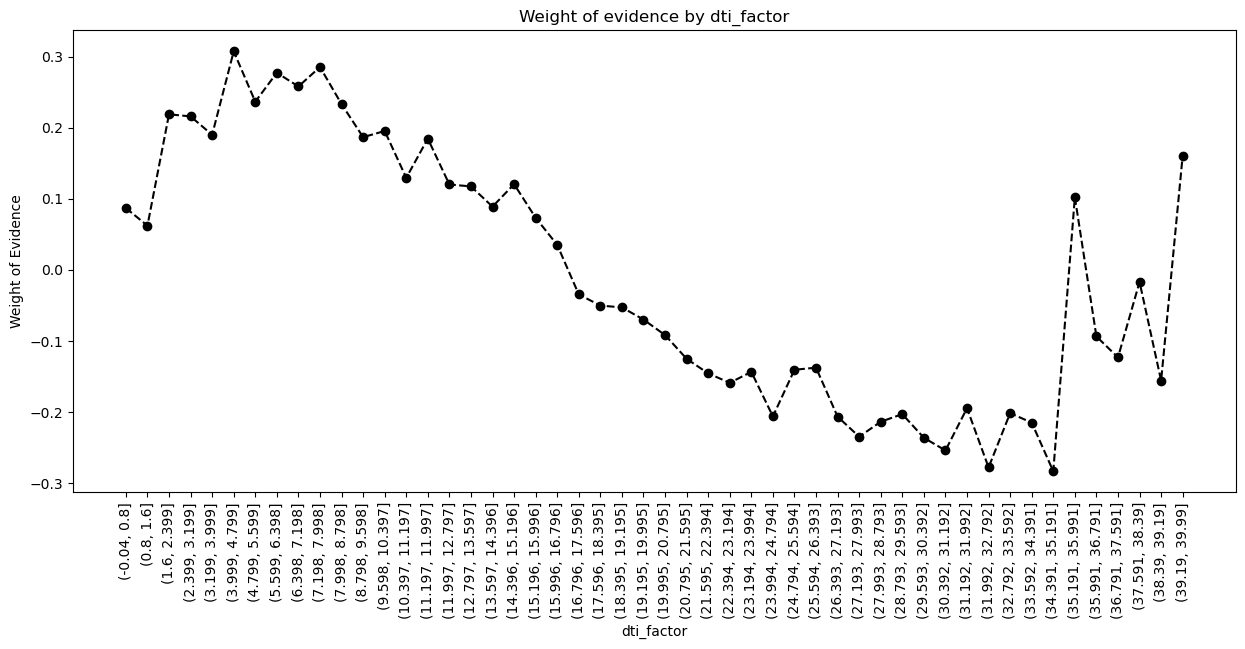

In [225]:
df_inputs_prep['dti_factor'] = pd.cut(df_inputs_prep['dti'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'dti_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

After binning
['dti_21.7_22.4' 'dti_3.5_7.7' 'dti_10.5_16.1' 'dti_22.4_35'
 'dti_16.1_20.3' 'dti_7.7_10.5' 'dti_<=1.4' 'dti_20.3_21.7' 'dti_>35'
 'dti_1.4_3.5']


dti_class  n_obs  n_bad  n_good  prop_bad  prop_good      woe  \
0    dti_22.4_35  95613  12388   83225   0.30379    0.25049 -0.19292   
1  dti_21.7_22.4   9797   1217    8580   0.02984    0.02582  -0.1447   
2  dti_20.3_21.7  21123   2530   18593   0.06204    0.05596 -0.10314   
3  dti_16.1_20.3  70444   8007   62437   0.19636    0.18792 -0.04393   
4        dti_>35   2882    323    2559   0.00792     0.0077 -0.02817   
5      dti_<=1.4   3030    322    2708    0.0079    0.00815  0.03116   
6  dti_10.5_16.1  92989   9175   83814     0.225    0.25226  0.11436   
7    dti_1.4_3.5   7715    702    7013   0.01722    0.02111  0.20368   
8   dti_7.7_10.5  35913   3241   32672   0.07948    0.09834  0.21293   
9    dti_3.5_7.7  33522   2873   30649   0.07045    0.09225   0.2696   

   IV_class  IV_feature  
0   0.01028     0.02569  
1   0.00058     0.02569  
2   0.00063     0.02569  
3   0.00037     0.02569  
4     1e-05     0.02569  
5     1e-05     0.02569  
6   0.00312     0.02569  
7   0.00079     0.02569  
8   0.00402     0.02569  
9   0.00588     0.02569

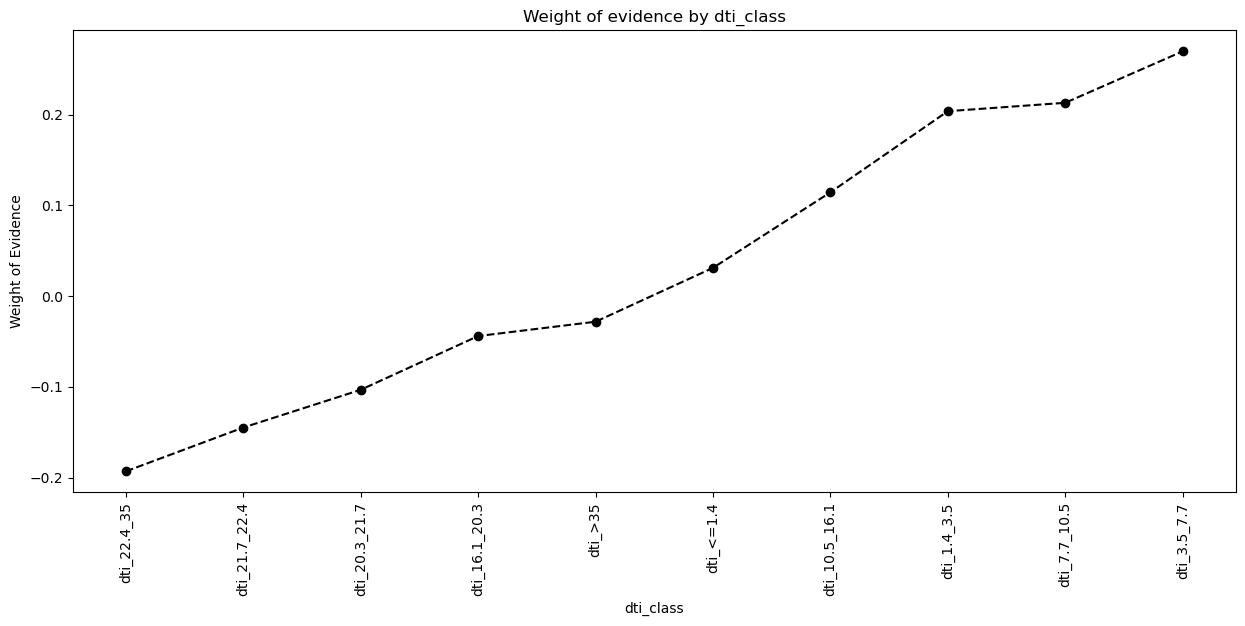

In [226]:
df_dti = pd.DataFrame(columns = ['dti'])
df_dti['dti'] = df_inputs_prep['dti']

conditions = [
              (df_dti['dti'] <= 1.4),
              (df_dti['dti'] > 1.4) & (df_dti['dti'] <= 3.5),
              (df_dti['dti'] > 3.5) & (df_dti['dti'] <= 7.7),
              (df_dti['dti'] > 7.7) & (df_dti['dti'] <= 10.5),
              (df_dti['dti'] > 10.5) & (df_dti['dti'] <= 16.1),
              (df_dti['dti'] > 16.1) & (df_dti['dti'] <= 20.3),
              (df_dti['dti'] > 20.3) & (df_dti['dti'] <= 21.7),
              (df_dti['dti'] > 21.7) & (df_dti['dti'] <= 22.4),
              (df_dti['dti'] > 22.4) & (df_dti['dti'] <= 35),
              (df_dti['dti'] > 35)
             ]

# create a list of the values we want to assign for each condition
values = ['dti_<=1.4', 'dti_1.4_3.5', 'dti_3.5_7.7', 'dti_7.7_10.5', 'dti_10.5_16.1', 'dti_16.1_20.3', 'dti_20.3_21.7', 'dti_21.7_22.4',
          'dti_22.4_35', 'dti_>35']

# create a new column and use np.select to assign values to it using our lists as arguments
df_dti['dti_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_dti['dti_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_dti['dti_class']], axis =1)
df_inputs_prep = df_inputs_prep.drop('dti_factor', axis=1)

woe_feature = woe_discrete(df_inputs_prep, 'dti_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

#### __2.3.12 Feature: Monthws Since Last Record__

***Feature Name:** mths_since_last_record <br>**Definition:** xxx.*

In [229]:
df_inputs_prep['mths_since_last_record'].unique()

array([ nan,  72.,  53., 105., 112.,  93.,  22.,  46.,  85.,  65.,  45.,
        96.,  64.,  34.,  89.,  42., 118.,  83.,  78.,  95., 108.,  62.,
       115.,   9.,  52.,  50., 113.,  76.,  20., 104., 111.,  29.,  66.,
        48.,  79.,  75.,  60.,  74.,  13.,  91.,   8., 117.,  82.,  15.,
        54.,  10.,  33.,  81., 103., 116., 109.,  63.,  68.,  28.,  94.,
       100.,  71.,  61.,  55.,   3.,  92.,  23., 106.,  16.,  67.,  58.,
       110.,   6.,   0.,  88.,  90., 102.,  31.,  69.,  36.,  49.,  99.,
        39.,  35.,  87.,  98.,  47., 107.,  14., 119., 114.,  51.,  86.,
        40.,  59.,  70.,  97.,  77., 101.,  38.,  56.,  73.,  57.,  80.,
        11.,  37.,  17.,  43.,  44.,  84.,  41.,  32.,  27.,  19.,  25.,
         7.,  18.,  26.,  24.,  30.,  12.,   5.,   4.,  21.,   1.,   2.,
       121., 120.])

/var/folders/k5/d2cms8mj3m3b09hjpq3tt_tc0000gn/T/ipykernel_44859/1724328788.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df_feature.groupby(df_feature.columns.values[0], as_index = False).agg(n_obs = (df_feature.columns.values[1], 'count'),


mths_since_last_record_factor  n_obs  n_bad  n_good  prop_bad  prop_good  \
0                 (-0.121, 2.42]   1086    256     830   0.04767    0.01857   
1                   (2.42, 4.84]     76      8      68   0.00149    0.00152   
2                   (4.84, 7.26]    163     14     149   0.00261    0.00333   
3                   (7.26, 9.68]    156     15     141   0.00279    0.00315   
4                   (9.68, 12.1]    292     27     265   0.00503    0.00593   
5                  (12.1, 14.52]    207     17     190   0.00317    0.00425   
6                 (14.52, 16.94]    210     15     195   0.00279    0.00436   
7                 (16.94, 19.36]    334     31     303   0.00577    0.00678   
8                 (19.36, 21.78]    283     18     265   0.00335    0.00593   
9                  (21.78, 24.2]    455     46     409   0.00857    0.00915   
10                 (24.2, 26.62]    339     32     307   0.00596    0.00687   
11                (26.62, 29.04]    612     61     551   0.01136    0.01233   
12                (29.04, 31.46]    451     42     409   0.00782    0.00915   
13                (31.46, 33.88]    487     38     449   0.00708    0.01005   
14                 (33.88, 36.3]    780     62     718   0.01155    0.01606   
15                 (36.3, 38.72]    659     42     617   0.00782     0.0138   
16                (38.72, 41.14]   1008     78     930   0.01453    0.02081   
17                (41.14, 43.56]    812     56     756   0.01043    0.01691   
18                (43.56, 45.98]    791     58     733    0.0108     0.0164   
19                 (45.98, 48.4]   1316     99    1217   0.01844    0.02723   
20                 (48.4, 50.82]    945     74     871   0.01378    0.01949   
21                (50.82, 53.24]   1536    140    1396   0.02607    0.03123   
22                (53.24, 55.66]   1062     93     969   0.01732    0.02168   
23                (55.66, 58.08]   1662    140    1522   0.02607    0.03405   
24                 (58.08, 60.5]   1095     94    1001    0.0175     0.0224   
25                 (60.5, 62.92]   1213    112    1101   0.02086    0.02463   
26                (62.92, 65.34]   1631    151    1480   0.02812    0.03311   
27                (65.34, 67.76]   1088     85    1003   0.01583    0.02244   
28                (67.76, 70.18]   1513    137    1376   0.02551    0.03079   
29                 (70.18, 72.6]   1041     97     944   0.01806    0.02112   
30                 (72.6, 75.02]   1420    142    1278   0.02644    0.02859   
31                (75.02, 77.44]    946     99     847   0.01844    0.01895   
32                (77.44, 79.86]    939     90     849   0.01676    0.01899   
33                (79.86, 82.28]   1351    152    1199   0.02831    0.02683   
34                 (82.28, 84.7]    724     83     641   0.01546    0.01434   
35                 (84.7, 87.12]   1350    191    1159   0.03557    0.02593   
36                (87.12, 89.54]    822    110     712   0.02048    0.01593   
37                (89.54, 91.96]    904    125     779   0.02328    0.01743   
38                (91.96, 94.38]   1492    197    1295   0.03669    0.02897   
39                 (94.38, 96.8]   1145    169     976   0.03147    0.02184   
40                 (96.8, 99.22]   1821    211    1610   0.03929    0.03602   
41               (99.22, 101.64]   1258    172    1086   0.03203     0.0243   
42              (101.64, 104.06]   2096    255    1841   0.04749    0.04119   
43              (104.06, 106.48]   1536    195    1341   0.03631       0.03   
44               (106.48, 108.9]   1559    180    1379   0.03352    0.03085   
45               (108.9, 111.32]   2296    266    2030   0.04953    0.04542   
46              (111.32, 113.74]   1461    165    1296   0.03073      0.029   
47              (113.74, 116.16]   2037    269    1768   0.05009    0.03956   
48              (116.16, 118.58]   1236    116    1120    0.0216    0.02506   
49               (118.58, 121.0]    371     45     32

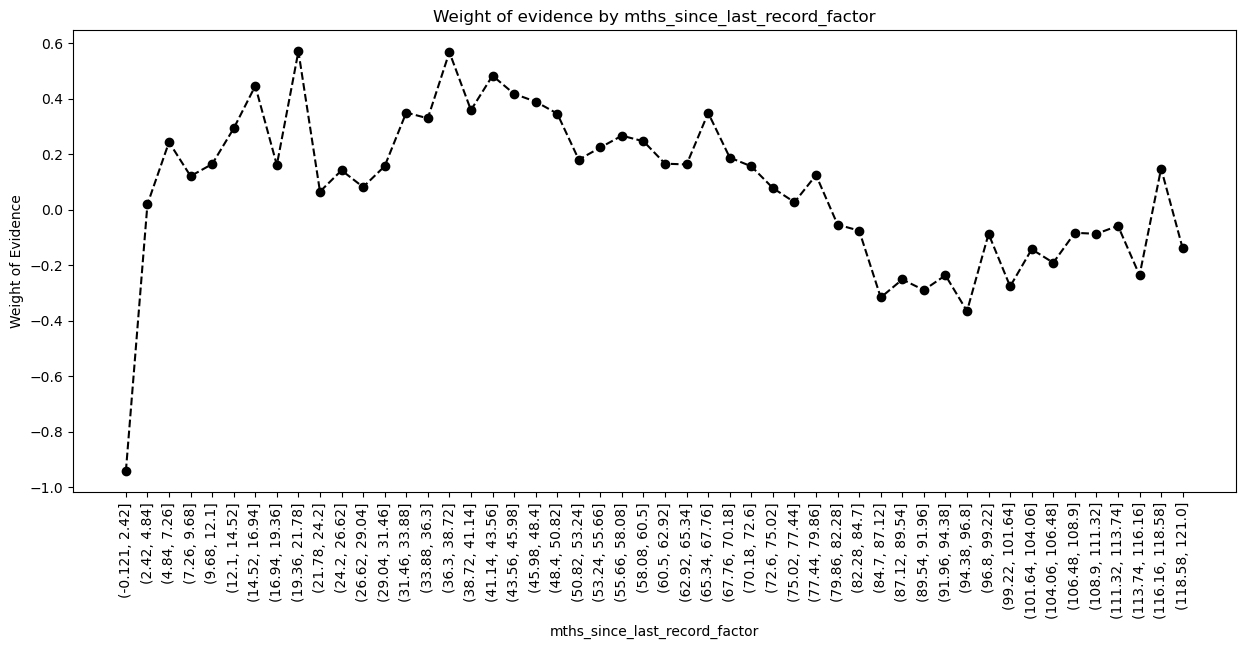

In [230]:
df_inputs_prep['mths_since_last_record_factor'] = pd.cut(df_inputs_prep['mths_since_last_record'], 50)
woe_feature = woe_continuous(df_inputs_prep, 'mths_since_last_record_factor', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

After binning
['mths_since_last_record:Missing' 'mths_since_last_record_31_80'
 'mths_since_last_record_>=86' 'mths_since_last_record_20_31'
 'mths_since_last_record_80_86' 'mths_since_last_record_2_20'
 'mths_since_last_record_0_2']


mths_since_last_record_class   n_obs  n_bad  n_good  prop_bad  prop_good  \
0      mths_since_last_record_0_2    1086    256     830   0.00628     0.0025   
1    mths_since_last_record_80_86    2506    313    2193   0.00768     0.0066   
2     mths_since_last_record_>=86   20493   2538   17955   0.06224    0.05404   
3  mths_since_last_record:Missing  322961  35408  287553   0.86831    0.86547   
4    mths_since_last_record_20_31    1999    191    1808   0.00468    0.00544   
5    mths_since_last_record_31_80   22404   1937   20467    0.0475     0.0616   
6     mths_since_last_record_2_20    1579    135    1444   0.00331    0.00435   

       woe  IV_class  IV_feature  
0 -0.92108   0.00348     0.00887  
1 -0.15155   0.00016     0.00887  
2 -0.14127   0.00116     0.00887  
3 -0.00328     1e-05     0.00887  
4  0.15048   0.00011     0.00887  
5  0.25993   0.00367     0.00887  
6  0.27323   0.00028     0.00887

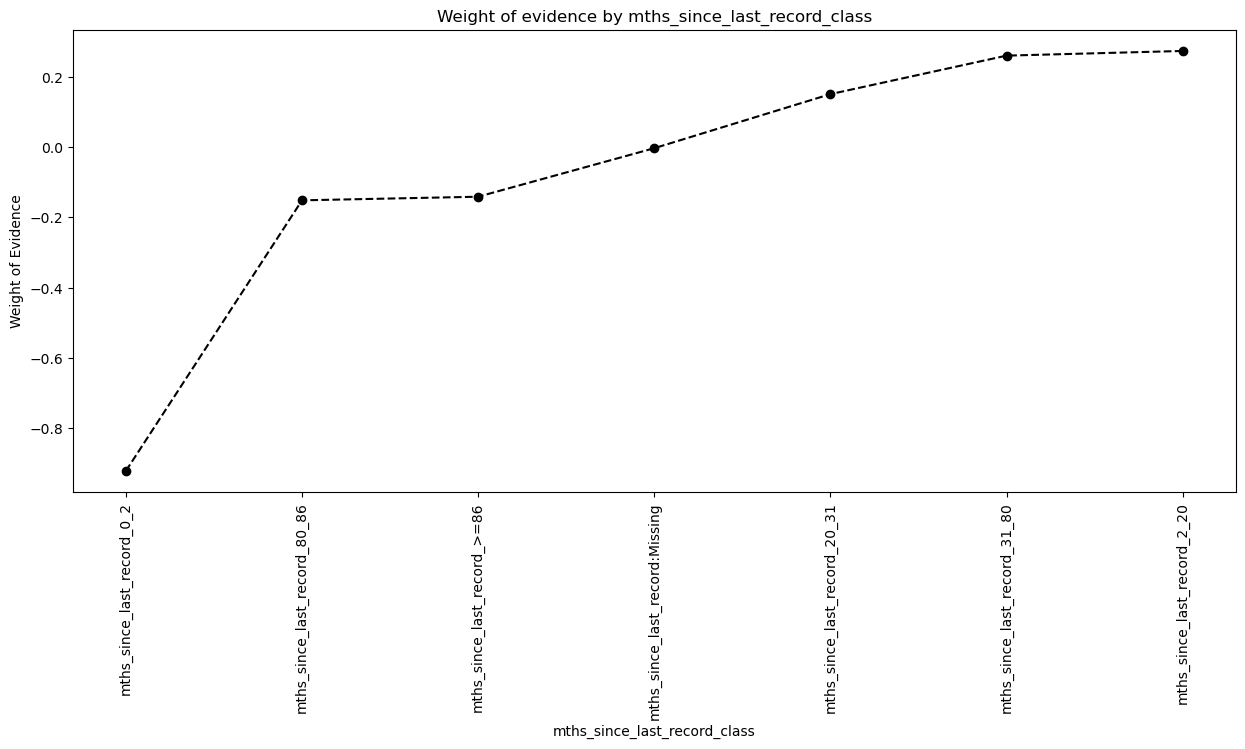

In [231]:
df_mths_since_last_record = pd.DataFrame(columns = ['mths_since_last_record'])
df_mths_since_last_record['mths_since_last_record'] = df_inputs_prep['mths_since_last_record']

conditions = [
              (df_mths_since_last_record['mths_since_last_record'].isnull()),
              (df_mths_since_last_record['mths_since_last_record'] >= 0) & (df_mths_since_last_record['mths_since_last_record'] <= 2),
              (df_mths_since_last_record['mths_since_last_record'] > 2) & (df_mths_since_last_record['mths_since_last_record'] <= 20),
              (df_mths_since_last_record['mths_since_last_record'] > 20) & (df_mths_since_last_record['mths_since_last_record'] <= 31),
              (df_mths_since_last_record['mths_since_last_record'] > 31) & (df_mths_since_last_record['mths_since_last_record'] <= 80),
              (df_mths_since_last_record['mths_since_last_record'] > 80) & (df_mths_since_last_record['mths_since_last_record'] <= 86),
              (df_mths_since_last_record['mths_since_last_record'] > 86)
             ]

# create a list of the values we want to assign for each condition
values = ['mths_since_last_record:Missing', 'mths_since_last_record_0_2', 'mths_since_last_record_2_20', 'mths_since_last_record_20_31',
          'mths_since_last_record_31_80', 'mths_since_last_record_80_86', 'mths_since_last_record_>=86']

# create a new column and use np.select to assign values to it using our lists as arguments
df_mths_since_last_record['mths_since_last_record_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_mths_since_last_record['mths_since_last_record_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_mths_since_last_record['mths_since_last_record_class']], axis =1)
df_inputs_prep = df_inputs_prep.drop('mths_since_last_record_factor', axis=1)

woe_feature = woe_discrete(df_inputs_prep, 'mths_since_last_record_class', df_targets_prep)
display(woe_feature)

plot_by_woe(woe_feature, rot_x_label = 90)

### __2.4 Create Dummy Variables (Training Data)__

In [262]:
df_inputs_prep_dummies = [pd.get_dummies(df_inputs_prep['grade'], prefix = 'grade', dtype = int),
                          pd.get_dummies(df_inputs_prep['sub_grade'], prefix = 'sub_grade', dtype = int),
                          pd.get_dummies(df_inputs_prep['home_ownership_new'], prefix = 'home_ownership_new', dtype = int),
                          pd.get_dummies(df_inputs_prep['verification_status'], prefix = 'verification_status', dtype = int),
                          pd.get_dummies(df_inputs_prep['purpose_new'], prefix = 'purpose_new', dtype = int),
                          pd.get_dummies(df_inputs_prep['addr_state_new'], prefix = 'addr_state_new', dtype = int),
                          pd.get_dummies(df_inputs_prep['initial_list_status'], prefix = 'initial_list_status', dtype = int),
                          pd.get_dummies(df_inputs_prep['term_class'], prefix = 'term_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['emp_length_class'], prefix = 'emp_length_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['mths_issue_class'], prefix = 'mths_issue_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['int_rate_class'], prefix = 'int_rate_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['mths_earliest_cr_line_class'], 
                                         prefix = 'mths_earliest_cr_line_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['delinq_2yrs_class'], prefix = 'delinq_2yrs_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['inq_last_6mths_class'], prefix = 'inq_last_6mths_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['open_acc_class'], prefix = 'open_acc_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['pub_rec_class'], prefix = 'pub_rec_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['total_acc_class'], prefix = 'total_acc_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['acc_now_delinq_class'], prefix = 'acc_now_delinq_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['total_rev_hi_lim_class'], prefix = 'total_rev_hi_lim_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['annual_inc_class'], prefix = 'annual_inc_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['mths_since_last_delinq_class'], 
                                         prefix = 'mths_since_last_delinq_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['dti_class'], prefix = 'dti_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['mths_since_last_record_class'], 
                                         prefix = 'mths_since_last_record_class', dtype = int)
                         ]
                        
df_inputs_prep_dummies = pd.concat(df_inputs_prep_dummies, axis = 1)
df_inputs_prep = pd.concat([df_inputs_prep, df_inputs_prep_dummies], axis = 1)
df_inputs_prep.columns.values



array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_del

In [264]:
print(loan_data_input_train.shape)
print(loan_data_target_train.shape)

(373028, 79)
(373028,)


In [265]:
loan_data_input_train = df_inputs_prep
loan_data_target_train = df_targets_prep

In [266]:
print(loan_data_input_train.shape)
print(loan_data_target_train.shape)

(373028, 259)
(373028,)


In [267]:
loan_data_input_train.to_csv('loan_data_input_train.csv')
loan_data_target_train.to_csv('loan_data_target_train.csv')

### __2.4 Test Data__

In [269]:
df_inputs_prep = loan_data_input_test
df_targets_prep = loan_data_target_test

In [270]:
df_inputs_prep.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_del

#### __2.4.1 Feature: Address State__

In [272]:
df_addr = pd.concat([df_inputs_prep['addr_state'], df_targets_prep], axis =1)
df_addr['addr_state_new'] = df_addr['addr_state']

df_addr = df_addr.replace({'addr_state_new': {'ND': 'ND_NE_IA_NV_FL_HI_AL',
                                          'NE': 'ND_NE_IA_NV_FL_HI_AL',
                                          'IA': 'ND_NE_IA_NV_FL_HI_AL',
                                          'NV': 'ND_NE_IA_NV_FL_HI_AL',
                                          'FL': 'ND_NE_IA_NV_FL_HI_AL',
                                          'HI': 'ND_NE_IA_NV_FL_HI_AL',
                                          'AL': 'ND_NE_IA_NV_FL_HI_AL'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'NM': 'NM_VA',
                                          'VA': 'NM_VA'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'OK': 'OK_TN_MO_LA_MD_NC',
                                          'TN': 'OK_TN_MO_LA_MD_NC',
                                          'MO': 'OK_TN_MO_LA_MD_NC',
                                          'LA': 'OK_TN_MO_LA_MD_NC',
                                          'MD': 'OK_TN_MO_LA_MD_NC',
                                          'NC': 'OK_TN_MO_LA_MD_NC'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'UT': 'UT_KY_AZ_NJ',
                                          'KY': 'UT_KY_AZ_NJ',
                                          'AZ': 'UT_KY_AZ_NJ',
                                          'NJ': 'UT_KY_AZ_NJ'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'AR': 'AR_MI_PA_OH_MN',
                                          'MI': 'AR_MI_PA_OH_MN',
                                          'PA': 'AR_MI_PA_OH_MN',
                                          'OH': 'AR_MI_PA_OH_MN',
                                          'MN': 'AR_MI_PA_OH_MN'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'RI': 'RI_MA_DE_SD_IN',
                                          'MA': 'RI_MA_DE_SD_IN',
                                          'DE': 'RI_MA_DE_SD_IN',
                                          'SD': 'RI_MA_DE_SD_IN',
                                          'IN': 'RI_MA_DE_SD_IN'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'GA': 'GA_WA_OR',
                                          'WA': 'GA_WA_OR',
                                          'OR': 'GA_WA_OR'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'WI': 'WI_MT',
                                          'MT': 'WI_MT'
                                          }})

df_addr = df_addr.replace({'addr_state_new': {'IL': 'IL_CT',
                                          'CT': 'IL_CT'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'KS': 'KS_SC_CO_VT_AK_MS',
                                          'SC': 'KS_SC_CO_VT_AK_MS',
                                          'CO': 'KS_SC_CO_VT_AK_MS',
                                          'VT': 'KS_SC_CO_VT_AK_MS',
                                          'AK': 'KS_SC_CO_VT_AK_MS',
                                          'MS': 'KS_SC_CO_VT_AK_MS'
                                         }})

df_addr = df_addr.replace({'addr_state_new': {'WV': 'WV_NH_WY_DC_ME_ID',
                                          'NH': 'WV_NH_WY_DC_ME_ID',
                                          'WY': 'WV_NH_WY_DC_ME_ID',
                                          'DC': 'WV_NH_WY_DC_ME_ID',
                                          'ME': 'WV_NH_WY_DC_ME_ID',
                                          'ID': 'WV_NH_WY_DC_ME_ID'
                                         }})

print(df_addr['addr_state'].unique())
print('\nAfter binning')
print(df_addr['addr_state_new'].unique()) 

['CA' 'IN' 'AZ' 'MI' 'PA' 'MO' 'CT' 'IL' 'SC' 'VA' 'NY' 'FL' 'TX' 'NC'
 'NM' 'NJ' 'KY' 'DE' 'OK' 'CO' 'OH' 'GA' 'LA' 'WA' 'AL' 'TN' 'MD' 'NV'
 'MN' 'RI' 'NH' 'MA' 'MS' 'UT' 'WV' 'HI' 'KS' 'OR' 'WY' 'WI' 'AK' 'DC'
 'AR' 'MT' 'SD' 'VT' 'IA' 'ID' 'ME' 'NE']

After binning
['CA' 'RI_MA_DE_SD_IN' 'UT_KY_AZ_NJ' 'AR_MI_PA_OH_MN' 'OK_TN_MO_LA_MD_NC'
 'IL_CT' 'KS_SC_CO_VT_AK_MS' 'NM_VA' 'NY' 'ND_NE_IA_NV_FL_HI_AL' 'TX'
 'GA_WA_OR' 'WV_NH_WY_DC_ME_ID' 'WI_MT']


In [273]:
df_inputs_prep = pd.concat([df_inputs_prep, df_addr['addr_state_new']], axis =1)

#### __2.4.2 Feature: Home Ownership__

In [275]:
df_home_ownership = pd.concat([df_inputs_prep['home_ownership'], df_targets_prep], axis =1)
df_home_ownership['home_ownership_new'] = df_home_ownership['home_ownership']

df_home_ownership = df_home_ownership.replace({'home_ownership_new': {'OTHER': 'OTHER_NONE_RENT_ANY',
                                                                      'NONE': 'OTHER_NONE_RENT_ANY',
                                                                      'RENT': 'OTHER_NONE_RENT_ANY',
                                                                      'ANY': 'OTHER_NONE_RENT_ANY'
                                                                     }})

print(df_home_ownership['home_ownership'].unique())
print('\nAfter binning')
print(df_home_ownership['home_ownership_new'].unique()) 

['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']

After binning
['MORTGAGE' 'OTHER_NONE_RENT_ANY' 'OWN']


In [276]:
df_inputs_prep = pd.concat([df_inputs_prep, df_home_ownership['home_ownership_new']], axis =1)

#### __2.4.3 Feature: Purpose__

In [278]:
df_purpose = pd.concat([df_inputs_prep['purpose'], df_targets_prep], axis =1)
df_purpose['purpose_new'] = df_purpose['purpose']

df_purpose = df_purpose.replace({'purpose_new': {'small_business': 'sme_edu_mov_hse_oth',
                                                 'educational': 'sme_edu_mov_hse_oth',
                                                 'moving': 'sme_edu_mov_hse_oth',
                                                 'house': 'sme_edu_mov_hse_oth',
                                                 'other': 'sme_edu_mov_hse_oth',
                                                 'renewable_energy': 'ren_med_wed_vac',
                                                 'medical': 'ren_med_wed_vac',
                                                 'wedding': 'ren_med_wed_vac',
                                                 'vacation': 'ren_med_wed_vac',
                                                 'home_improvement': 'improv_maj_car',
                                                 'major_purchase': 'improv_maj_car',
                                                 'car': 'improv_maj_car'
                                                }})

print(df_purpose['purpose'].unique())
print('\nAfter binning')
print(df_purpose['purpose_new'].unique()) 

['home_improvement' 'credit_card' 'debt_consolidation' 'vacation' 'house'
 'medical' 'small_business' 'car' 'other' 'major_purchase' 'wedding'
 'moving' 'educational' 'renewable_energy']

After binning
['improv_maj_car' 'credit_card' 'debt_consolidation' 'ren_med_wed_vac'
 'sme_edu_mov_hse_oth']


In [279]:
df_inputs_prep = pd.concat([df_inputs_prep, df_purpose['purpose_new']], axis =1)

In [280]:
df_term = pd.DataFrame(columns = ['term_int'])
df_term['term_int'] = df_inputs_prep['term_int']

conditions = [
              (df_term['term_int'] == 36),
              (df_term['term_int'] == 60)
             ]

# create a list of the values we want to assign for each condition
values = ['term_36', 'term_60']

# create a new column and use np.select to assign values to it using our lists as arguments
df_term['term_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_term['term_class'].unique())

df_inputs_prep = pd.concat([df_inputs_prep, df_term['term_class']], axis =1)

After binning
['term_60' 'term_36']


In [281]:
df_emp_length = pd.DataFrame(columns = ['emp_length_int'])
df_emp_length['emp_length_int'] = df_inputs_prep['emp_length_int']

conditions = [
              (df_emp_length['emp_length_int'] == 0),
              (df_emp_length['emp_length_int'] == 1),
              (df_emp_length['emp_length_int'] > 1) & (df_emp_length['emp_length_int'] <= 4),
              (df_emp_length['emp_length_int'] > 4) & (df_emp_length['emp_length_int'] <= 6),
              (df_emp_length['emp_length_int'] > 6) & (df_emp_length['emp_length_int'] <= 9),
              (df_emp_length['emp_length_int'] > 9)
             ]

# create a list of the values we want to assign for each condition
values = ['emp_length_0', 'emp_length_1', 'emp_length_2_4', 'emp_length_5_6', 'emp_length_7_9', 'emp_length_10']

# create a new column and use np.select to assign values to it using our lists as arguments
df_emp_length['emp_length_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_emp_length['emp_length_class'].unique())

df_inputs_prep = pd.concat([df_inputs_prep, df_emp_length['emp_length_class']], axis =1)

After binning
['emp_length_0' 'emp_length_10' 'emp_length_1' 'emp_length_2_4'
 'emp_length_7_9' 'emp_length_5_6']


In [282]:
df_mths_issue_d = pd.DataFrame(columns = ['mths_issue_d'])
df_mths_issue_d['mths_issue_d'] = df_inputs_prep['mths_issue_d']

conditions = [
              (df_mths_issue_d['mths_issue_d'] <= 38),
              (df_mths_issue_d['mths_issue_d'] > 38) & (df_mths_issue_d['mths_issue_d'] <= 39),
              (df_mths_issue_d['mths_issue_d'] > 39) & (df_mths_issue_d['mths_issue_d'] <= 42),
              (df_mths_issue_d['mths_issue_d'] > 42) & (df_mths_issue_d['mths_issue_d'] <= 48),
              (df_mths_issue_d['mths_issue_d'] > 48) & (df_mths_issue_d['mths_issue_d'] <= 52),
              (df_mths_issue_d['mths_issue_d'] > 52) & (df_mths_issue_d['mths_issue_d'] <= 64),
              (df_mths_issue_d['mths_issue_d'] > 64) & (df_mths_issue_d['mths_issue_d'] <= 84),
              (df_mths_issue_d['mths_issue_d'] > 84)
             ]

# create a list of the values we want to assign for each condition
values = ['mths_issue_d_<=38', 'mthsissue_d_38_39', 'mths_issue_d_39_41', 'mths_issue_d_41_48',
          'mths_issue_d_48_52', 'mths_issue_d_52_64', 'mths_issue_d_64_84', 'mths_issue_d_>84']

# create a new column and use np.select to assign values to it using our lists as arguments
df_mths_issue_d['mths_issue_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_mths_issue_d['mths_issue_class'].unique()) 

df_inputs_prep = pd.concat([df_inputs_prep, df_mths_issue_d['mths_issue_class']], axis =1)

After binning
['mths_issue_d_39_41' 'mthsissue_d_38_39' 'mths_issue_d_64_84'
 'mths_issue_d_<=38' 'mths_issue_d_52_64' 'mths_issue_d_48_52'
 'mths_issue_d_>84' 'mths_issue_d_41_48']


In [283]:
df_int_rate = pd.DataFrame(columns = ['int_rate'])
df_int_rate['int_rate'] = df_inputs_prep['int_rate']

conditions = [
              (df_int_rate['int_rate'] <= 9.548),
              (df_int_rate['int_rate'] > 9.548) & (df_int_rate['int_rate'] <= 12.025),
              (df_int_rate['int_rate'] > 12.025) & (df_int_rate['int_rate'] <= 15.74),
              (df_int_rate['int_rate'] > 15.74) & (df_int_rate['int_rate'] <= 20.281),
              (df_int_rate['int_rate'] > 20.281)
             ]

# create a list of the values we want to assign for each condition
values = ['int_rate_<9.548', 'int_rate_9.548_12.025', 'int_rate_12.025_15.74', 'int_rate_15.74_20.281', 'int_rate_>20.281']

# create a new column and use np.select to assign values to it using our lists as arguments
df_int_rate['int_rate_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_int_rate['int_rate_class'].unique()) 

df_inputs_prep = pd.concat([df_inputs_prep, df_int_rate['int_rate_class']], axis =1)

After binning
['int_rate_12.025_15.74' 'int_rate_>20.281' 'int_rate_<9.548'
 'int_rate_15.74_20.281' 'int_rate_9.548_12.025']


#### __2.4.5 Feature: Earliest Credit Line__

In [285]:
df_mths_earliest_cr_line_ = pd.DataFrame(columns = ['mths_earliest_cr_line'])
df_mths_earliest_cr_line_['mths_earliest_cr_line'] = df_inputs_prep['mths_earliest_cr_line']

conditions = [
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 140),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 140) & (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 167),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 167) & (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 251),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 251) & (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 275),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 275) & (df_mths_earliest_cr_line_['mths_earliest_cr_line'] <= 370),
              (df_mths_earliest_cr_line_['mths_earliest_cr_line'] > 370)
             ]

# create a list of the values we want to assign for each condition
values = ['mths_earliest_cr_line_<140', 'mths_earliest_cr_line_140-167', 'mths_earliest_cr_line_167-251', 'mths_earliest_cr_line_251-275',
          'mths_earliest_cr_line_275-370', 'mths_earliest_cr_line_>370']

# create a new column and use np.select to assign values to it using our lists as arguments
df_mths_earliest_cr_line_['mths_earliest_cr_line_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_mths_earliest_cr_line_['mths_earliest_cr_line_class'].unique()) 

df_inputs_prep = pd.concat([df_inputs_prep, df_mths_earliest_cr_line_['mths_earliest_cr_line_class']], axis =1)

After binning
['mths_earliest_cr_line_167-251' 'mths_earliest_cr_line_<140'
 'mths_earliest_cr_line_>370' 'mths_earliest_cr_line_275-370'
 'mths_earliest_cr_line_251-275' 'mths_earliest_cr_line_140-167']


#### __2.4.5 Feature: Delinquency (2 years)__

In [287]:
df_delinq_2yrs = pd.DataFrame(columns = ['delinq_2yrs'])
df_delinq_2yrs['delinq_2yrs'] = df_inputs_prep['delinq_2yrs']

conditions = [
              (df_delinq_2yrs['delinq_2yrs'] == 0),
              (df_delinq_2yrs['delinq_2yrs'] > 0) & (df_delinq_2yrs['delinq_2yrs'] <= 3),
              (df_delinq_2yrs['delinq_2yrs'] > 3)
             ]

# create a list of the values we want to assign for each condition
values = ['delinq_2yrs_0', 'delinq_2yrs_1-3', 'delinq_2yrs_>=4']

# create a new column and use np.select to assign values to it using our lists as arguments
df_delinq_2yrs['delinq_2yrs_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_delinq_2yrs['delinq_2yrs_class'].unique()) 

df_inputs_prep = pd.concat([df_inputs_prep, df_delinq_2yrs['delinq_2yrs_class']], axis =1)

After binning
['delinq_2yrs_0' 'delinq_2yrs_1-3' 'delinq_2yrs_>=4']


#### __2.4.6 Feature: Inquiries (last 6 months)__

In [289]:
df_inq_last_6mths = pd.DataFrame(columns = ['inq_last_6mths'])
df_inq_last_6mths['inq_last_6mths'] = df_inputs_prep['inq_last_6mths']

conditions = [
              (df_inq_last_6mths['inq_last_6mths'] == 0),
              (df_inq_last_6mths['inq_last_6mths'] > 0) & (df_inq_last_6mths['inq_last_6mths'] <= 2),
              (df_inq_last_6mths['inq_last_6mths'] > 2) & (df_inq_last_6mths['inq_last_6mths'] <= 6),
              (df_inq_last_6mths['inq_last_6mths'] > 6)
             ]

# create a list of the values we want to assign for each condition
values = ['inq_last_6mths_0', 'inq_last_6mths_0_2', 'inq_last_6mths_3_6', 'inq_last_6mths_>6']

# create a new column and use np.select to assign values to it using our lists as arguments
df_inq_last_6mths['inq_last_6mths_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_inq_last_6mths['inq_last_6mths_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_inq_last_6mths['inq_last_6mths_class']], axis =1)

After binning
['inq_last_6mths_0' 'inq_last_6mths_0_2' 'inq_last_6mths_3_6'
 'inq_last_6mths_>6']


#### __2.4.7 Feature: Number of Open Accounts__

In [291]:
df_open_acc = pd.DataFrame(columns = ['open_acc'])
df_open_acc['open_acc'] = df_inputs_prep['open_acc']

conditions = [
              (df_open_acc['open_acc'] == 0),
              (df_open_acc['open_acc'] > 0) & (df_open_acc['open_acc'] <= 3),
              (df_open_acc['open_acc'] > 3) & (df_open_acc['open_acc'] <= 12),
              (df_open_acc['open_acc'] > 12) & (df_open_acc['open_acc'] <= 17),
              (df_open_acc['open_acc'] > 17) & (df_open_acc['open_acc'] <= 22),
              (df_open_acc['open_acc'] > 22) & (df_open_acc['open_acc'] <= 25),
              (df_open_acc['open_acc'] > 25) & (df_open_acc['open_acc'] <= 30),
              (df_open_acc['open_acc'] > 30)
             ]

# create a list of the values we want to assign for each condition
values = ['open_acc_0', 'open_acc_0_3', 'open_acc_3_12', 'open_acc_12_17', 'open_acc_17_22', 'open_acc_22_25', 'open_acc_25_30',
          'open_acc_>30']

# create a new column and use np.select to assign values to it using our lists as arguments
df_open_acc['open_acc_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_open_acc['open_acc_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_open_acc['open_acc_class']], axis =1)

After binning
['open_acc_3_12' 'open_acc_17_22' 'open_acc_0_3' 'open_acc_12_17'
 'open_acc_22_25' 'open_acc_>30' 'open_acc_25_30' 'open_acc_0']


#### __2.4.8 Feature: Public Record__

In [293]:
df_pub_rec = pd.DataFrame(columns = ['pub_rec'])
df_pub_rec['pub_rec'] = df_inputs_prep['pub_rec']

conditions = [
              (df_pub_rec['pub_rec'] >= 0) & (df_pub_rec['pub_rec'] <= 2),
              (df_pub_rec['pub_rec'] > 2) & (df_pub_rec['pub_rec'] <= 4),
              (df_pub_rec['pub_rec'] > 4)
             ]

# create a list of the values we want to assign for each condition
values = ['pub_rec_0_2', 'pub_rec_2_4', 'pub_rec_>4']

# create a new column and use np.select to assign values to it using our lists as arguments
df_pub_rec['pub_rec_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_pub_rec['pub_rec_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_pub_rec['pub_rec_class']], axis =1)

After binning
['pub_rec_0_2' 'pub_rec_2_4' 'pub_rec_>4']


#### __2.4.9 Feature: Total Number of Accounts__

In [295]:
df_total_acc = pd.DataFrame(columns = ['total_acc'])
df_total_acc['total_acc'] = df_inputs_prep['total_acc']

conditions = [
              (df_total_acc['total_acc'] <= 27),
              (df_total_acc['total_acc'] > 27) & (df_total_acc['total_acc'] <= 51),
              (df_total_acc['total_acc'] > 51)
             ]

# create a list of the values we want to assign for each condition
values = ['total_acc_<=27', 'total_acc_27_51', 'total_acc_>51']

# create a new column and use np.select to assign values to it using our lists as arguments
df_total_acc['total_acc_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_total_acc['total_acc_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_total_acc['total_acc_class']], axis =1)

After binning
['total_acc_<=27' 'total_acc_27_51' 'total_acc_>51']


#### __2.4.10 Feature: Delinquent Accounts__

In [297]:
df_acc_now_delinq = pd.DataFrame(columns = ['acc_now_delinq'])
df_acc_now_delinq['acc_now_delinq'] = df_inputs_prep['acc_now_delinq']

conditions = [
              (df_acc_now_delinq['acc_now_delinq'] ==0),
              (df_acc_now_delinq['acc_now_delinq'] >= 1)
             ]

# create a list of the values we want to assign for each condition
values = ['acc_now_delinq_0', 'acc_now_delinq_>1']

# create a new column and use np.select to assign values to it using our lists as arguments
df_acc_now_delinq['acc_now_delinq_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_acc_now_delinq['acc_now_delinq_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_acc_now_delinq['acc_now_delinq_class']], axis =1)

After binning
['acc_now_delinq_0' 'acc_now_delinq_>1']


#### __2.4.11 Feature: Revolving Limit__

In [299]:
df_total_rev_hi_lim = pd.DataFrame(columns = ['total_rev_hi_lim'])
df_total_rev_hi_lim['total_rev_hi_lim'] = df_inputs_prep['total_rev_hi_lim']

conditions = [
              (df_total_rev_hi_lim['total_rev_hi_lim'] <= 5000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 5000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 10000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 10000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 20000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 20000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 30000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 30000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 40000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 40000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 55000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 55000) & (df_total_rev_hi_lim['total_rev_hi_lim'] <= 95000),
              (df_total_rev_hi_lim['total_rev_hi_lim'] > 95000)
             ]

# create a list of the values we want to assign for each condition
values = ['total_rev_hi_lim_<=5K', 'total_rev_hi_lim_5K-10K', 'total_rev_hi_lim_10K-20K', 'total_rev_hi_lim_20K-30K',
          'total_rev_hi_lim_30K-40K', 'total_rev_hi_lim_40K-55K', 'total_rev_hi_lim_55K-95K', 'total_rev_hi_lim_>95K']

# create a new column and use np.select to assign values to it using our lists as arguments
df_total_rev_hi_lim['total_rev_hi_lim_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_total_rev_hi_lim['total_rev_hi_lim_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_total_rev_hi_lim['total_rev_hi_lim_class']], axis =1)

After binning
['total_rev_hi_lim_20K-30K' 'total_rev_hi_lim_10K-20K'
 'total_rev_hi_lim_5K-10K' 'total_rev_hi_lim_55K-95K'
 'total_rev_hi_lim_40K-55K' 'total_rev_hi_lim_<=5K'
 'total_rev_hi_lim_30K-40K' 'total_rev_hi_lim_>95K']


#### __2.4.13 Feature: Annual Income__

In [301]:
df_annual_inc = pd.DataFrame(columns = ['annual_inc'])
df_annual_inc['annual_inc'] = df_inputs_prep['annual_inc']

conditions = [
              (df_annual_inc['annual_inc'] <= 20000),
              (df_annual_inc['annual_inc'] > 20000) & (df_annual_inc['annual_inc'] <= 30000),
              (df_annual_inc['annual_inc'] > 30000) & (df_annual_inc['annual_inc'] <= 40000),
              (df_annual_inc['annual_inc'] > 40000) & (df_annual_inc['annual_inc'] <= 50000),
              (df_annual_inc['annual_inc'] > 50000) & (df_annual_inc['annual_inc'] <= 60000),
              (df_annual_inc['annual_inc'] > 60000) & (df_annual_inc['annual_inc'] <= 70000),
              (df_annual_inc['annual_inc'] > 70000) & (df_annual_inc['annual_inc'] <= 80000),
              (df_annual_inc['annual_inc'] > 80000) & (df_annual_inc['annual_inc'] <= 90000),
              (df_annual_inc['annual_inc'] > 90000) & (df_annual_inc['annual_inc'] <= 100000),
              (df_annual_inc['annual_inc'] > 100000) & (df_annual_inc['annual_inc'] <= 120000),
              (df_annual_inc['annual_inc'] > 120000) & (df_annual_inc['annual_inc'] <= 140000),
              (df_annual_inc['annual_inc'] > 140000)
             ]

# create a list of the values we want to assign for each condition
values = ['annual_inc_<20K', 'annual_inc_20K-30K', 'annual_inc_30K-40K', 'annual_inc_40K-50K', 'annual_inc_50K-60K',
          'annual_inc_60K-70K', 'annual_inc_70K-80K', 'annual_inc_80K-90K', 'annual_inc_90K-100K', 'annual_inc_100K-120K', 
          'annual_inc_120K-140K', 'annual_inc_>140K']

# create a new column and use np.select to assign values to it using our lists as arguments
df_annual_inc['annual_inc_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_annual_inc['annual_inc_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_annual_inc['annual_inc_class']], axis =1)

After binning
['annual_inc_60K-70K' 'annual_inc_50K-60K' 'annual_inc_>140K'
 'annual_inc_80K-90K' 'annual_inc_40K-50K' 'annual_inc_90K-100K'
 'annual_inc_100K-120K' 'annual_inc_70K-80K' 'annual_inc_30K-40K'
 'annual_inc_<20K' 'annual_inc_120K-140K' 'annual_inc_20K-30K']


#### __2.4.14 Feature: Months Since Last Delinq__

In [303]:
df_mths_since_last_delinq = pd.DataFrame(columns = ['mths_since_last_delinq'])
df_mths_since_last_delinq['mths_since_last_delinq'] = df_inputs_prep['mths_since_last_delinq']

conditions = [
              (df_mths_since_last_delinq['mths_since_last_delinq'].isnull()),
              (df_mths_since_last_delinq['mths_since_last_delinq'] >= 0) & (df_mths_since_last_delinq['mths_since_last_delinq'] <= 3),
              (df_mths_since_last_delinq['mths_since_last_delinq'] > 3) & (df_mths_since_last_delinq['mths_since_last_delinq'] <= 30),
              (df_mths_since_last_delinq['mths_since_last_delinq'] > 30) & (df_mths_since_last_delinq['mths_since_last_delinq'] <= 56),
              (df_mths_since_last_delinq['mths_since_last_delinq'] > 56)
             ]

# create a list of the values we want to assign for each condition
values = ['mths_since_last_delinq_Missing', 'mths_since_last_delinq_0-3', 'mths_since_last_delinq_3-30', 'mths_since_last_delinq_30-56',
          'mths_since_last_delinq_>56']

# create a new column and use np.select to assign values to it using our lists as arguments
df_mths_since_last_delinq['mths_since_last_delinq_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_mths_since_last_delinq['mths_since_last_delinq_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_mths_since_last_delinq['mths_since_last_delinq_class']], axis =1)

After binning
['mths_since_last_delinq_Missing' 'mths_since_last_delinq_0-3'
 'mths_since_last_delinq_30-56' 'mths_since_last_delinq_3-30'
 'mths_since_last_delinq_>56']


#### __2.4.15 Feature: Debt to Income Ratio__

In [305]:
df_dti = pd.DataFrame(columns = ['dti'])
df_dti['dti'] = df_inputs_prep['dti']

conditions = [
              (df_dti['dti'] <= 1.4),
              (df_dti['dti'] > 1.4) & (df_dti['dti'] <= 3.5),
              (df_dti['dti'] > 3.5) & (df_dti['dti'] <= 7.7),
              (df_dti['dti'] > 7.7) & (df_dti['dti'] <= 10.5),
              (df_dti['dti'] > 10.5) & (df_dti['dti'] <= 16.1),
              (df_dti['dti'] > 16.1) & (df_dti['dti'] <= 20.3),
              (df_dti['dti'] > 20.3) & (df_dti['dti'] <= 21.7),
              (df_dti['dti'] > 21.7) & (df_dti['dti'] <= 22.4),
              (df_dti['dti'] > 22.4) & (df_dti['dti'] <= 35),
              (df_dti['dti'] > 35)
             ]

# create a list of the values we want to assign for each condition
values = ['dti_<=1.4', 'dti_1.4_3.5', 'dti_3.5_7.7', 'dti_7.7_10.5', 'dti_10.5_16.1', 'dti_16.1_20.3', 'dti_20.3_21.7', 'dti_21.7_22.4',
          'dti_22.4_35', 'dti_>35']

# create a new column and use np.select to assign values to it using our lists as arguments
df_dti['dti_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_dti['dti_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_dti['dti_class']], axis =1)

After binning
['dti_7.7_10.5' 'dti_22.4_35' 'dti_10.5_16.1' 'dti_16.1_20.3'
 'dti_3.5_7.7' 'dti_21.7_22.4' 'dti_1.4_3.5' 'dti_20.3_21.7' 'dti_>35'
 'dti_<=1.4']


#### __2.4.16 Feature: Months Since Last Record__

In [307]:
df_mths_since_last_record = pd.DataFrame(columns = ['mths_since_last_record'])
df_mths_since_last_record['mths_since_last_record'] = df_inputs_prep['mths_since_last_record']

conditions = [
              (df_mths_since_last_record['mths_since_last_record'].isnull()),
              (df_mths_since_last_record['mths_since_last_record'] >= 0) & (df_mths_since_last_record['mths_since_last_record'] <= 2),
              (df_mths_since_last_record['mths_since_last_record'] > 2) & (df_mths_since_last_record['mths_since_last_record'] <= 20),
              (df_mths_since_last_record['mths_since_last_record'] > 20) & (df_mths_since_last_record['mths_since_last_record'] <= 31),
              (df_mths_since_last_record['mths_since_last_record'] > 31) & (df_mths_since_last_record['mths_since_last_record'] <= 80),
              (df_mths_since_last_record['mths_since_last_record'] > 80) & (df_mths_since_last_record['mths_since_last_record'] <= 86),
              (df_mths_since_last_record['mths_since_last_record'] > 86)
             ]

# create a list of the values we want to assign for each condition
values = ['mths_since_last_record:Missing', 'mths_since_last_record_0_2', 'mths_since_last_record_2_20', 'mths_since_last_record_20_31',
          'mths_since_last_record_31_80', 'mths_since_last_record_80_86', 'mths_since_last_record_>=86']

# create a new column and use np.select to assign values to it using our lists as arguments
df_mths_since_last_record['mths_since_last_record_class'] = np.select(conditions, values)

#display updated classes
print('After binning')
print(df_mths_since_last_record['mths_since_last_record_class'].unique())


df_inputs_prep = pd.concat([df_inputs_prep, df_mths_since_last_record['mths_since_last_record_class']], axis =1)

After binning
['mths_since_last_record:Missing' 'mths_since_last_record_>=86'
 'mths_since_last_record_0_2' 'mths_since_last_record_31_80'
 'mths_since_last_record_80_86' 'mths_since_last_record_2_20'
 'mths_since_last_record_20_31']


### __2.5 Create Dummy Variables (Test Data)__

In [315]:
df_inputs_prep_dummies = [pd.get_dummies(df_inputs_prep['grade'], prefix = 'grade', dtype = int),
                          pd.get_dummies(df_inputs_prep['sub_grade'], prefix = 'sub_grade', dtype = int),
                          pd.get_dummies(df_inputs_prep['home_ownership_new'], prefix = 'home_ownership_new', dtype = int),
                          pd.get_dummies(df_inputs_prep['verification_status'], prefix = 'verification_status', dtype = int),
                          pd.get_dummies(df_inputs_prep['purpose_new'], prefix = 'purpose_new', dtype = int),
                          pd.get_dummies(df_inputs_prep['addr_state_new'], prefix = 'addr_state_new', dtype = int),
                          pd.get_dummies(df_inputs_prep['initial_list_status'], prefix = 'initial_list_status', dtype = int),
                          pd.get_dummies(df_inputs_prep['term_class'], prefix = 'term_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['emp_length_class'], prefix = 'emp_length_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['mths_issue_class'], prefix = 'mths_issue_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['int_rate_class'], prefix = 'int_rate_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['mths_earliest_cr_line_class'], 
                                         prefix = 'mths_earliest_cr_line_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['delinq_2yrs_class'], prefix = 'delinq_2yrs_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['inq_last_6mths_class'], prefix = 'inq_last_6mths_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['open_acc_class'], prefix = 'open_acc_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['pub_rec_class'], prefix = 'pub_rec_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['total_acc_class'], prefix = 'total_acc_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['acc_now_delinq_class'], prefix = 'acc_now_delinq_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['total_rev_hi_lim_class'], prefix = 'total_rev_hi_lim_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['annual_inc_class'], prefix = 'annual_inc_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['mths_since_last_delinq_class'], 
                                         prefix = 'mths_since_last_delinq_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['dti_class'], 
                                         prefix = 'dt_class', dtype = int),
                          pd.get_dummies(df_inputs_prep['mths_since_last_record_class'], 
                                         prefix = 'mths_since_last_record_class', dtype = int)
                         ]
                        
df_inputs_prep_dummies = pd.concat(df_inputs_prep_dummies, axis = 1)
df_inputs_prep = pd.concat([df_inputs_prep, df_inputs_prep_dummies], axis = 1)
df_inputs_prep.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_del

In [317]:
print(loan_data_input_test.shape)
print(loan_data_target_test.shape)

(93257, 79)
(93257,)


In [319]:
loan_data_input_test = df_inputs_prep
loan_data_target_test = df_targets_prep

In [321]:
print(loan_data_input_test.shape)
print(loan_data_target_test.shape)

(93257, 259)
(93257,)


In [323]:
loan_data_input_test.to_csv('loan_data_input_test.csv')
loan_data_target_test.to_csv('loan_data_target_test.csv')